In [1]:
#import python libraries

import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import machine learning and stats libraries:
from scipy import stats
from scipy.stats import norm,skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

import sklearn 
from sklearn.metrics import roc_curve,auc,accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score,precision_recall_curve

from sklearn.preprocessing import StandardScaler,power_transform

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.linear_model import Ridge,Lasso,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance


from skopt import BayesSearchCV

import warnings
warnings.filterwarnings('ignore')

#importing os
from os import getcwd

# EDA and Data Preparation


## Reading and understanding the data

In [2]:
#To read csv File from locally stored file
df_credit=pd.read_csv("C:\\Users\\AJAY\\Documents\\capstone 1\\creditcard.csv")
df_credit.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [3]:
# Examining the dataset imported
df_credit.shape

(284807, 31)

In [4]:
# Lets cheak the numeric distribution of the data
df_credit.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [5]:
#Examining the data frame for the shape, datatype, Null etc
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
#Check the fraud/Non_Fraud related records
df_credit['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
#find % Values of class
(df_credit.groupby('Class')['Class'].count()/df_credit['Class'].count())*100

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64

In [8]:
#Checking the Null Values
df_credit.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
#Observe the different feature typr present in thr data
#Lets check data type of the features
df_credit.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [10]:
#Finding the initial full correlation in the dataset:

#correlation Matrix

cor=df_credit.corr()
cor

Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  4.135835e-16 -1.227819e-15 -9.215150e-16   
V2     -0.010593  4.135835e-16  1.000000e+00  3.243764e-16 -1.121065e-15   
V3     -0.419618 -1.227819e-15  3.243764e-16  1.000000e+00  4.711293e-16   
V4     -0.105260 -9.215150e-16 -1.121065e-15  4.711293e-16  1.000000e+00   
V5      0.173072  1.812612e-17  5.157519e-16 -6.539009e-17 -1.719944e-15   
V6     -0.063016 -6.506567e-16  2.787346e-16  1.627627e-15 -7.491959e-16   
V7      0.084714 -1.005191e-15  2.055934e-16  4.895305e-16 -4.104503e-16   
V8     -0.036949 -2.433822e-16 -5.377041e-17 -1.268779e-15  5.697192e-16   
V9     -0.008660 -1.513678e-16  1.978488e-17  5.568367e-16  6.923247e-16   
V10     0.030617  7.388135e-17 -3.991394e-16  1.156587e-15  2.232685e-16   
V11    -0.247689  2.125498e-16  1.975426e-16  1.576830e-15  3.459380e-16   
V12     0.124348  2.053457e-16 -9.568710e-17  6.310231e-16 -5.625518e-16   
V13    -0.065902 -2.425603e-17  6.295388e-16  2.807652e-16  1.303306e-16   
V14    -0.098757 -5.020280e-16 -1.730566e-16  4.739859e-16  2.282280e-16   
V15    -0.183453  3.547782e-16 -4.995814e-17  9.068793e-16  1.377649e-16   
V16     0.011903  7.212815e-17  1.177316e-17  8.299445e-16 -9.614528e-16   
V17    -0.073297 -3.879840e-16 -2.685296e-16  7.614712e-16 -2.699612e-16   
V18     0.090438  3.230206e-17  3.284605e-16  1.509897e-16 -5.103644e-16   
V19     0.028975  1.502024e-16 -7.118719e-18  3.463522e-16 -3.980557e-16   
V20    -0.050866  4.654551e-16  2.506675e-16 -9.316409e-16 -1.857247e-16   
V21     0.044736 -2.457409e-16 -8.480447e-17  5.706192e-17 -1.949553e-16   
V22     0.144059 -4.290944e-16  1.526333e-16 -1.133902e-15 -6.276051e-17   
V23     0.051142  6.168652e-16  1.634231e-16 -4.983035e-16  9.164206e-17   
V24    -0.016182 -4.425156e-17  1.247925e-17  2.686834e-19  1.584638e-16   
V25    -0.233083 -9.605737e-16 -4.478846e-16 -1.104734e-15  6.070716e-16   
V26    -0.041407 -1.581290e-17  2.057310e-16 -1.238062e-16 -4.247268e-16   
V27    -0.005135  1.198124e-16 -4.966953e-16  1.045747e-15  3.977061e-17   
V28    -0.009413  2.083082e-15 -5.093836e-16  9.775546e-16 -2.761403e-18   
Amount -0.010596 -2.277087e-01 -5.314089e-01 -2.108805e-01  9.873167e-02   
Class  -0.012323 -1.013473e-01  9.128865e-02 -1.929608e-01  1.334475e-01   

                  V5            V6            V7            V8            V9  \
Time    1.730721e-01 -6.301647e-02  8.471437e-02 -3.694943e-02 -8.660434e-03   
V1      1.812612e-17 -6.506567e-16 -1.005191e-15 -2.433822e-16 -1.513678e-16   
V2      5.157519e-16  2.787346e-16  2.055934e-16 -5.377041e-17  1.978488e-17   
V3     -6.539009e-17  1.627627e-15  4.895305e-16 -1.268779e-15  5.568367e-16   
V4     -1.719944e-15 -7.491959e-16 -4.104503e-16  5.697192e-16  6.923247e-16   
V5      1.000000e+00  2.408382e-16  2.715541e-16  7.437229e-16  7.391702e-16   
V6      2.408382e-16  1.000000e+00  1.191668e-16 -1.104219e-16  4.131207e-16   
V7      2.715541e-16  1.191668e-16  1.000000e+00  3.344412e-16  1.122501e-15   
V8      7.437229e-16 -1.104219e-16  3.344412e-16  1.000000e+00  4.356078e-16   
V9      7.391702e-16  4.131207e-16  1.122501e-15  4.356078e-16  1.000000e+00   
V10    -5.202306e-16  5.932243e-17 -7.492834e-17 -2.801370e-16 -4.642274e-16   
V11     7.203963e-16  1.980503e-15  1.425248e-16  2.487043e-16  1.354680e-16   
V12     7.412552e-16  2.375468e-16 -3.536655e-18  1.839891e-16 -1.079314e-15   
V13     5.886991e-16 -1.211182e-16  1.266462e-17 -2.921856e-16  2.251072e-15   
V14     6.565143e-16  2.621312e-16  2.607772e-16 -8.599156e-16  3.784757e-15   
V15    -8.720275e-16 -1.531188e-15 -1.690540e-16  4.127777e-16 -1.051167e-15   
V16     2.246261e-15  2.623672e-18  5.869302e-17 -5.254741e-16 -1.214086e-15   
V17     1.281914e-16  2.015618e-16  2.177192e-16 -2.269549e-16  1.113695e-15   
V18     5.308590e-16  1.223814e-16  7.604126e-17 -3.667974e

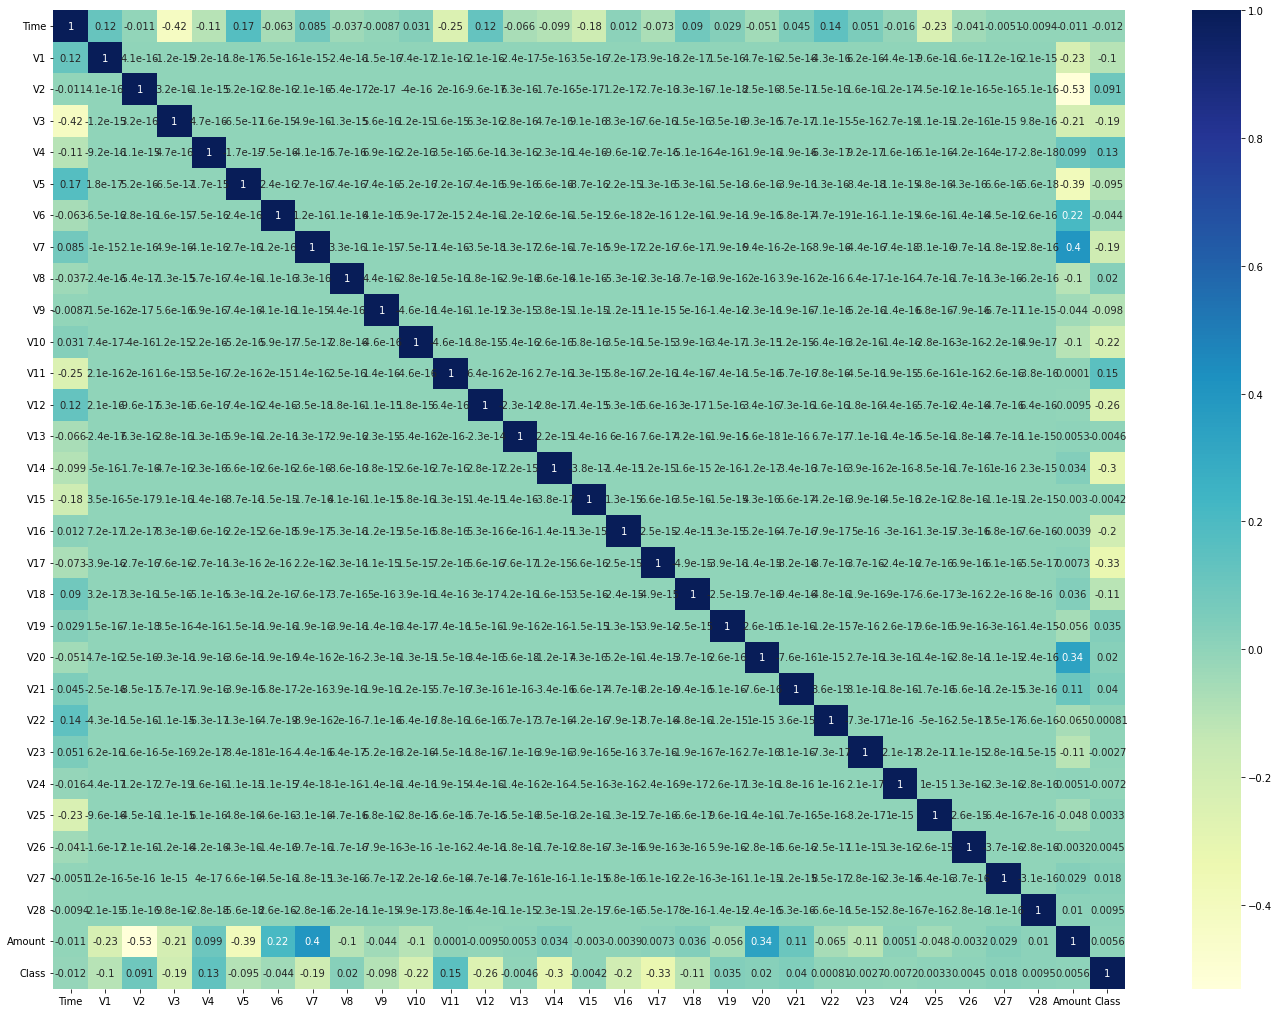

In [11]:
#Plotting correlation on a Heatmap

#Figure Size
plt.figure(figsize=(24,18))

#Heatmap
sns.heatmap(df_credit.corr(),annot=True,cmap="YlGnBu")
plt.show()

****Here we will observe the distribution of our classes****

In [12]:
classes=df_credit['Class'].value_counts()
normal_share=classes[0]/df_credit['Class'].count()*100
fraud_share=classes[1]/df_credit['Class'].count()*100

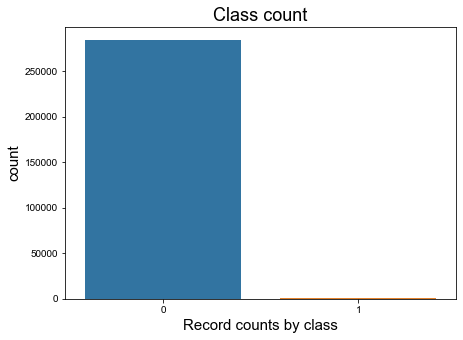

In [13]:
# Create a bar plot for the number and percentage of fradulent vs non-fraudulent transaction

plt.figure(figsize=(7,5))
sns.countplot(df_credit['Class'])
sns.set_style(style="darkgrid")
plt.title('Class count',fontsize=18)
plt.xlabel("Record counts by class",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.show()

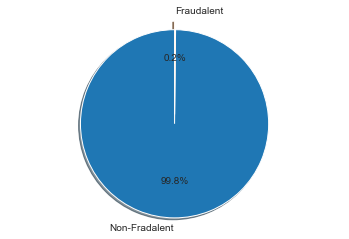

In [14]:
#plt.title('Distribution of the Fraudalent Vs Non-fraudalent transaction')
labels='Non-Fradalent','Fraudalent'
sizes=[normal_share,fraud_share]
explode=(0,0.1)

fig1,ax1 = plt.subplots()
ax1.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,startangle=90)
ax1.axis('equal') #Equal aspect ratio ensures that pie is drawn as a circle

plt.show()


In [15]:
print('The percentage without churn prediction is ', round(df_credit['Class'].value_counts()[0]/len(df_credit) * 100,2), '% of the dataset')
print('The percentage with churn prediction is ', round(df_credit['Class'].value_counts()[1]/len(df_credit) * 100,2), '% of the dataset')
print('The ratio of imbalance is', round(df_credit['Class'].value_counts()[1]/df_credit['Class'].value_counts()[0] * 100,2))

The percentage without churn prediction is  99.83 % of the dataset
The percentage with churn prediction is  0.17 % of the dataset
The ratio of imbalance is 0.17


*So we have 492 fraudalent transactions out of 284807 total credit card transactions.*

**Target variable distribution shows that we are dealing with an highly imbalanced problem as there are many more genuine transactions class as compared to the fraudalent transactions. The model would achieve high accuracy as it would mostly predict majority class — transactions which are genuine in our example. To overcome this we will use other metrics for model evaluation such as ROC-AUC , precision and recall etc**

In [16]:
# Create a scatter plot to observe the distribution of classes with the time
# As time is given in relative fashion, We will need to use Pandas.Timedelta which Represent a duration,the difference between the dates
Delta_Time = pd.to_timedelta(df_credit['Time'], unit='s')
#Create derived columns Mins and hours
df_credit['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df_credit['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
df_credit['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)

Text(0.5, 1.05, 'Time vs Class Distribution')

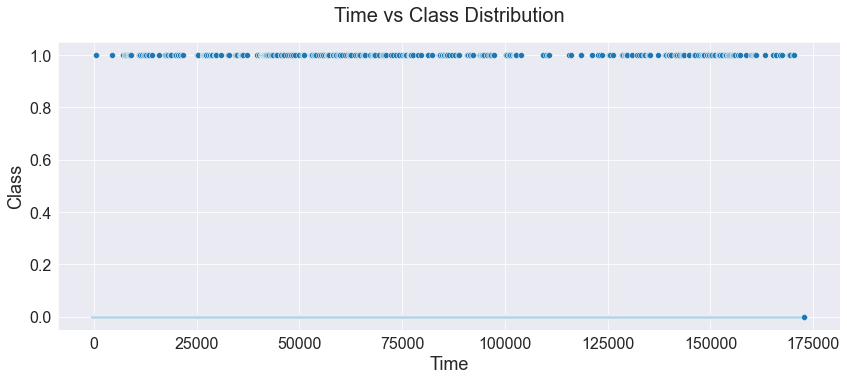

In [17]:
# Bivariate Analysis: Create a Scatter plot to observe the distribution of Class with Time

fig = plt.figure(figsize=(14,18))
cmap = sns.color_palette('Set2')

#plot the relation between the variable

plt.subplot(3,1,1)
sns.scatterplot(x=df_credit['Time'],y=df_credit['Class'],palette=cmap,data=df_credit)
plt.xlabel('Time',size=18)
plt.ylabel('Class',size=18)
plt.tick_params(axis='x',labelsize=16)
plt.tick_params(axis='y',labelsize=16)
plt.title('Time vs Class Distribution', size=20 , y=1.05)


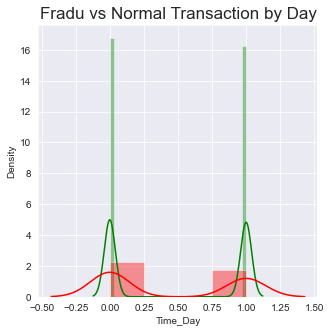

In [18]:
#The frauds Vs Normal trasaction by day
plt.figure(figsize=(5,5))
sns.distplot(df_credit[df_credit['Class'] == 0]['Time_Day'], color='green')
sns.distplot(df_credit[df_credit['Class'] == 1]['Time_Day'], color='red')
plt.title('Fradu vs Normal Transaction by Day', fontsize=17)
plt.show()

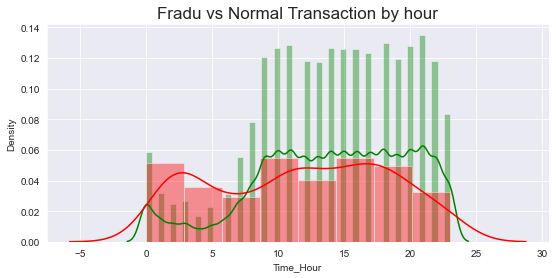

In [19]:
#The frauds Vs Normal trasaction by hour
plt.figure(figsize=(9,4))
sns.distplot(df_credit[df_credit['Class'] == 0]['Time_Hour'], color='green')
sns.distplot(df_credit[df_credit['Class'] == 1]['Time_Hour'], color='red')
plt.title('Fradu vs Normal Transaction by hour', fontsize=17)
plt.show()

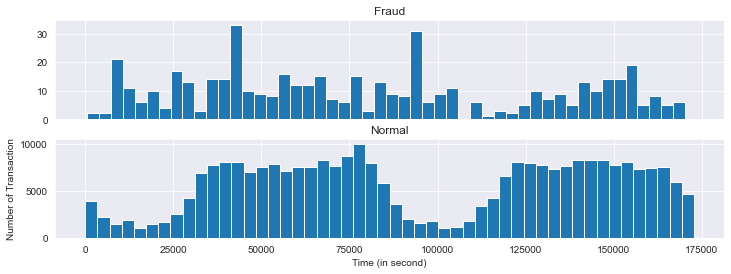

In [20]:
f, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(df_credit.Time[df_credit.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df_credit.Time[df_credit.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in second)')
plt.ylabel('Number of Transaction')
plt.show()

**Analysis**

We do not see any specific pattern for the fraudulent and non-fraudulent transctions with respect to Time. Hence, we can drop the Time column.

In [21]:
#Create a Scatter Plot to observe the distribution of classes with Amount
#To clearly the data of frauds and no frauds
df_frauds = df_credit[df_credit['Class'] == 1]
df_Regular = df_credit[df_credit['Class'] == 0]

#Fraud Transaction Amount Statistics
print(df_frauds['Amount'].describe())

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [22]:
#Regular Transaction Amount Statistics
print(df_Regular['Amount'].describe())

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


Text(0.5, 1.05, 'Amount vs Class Distribution')

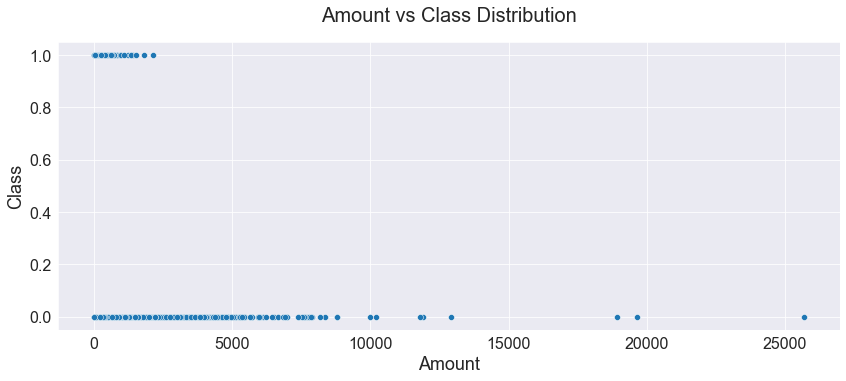

In [23]:
# Bivariate Analysis: Create a Scatter plot to observe the distribution of Class with Amount

fig = plt.figure(figsize=(14,18))
cmap = sns.color_palette('Set2')

#plot the relation between the variable

plt.subplot(3,1,1)
sns.scatterplot(x=df_credit['Amount'],y=df_credit['Class'],palette=cmap,data=df_credit)
plt.xlabel('Amount',size=18)
plt.ylabel('Class',size=18)
plt.tick_params(axis='x',labelsize=16)
plt.tick_params(axis='y',labelsize=16)
plt.title('Amount vs Class Distribution', size=20 , y=1.05)

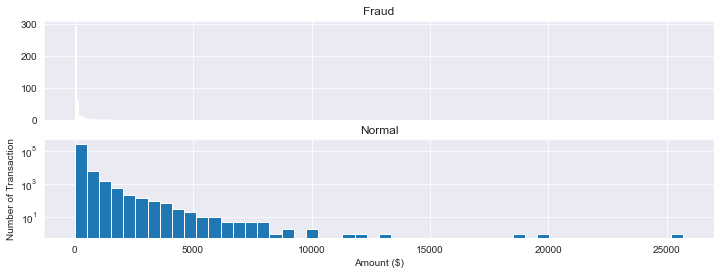

In [24]:
f, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(df_credit.Amount[df_credit.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df_credit.Amount[df_credit.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transaction')
plt.yscale('log')
plt.show()

In [25]:
# Understanding more on the correlation in data:
print("Most important features relative to target variable Class")

corr_initial = df_credit.corr()['Class']
# convert series to dataframe so it can be sorted
corr_initial = pd.DataFrame(corr_initial)
# correct column label from SalePrice to correlation
corr_initial.columns = ["Correlation"]
# sort correlation
corr_initial2 = corr_initial.sort_values(by=['Correlation'], ascending=False)
corr_initial2.head(5)

Most important features relative to target variable Class


Correlation
Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413

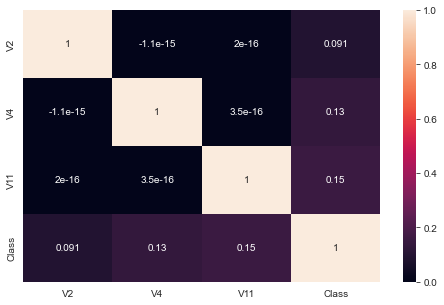

In [26]:
# Lets plot the heatmap again for relatively strong correlation (i.e. >0.09) with the target variable:

top_feature = cor.index[abs(cor['Class']>0.09)]
plt.subplots(figsize=(8, 5))
top_corr = df_credit[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

## Plotting the distribution of a variable

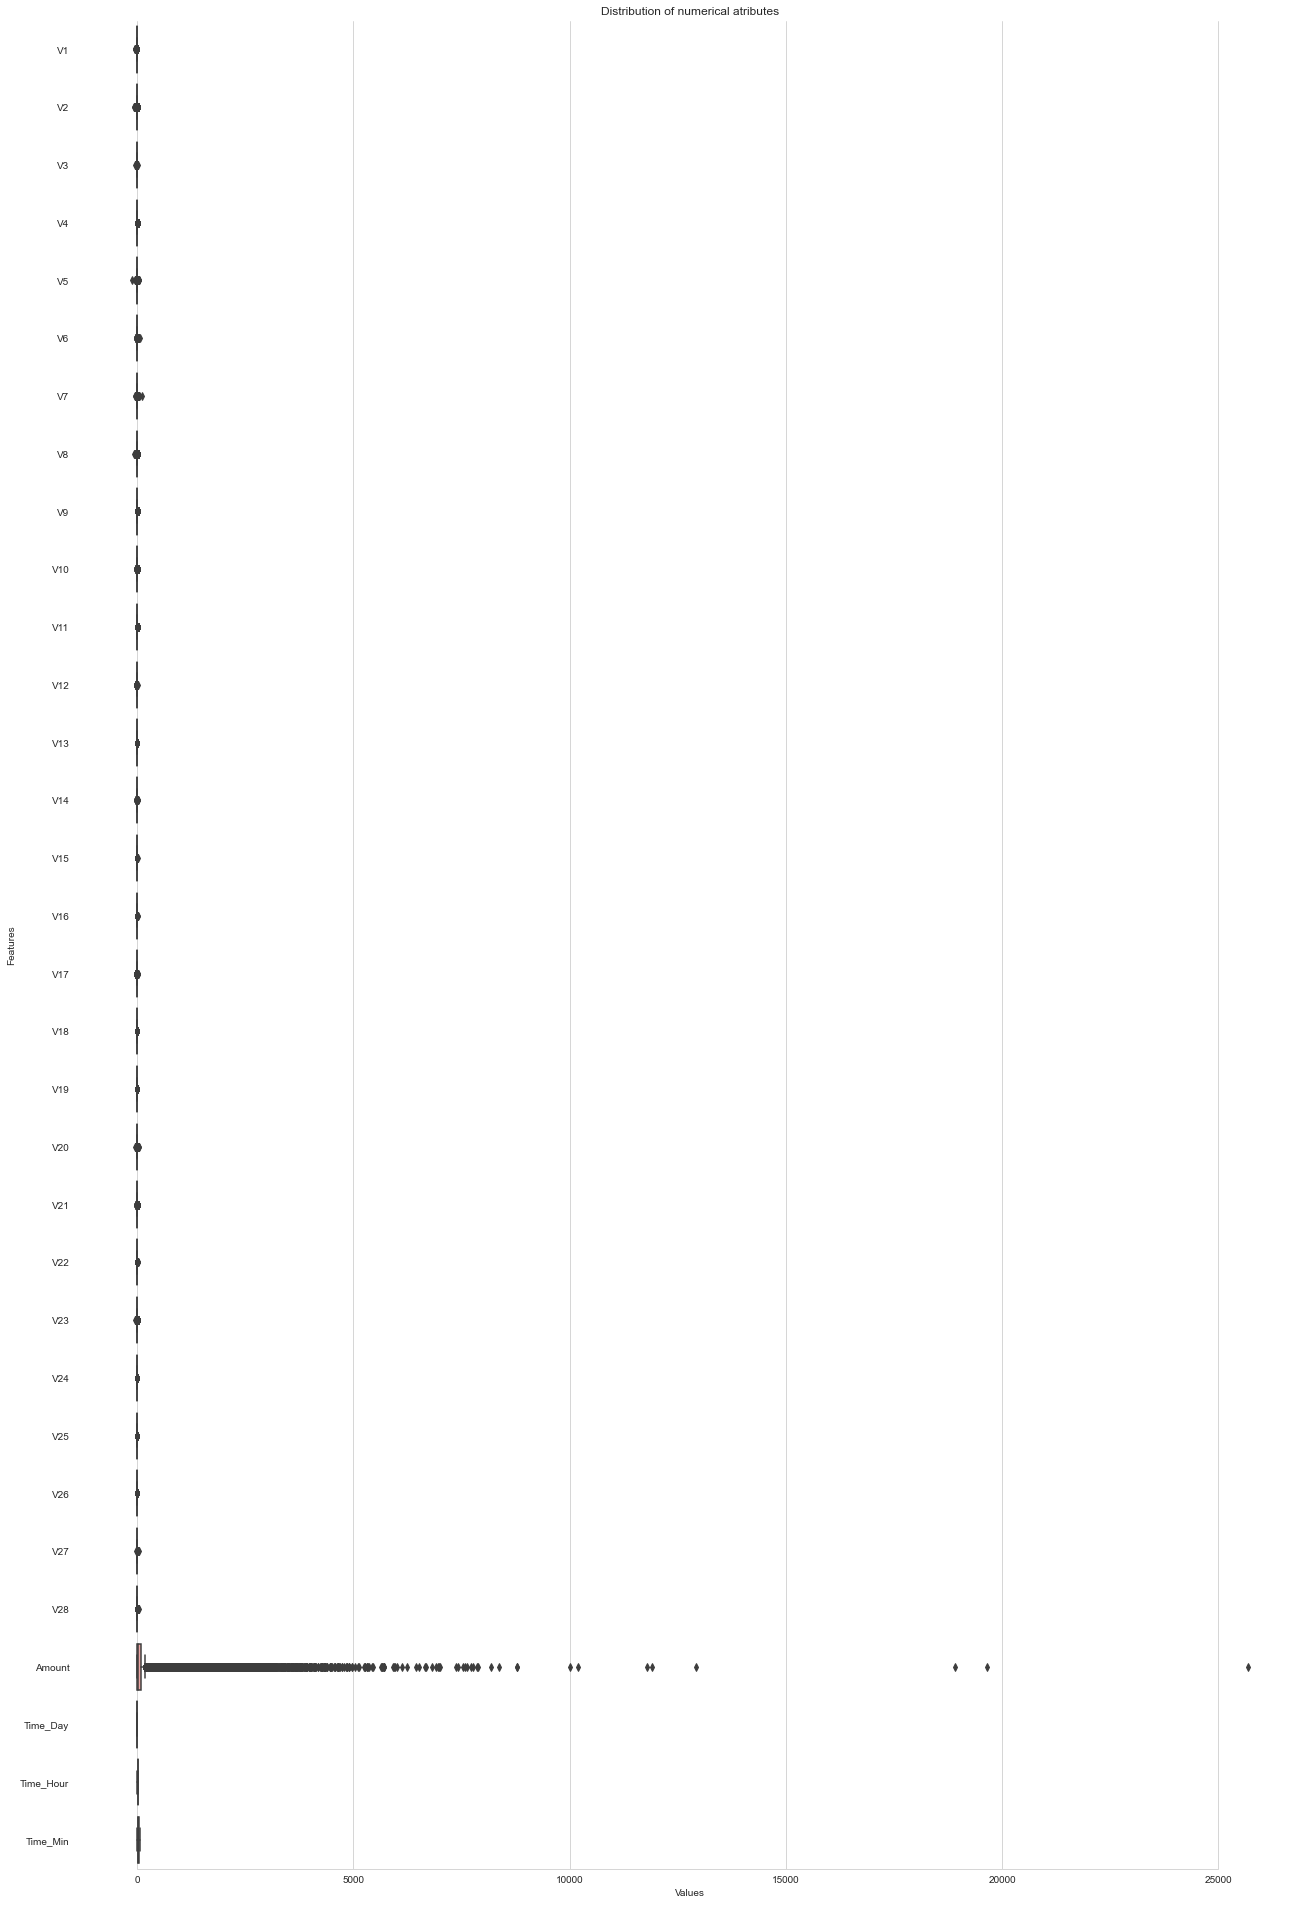

In [27]:
# Boxplot to understand the distribution of numerical attributes :

# Selecting only numerical feature from the dataframe:
numeric_features = df_credit.select_dtypes(include=[np.number]).columns.tolist()

# Excluding BINARY target feature and Time variable as its not needed for transformation : 
li_not_plot = ['Class','Time']
li_transform_num_feats = [c for c in list(numeric_features) if c not in li_not_plot]

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(22,34))
# Using log scale:
#ax.set_xscale("log")
ax = sns.boxplot(data=df_credit[li_transform_num_feats] , orient="h", palette="Paired")
ax.set(ylabel="Features")
ax.set(xlabel="Values")
ax.set(title="Distribution of numerical atributes")
sns.despine(trim=True,left=True)

In [28]:
# Drop unnecessary columns
# As we have derived the Day/Hour/Minutes from the time columns we will drop time
df_credit.drop('Time',axis=1,inplace=True)
#Also day/minutes might not be very useful as this is not time series data,we will keep the only derived colums Hours
df_credit.drop(['Time_Day','Time_Min'],axis=1,inplace=True)

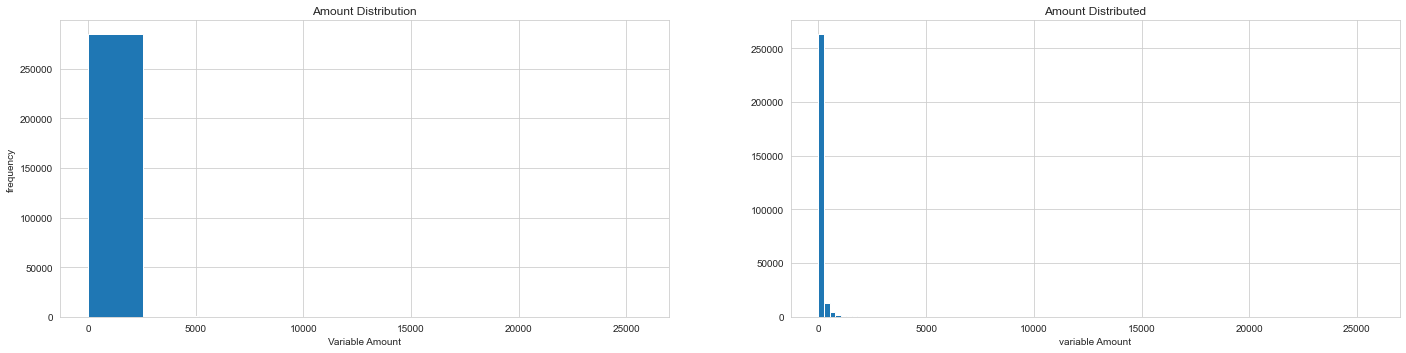

In [29]:
#Let's try to understand the amount variable as it is not PCA transformed variable

plt.figure(figsize=(24,12))

plt.subplot(2,2,1)
plt.title('Amount Distribution')
df_credit['Amount'].astype(int).plot.hist()
plt.xlabel('Variable Amount')
plt.ylabel('frequency')

plt.subplot(2,2,2)
plt.title('Amount Distributed')
sns.set()
plt.xlabel('variable Amount')
plt.hist(df_credit['Amount'],bins=100)
plt.show()

## Outliers treatment

We are not performing any outliers treatment for this particular dataset. Because all the columns are already PCA transformed, which assumed that the outlier values are taken care while transforming the data.

# Splitting the data into train & test data

In [30]:
x=df_credit.copy()
y=x.pop('Class')

In [31]:
x.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Time_Hour  
0  0.128539 -0.189115  0.133558 -0.021053  149.62          0  
1  0.167170  0.125895 -0.008983  0.014724    2.69          0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66          0  
3  0.647376 -0.221929  0.062723  0.061458  123.50          0  
4 -0.206010  0.502292  0.219422  0.215153   69.99          0  

[5 rows x 30 columns]

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=100,test_size=0.20)

In [33]:
x_train.shape

(227845, 30)

In [34]:
y_train.shape

(227845,)

In [35]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


plotting the distribution of a variable

In [36]:
cols=list(x.columns)

In [37]:
cols

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Time_Hour']

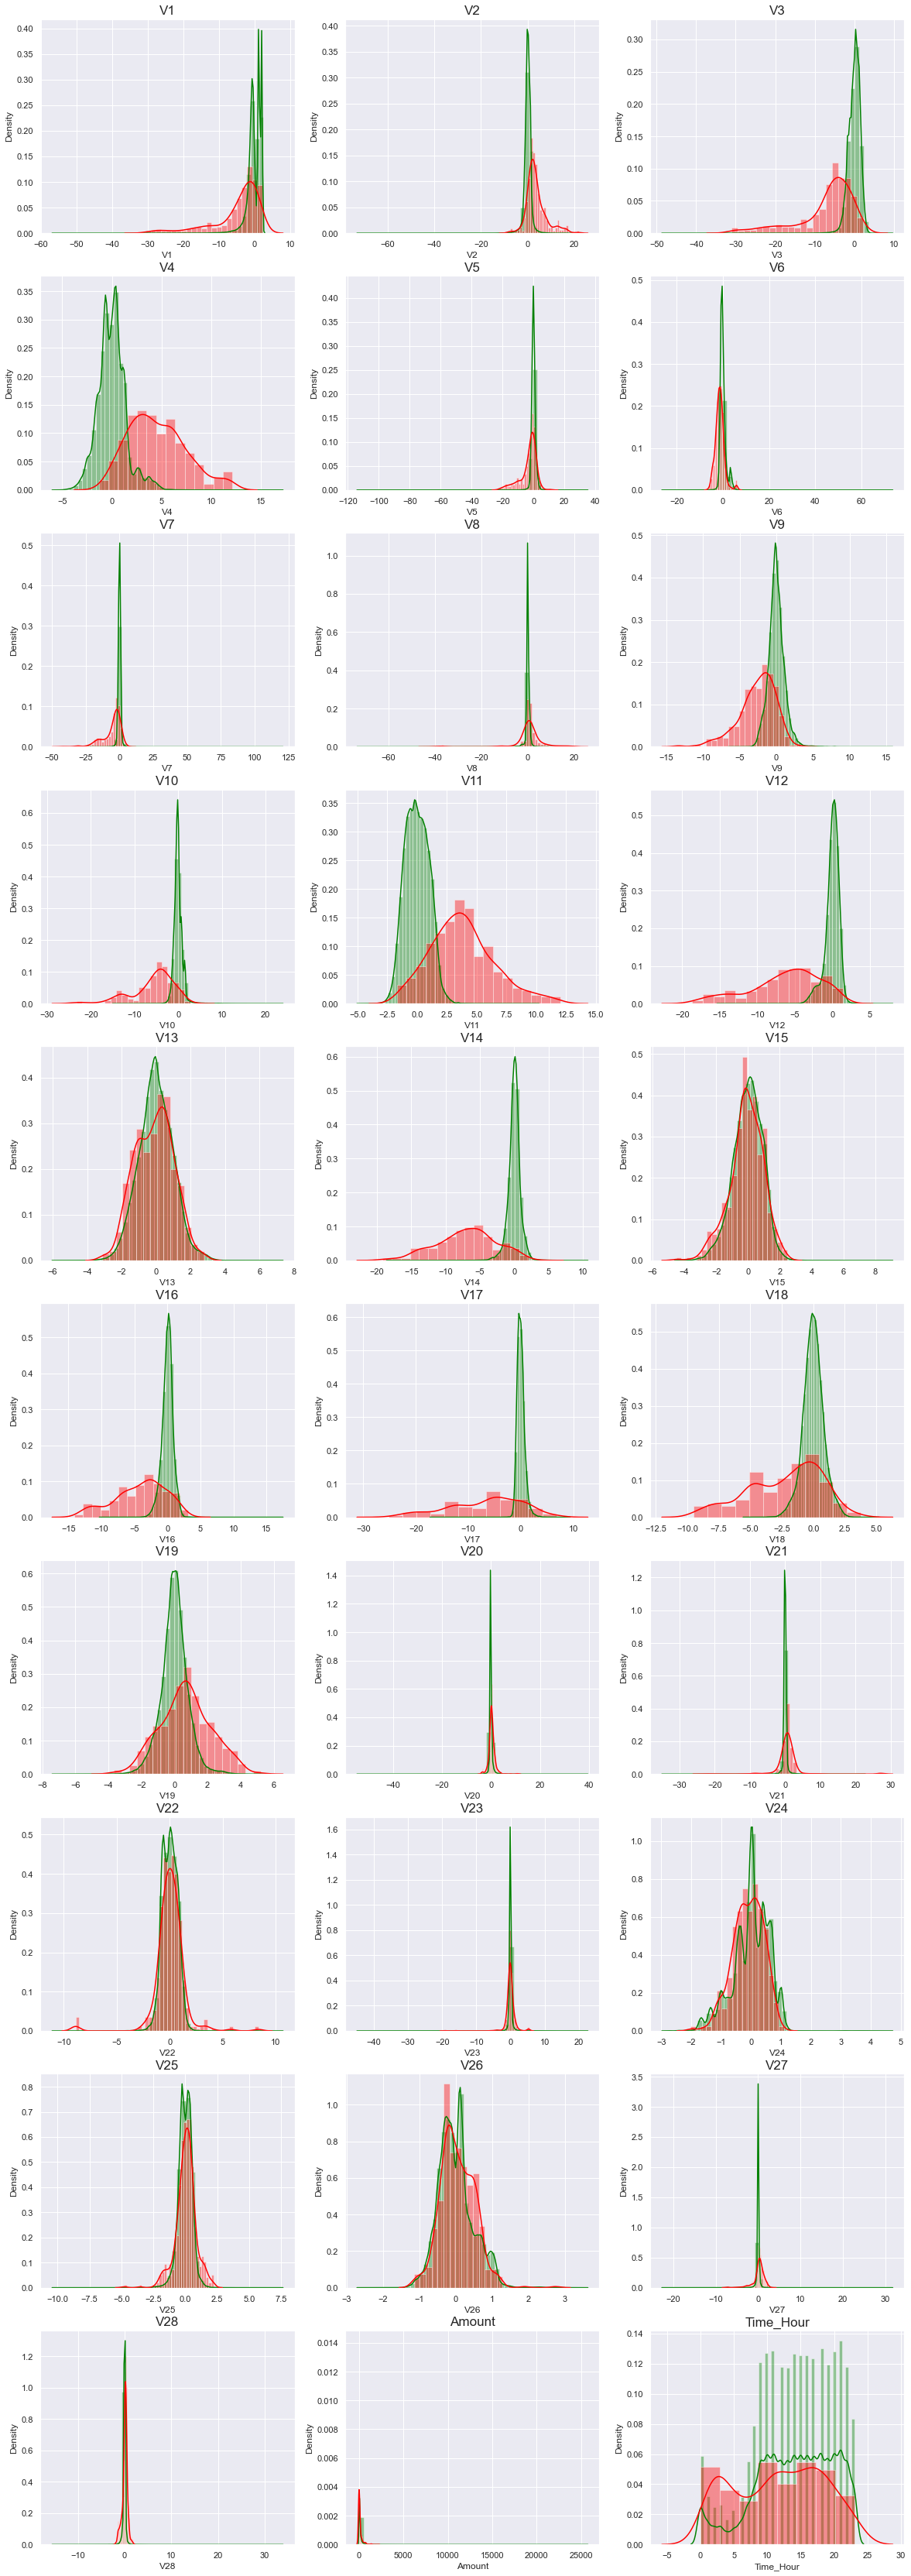

In [38]:
#Plot the histogram of a variable from the dataset to see the skewness
normal_records = df_credit.Class == 0
fraud_records = df_credit.Class == 1

plt.figure(figsize=(20,60))
for n,col in enumerate(cols):
    plt.subplot(10,3,n+1)
    sns.distplot(x[col][normal_records], color='green')
    sns.distplot(x[col][fraud_records],color='red')
    plt.title(col,fontsize=17)
plt.show()

**Create Model function for Logistic Regresstion ,KNN,SVM,Decision Tree,Random Forest,XGBoost**

In [39]:
#create a datafram to store results
df_result = pd.DataFrame(columns=['Data_Imbalance_Handling','Model','Accuracy','roc_value','threshold'])

In [40]:
def Plot_confustion_matric(y_true,y_pred):
    cm = confusion_matrix(y_true,y_pred)
    plt.clf()
    plt.imshow(cm, interpolation='nearest',cmap=plt.cm.Accent)
    classname= ['Non-Fradalent','Fraudalent']
    plt.title('Confusion Matrix - Test Data')
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    tick_mark=np.arange(len(classname))
    plt.xticks(tick_mark,classname,rotation=45)
    plt.yticks(tick_mark,classname)
    s = [['TN','FP'],['FN','TP']]
    
    for i in range(2):
        for j in range(2):
            plt.text(j,i,str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
    plt.show()

In [41]:
def builtAndRunLogisticRegresstionModels(df_Result,DataImbalance,x_train,y_train,x_test,y_test):
    
    # Logistic Regression
    from sklearn import linear_model # import the package
    from sklearn.model_selection import KFold
    
    num_c = list(np.power(10.0, np.arange(-10,10)))
    cv_num = KFold(n_splits=10, shuffle=True, random_state=42)
    
    searchCV_l2 = linear_model.LogisticRegressionCV(
                Cs=num_c
                ,penalty='l2'
                ,scoring='roc_auc'
                ,cv=cv_num
                ,random_state=42
                ,max_iter=10000
                ,fit_intercept=True
                ,solver='newton-cg'
                ,tol=10
            )
    searchCV_l1 = linear_model.LogisticRegressionCV(
                Cs=num_c
                ,penalty='l1'
                ,scoring='roc_auc'
                ,cv=cv_num
                ,random_state=42
                ,max_iter=10000
                ,fit_intercept=True
                ,solver='liblinear'
                ,tol=10
            )
    #SearchCV.fit(x_train,y_train)
    searchCV_l2.fit(x_train,y_train)
    searchCV_l1.fit(x_test,y_test)
    print ('Max auc_roc for l2 : ', searchCV_l2.scores_[1].mean(axis=0).max())
    print ('Max auc_roc for l1 : ', searchCV_l1.scores_[1].mean(axis=0).max())
    
    print('Parameters for l2 regularisation')
    print(searchCV_l2.coef_)
    print(searchCV_l2.intercept_)
    print(searchCV_l2.scores_)
    
    print('Parameter for l1 regularisation')
    print(searchCV_l1.coef_)
    print(searchCV_l1.intercept_)
    print(searchCV_l1.scores_)
    
    #Find Predicted Values
    y_pred_l2=searchCV_l2.predict(x_test)
    y_pred_l1=searchCV_l1.predict(x_test)
    
    #Find predicted probabilities
    y_pred_prob_l2 = searchCV_l2.predict_proba(x_test)[:,1]
    y_pred_prob_l1 = searchCV_l1.predict_proba(x_test)[:,1]
    
    #Accuaracy of L2/L1 models
    Accuracy_l2 = accuracy_score(y_true=y_test,y_pred=y_pred_l2)
    Accuracy_l1 = accuracy_score(y_true=y_test,y_pred=y_pred_l1)
    
    print('Accuarcy of Logistic Model with L2 regularisation : {0}'.format(Accuracy_l2))
    print('Confustion Matrix')
    Plot_confustion_matric(y_test,y_pred_l2)
    print('classsification Report')
    print(classification_report(y_test,y_pred_l2))
    print('Accuarcy of Logistic Model with L1 regularisation : {0}'.format(Accuracy_l1))
    print('Confustion Matrix')
    Plot_confustion_matric(y_test,y_pred_l1)
    print('classsification Report')
    print(classification_report(y_test,y_pred_l1))
    
    from sklearn.metrics import roc_auc_score
    from sklearn import metrics
    l2_roc_value = roc_auc_score(y_test,y_pred_prob_l2)
    print('l2 roc_value: {0}'.format(l2_roc_value))      
    fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_prob_l2)
    thresholds = thresholds[np.argmax(tpr-fpr)]
    print('l2 threshold: {0}'.format(thresholds))
          
    roc_curve = auc(fpr,tpr)
    print('ROC for the test dataset','{:.1%}'.format(roc_curve))
    plt.plot(fpr,tpr,label='Test,auc='+str(roc_curve))
    plt.legend(loc=4)
    plt.show()
             
    df_Result=df_Result.append(pd.DataFrame({'Data_Imbalance_Handling': DataImbalance,'Model':'Logistic Regression With L2 Regularisation','Accuracy':Accuracy_l2,'roc_value':l2_roc_value,'threshold':thresholds},index=[0]),ignore_index= True)

    l1_roc_value = roc_auc_score(y_test,y_pred_prob_l1)
    print('l1 roc_value: {0}'.format(l1_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_prob_l1)
    thresholds = thresholds[np.argmax(tpr-fpr)]
    print('l1 threshold: {0}'.format(thresholds))
          
    roc_curve = auc(fpr,tpr)
    print('ROC for the test dataset','{:.1%}'.format(roc_curve))
    plt.plot(fpr,tpr,label='Test,auc='+str(roc_curve))
    plt.legend(loc=4)
    plt.show()
    
    df_Result=df_Result.append(pd.DataFrame({'Data_Imbalance_Handling': DataImbalance,'Model':'Logistic Regression With L1 Regularisation','Accuracy':Accuracy_l1,'roc_value':l1_roc_value,'threshold':thresholds},index=[0]),ignore_index= True)
    return df_Result


In [42]:
def BuildAndRunKNNMOdels(df_Result,DataImbalance,x_train,y_train,x_test,y_test):
    # Evaluate KNN Models
    from sklearn import metrics
    from sklearn.metrics import roc_auc_score
    from sklearn.neighbors import KNeighborsClassifier
    #Create KNN models and fit te model with train dataset
    knn = KNeighborsClassifier(n_neighbors=5,n_jobs=16)
    knn.fit(x_train,y_train)
    score = knn.score(x_test,y_test)
    print('model score')
    print(score)
    
    
    # Accuracy
    y_pred = knn.predict(x_test)
    knn_Accuracy = accuracy_score(y_test,y_pred)
    print("Confusion Matrix")
    Plot_confustion_matric(y_test, y_pred)
    print("classification Report")
    print(classification_report(y_test, y_pred))


    knn_probs = knn.predict_proba(x_test)[:, 1]

    # Calculate roc auc
    knn_roc_value = roc_auc_score(y_test, knn_probs)
    print("KNN roc_value: {0}" .format(knn_roc_value))
    fpr, tpr, threshold = metrics.roc_curve(y_test, knn_probs)
    threshold = threshold[np.argmax(tpr-fpr)]
    print("KNN threshold: {0}".format(threshold))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
  
    df_Result = df_Result.append(pd.DataFrame({'Data_Imbalance_Handling': DataImbalance,'Model': 'KNN','Accuracy': score,'roc_value': knn_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

    return df_Result

In [43]:
def BuildAndRunSVMModels(df_Result,DataImbalance,x_train,y_train,x_test,y_test):
    #Evaluating SVM models with Sigmoid Model
    from sklearn.svm import SVC
    from sklearn import metrics
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import roc_auc_score
    
    clf = SVC(kernel='sigmoid',random_state=42)
    clf.fit(x_train,y_train)
    y_pred_SVM = clf.predict(x_test)
    SVM_score = accuracy_score(y_test,y_pred_SVM)
    print('accuaracy_score : {0}'.format(SVM_score))
    print('confusion matrix')
    Plot_confustion_matric(y_test,y_pred_SVM)
    print('Classification Report')
    print(classification_report(y_test,y_pred_SVM))

    
    # Run classifier
    classifier = SVC(kernel='sigmoid',probability=True)
    SVC_prob=classifier.fit(x_train,y_train).predict_proba(x_test)[:,1]
    
    # Calculating roc auc
    roc_value = roc_auc_score(y_test,SVC_prob)
    print('SVM roc_values : {0}'.format(roc_value))
    fpr, tpr, threshold = metrics.roc_curve(y_test,SVC_prob)
    threshold = threshold[np.argmax(tpr-fpr)]
    print('SVM threshold: {0}'.format(threshold))
    roc_auc = auc(fpr,tpr)
    print('ROC for the test dataset','{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label='Test,auc='+str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    df_Result = df_Result.append(pd.DataFrame({'Data_Imbalance_Handling': DataImbalance,'Model': 'SVM','Accuracy': SVM_score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

    return df_Result
    

In [44]:
def BuildAndRunTreeModels(df_Result, DataImbalance, x_train, y_train, x_test, y_test):
    #Evaluate Decision Tree model iwth 'gini' & 'entropy'
    from sklearn.tree import DecisionTreeClassifier
    from sklearn import metrics
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import roc_auc_score
    criteria = ['gini','entropy']
    scores = {}
    
    for c in criteria:
        dt = DecisionTreeClassifier(criterion = c,random_state=42)
        dt.fit(x_train,y_train)
        y_pred=dt.predict(x_test)
        test_score = dt.score(x_test,y_test)
        tree_pred = dt.predict_proba(x_test)[:,1]
        scores = test_score
        print(c + 'score: {0}'.format(test_score))
        print('Confusion Matrix')
        Plot_confustion_matric(y_test,y_pred)
        print('Classification Report')
        print(classification_report(y_test,y_pred))
        tree_roc_value = roc_auc_score(y_test,y_pred)
        print(c + 'tree_roc_value: {0}'.format(tree_roc_value))
        fpr, tpr ,threshold = metrics.roc_curve(y_test,tree_pred)
        threshold = threshold[np.argmax(tpr-fpr)]
        print('Threshold: {0}'.format(threshold))
        roc_auc=auc(fpr,tpr)
        print('ROC for the test dataset','{:.1%}'.format(roc_auc))
        plt.plot(fpr,tpr,label='Test,auc='+str(roc_auc))
        plt.legend(loc=4)
        plt.show()
        
        df_Result = df_Result.append(pd.DataFrame({'Data_Imbalance_Handling': DataImbalance,'Model': 'Tree Model with {0} criteria'.format(c),'Accuracy': test_score,'roc_value': tree_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)      

    return df_Result
    

In [45]:
def BulitAndRunRandomForestModels(df_Result,DataImbalance,x_train,y_train,x_test,y_test):
    #Evaluate Random Forest Model
    
    from sklearn import metrics
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    
    # Create the Models with 100 trees
    RF_model = RandomForestClassifier(n_estimators=100,bootstrap=True,max_features='sqrt',random_state=42)
    
    # Fit the training data
    RF_model.fit(x_train,y_train)
    RF_test_score=RF_model.score(x_test,y_test)
    print('Model Accuracy: {0}'.format(RF_test_score))
    
    #Actual Class Prediction
    RF_pred=RF_model.predict(x_test)
    print('Confusion Matrix')
    Plot_confustion_matric(y_test,RF_pred)
    print('Classification Report')
    print(classification_report(y_test,RF_pred))
    
    #predicting the prob for each class
    RF_prob = RF_model.predict_proba(x_test)[:,1]
    
    #calculating roc auc
    roc_value = metrics.roc_auc_score(y_test,RF_prob)
    print('Random Forest roc_value: {0}'.format(roc_value))
    fpr, tpr, threshold = metrics.roc_curve(y_test,RF_prob)
    threshold = threshold[np.argmax(tpr-fpr)]
    print('Random Forest Threshold: {0}'.format(threshold))
    roc_auc = auc(fpr,tpr)
    print('ROC of the test dataset','{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label='Test,auc='+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    
    
    df_Result = df_Result.append(pd.DataFrame({'Data_Imbalance_Handling': DataImbalance,'Model': 'Random Forest','Accuracy': RF_test_score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

    return df_Result

In [46]:
def BuildAndRunXGBoostModel(df_Result,DataImbalance,x_train,y_train,x_test,y_test):
    # Evaluate XGBoost Model
    from sklearn import metrics
    from xgboost import XGBClassifier
    from sklearn.metrics import roc_auc_score
    
    XGBModel=XGBClassifier(random_state=42)
    XGBModel.fit(x_train,y_train)
    XGB_score_value=XGBModel.score(x_test,y_test)
    print('Model Accuracy: {0}'.format(XGB_score_value))
    
    XGB_pred=XGBModel.predict(x_test)
    print('Confusion Matrix')
    Plot_confustion_matric(y_test,XGB_pred)
    print('Classification Report')
    print(classification_report(y_test,XGB_pred))
    
    # Prob for each class
    XGB_pred_prob=XGBModel.predict_proba(x_test)[:,1]
    
    # Calculating the roc_auc
    roc_value = metrics.roc_auc_score(y_test,XGB_pred_prob)
    print('XGBoost roc_value: {0}'.format(roc_value))
    fpr, tpr, threshold = metrics.roc_curve(y_test,XGB_pred_prob)
    threshold=threshold[np.argmax(tpr-fpr)]
    print('XGBoost threshold: {0}'.format(threshold))
    roc_auc=auc(fpr,tpr)
    print('ROC for the test dataset','{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label='Test,auc='+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    
    df_Result = df_Result.append(pd.DataFrame({'Data_Imbalance_Handling': DataImbalance,'Model': 'XGBoost','Accuracy': XGB_score_value,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

    return df_Result
    

### If there is skewness present in the distribution use:

* Power Transformation package present in the preprocessing library provided  sklearn to make dstribution more gaussian 
    
    
    

In [47]:
# -Apply : Preprocessing.PowerTransfomer(copy=FALSE) to fit and transform train & test datset
from sklearn.preprocessing import PolynomialFeatures,PowerTransformer
pt = PowerTransformer()
pt.fit(x_train)
x_train_pt = pt.transform(x_train)
x_test_pt = pt.transform(x_test)

#Create DataFrame
x_train_pt_df = pd.DataFrame(data=x_train_pt,columns=cols)
x_test_pt_df = pd.DataFrame(data=x_test_pt,columns=cols)

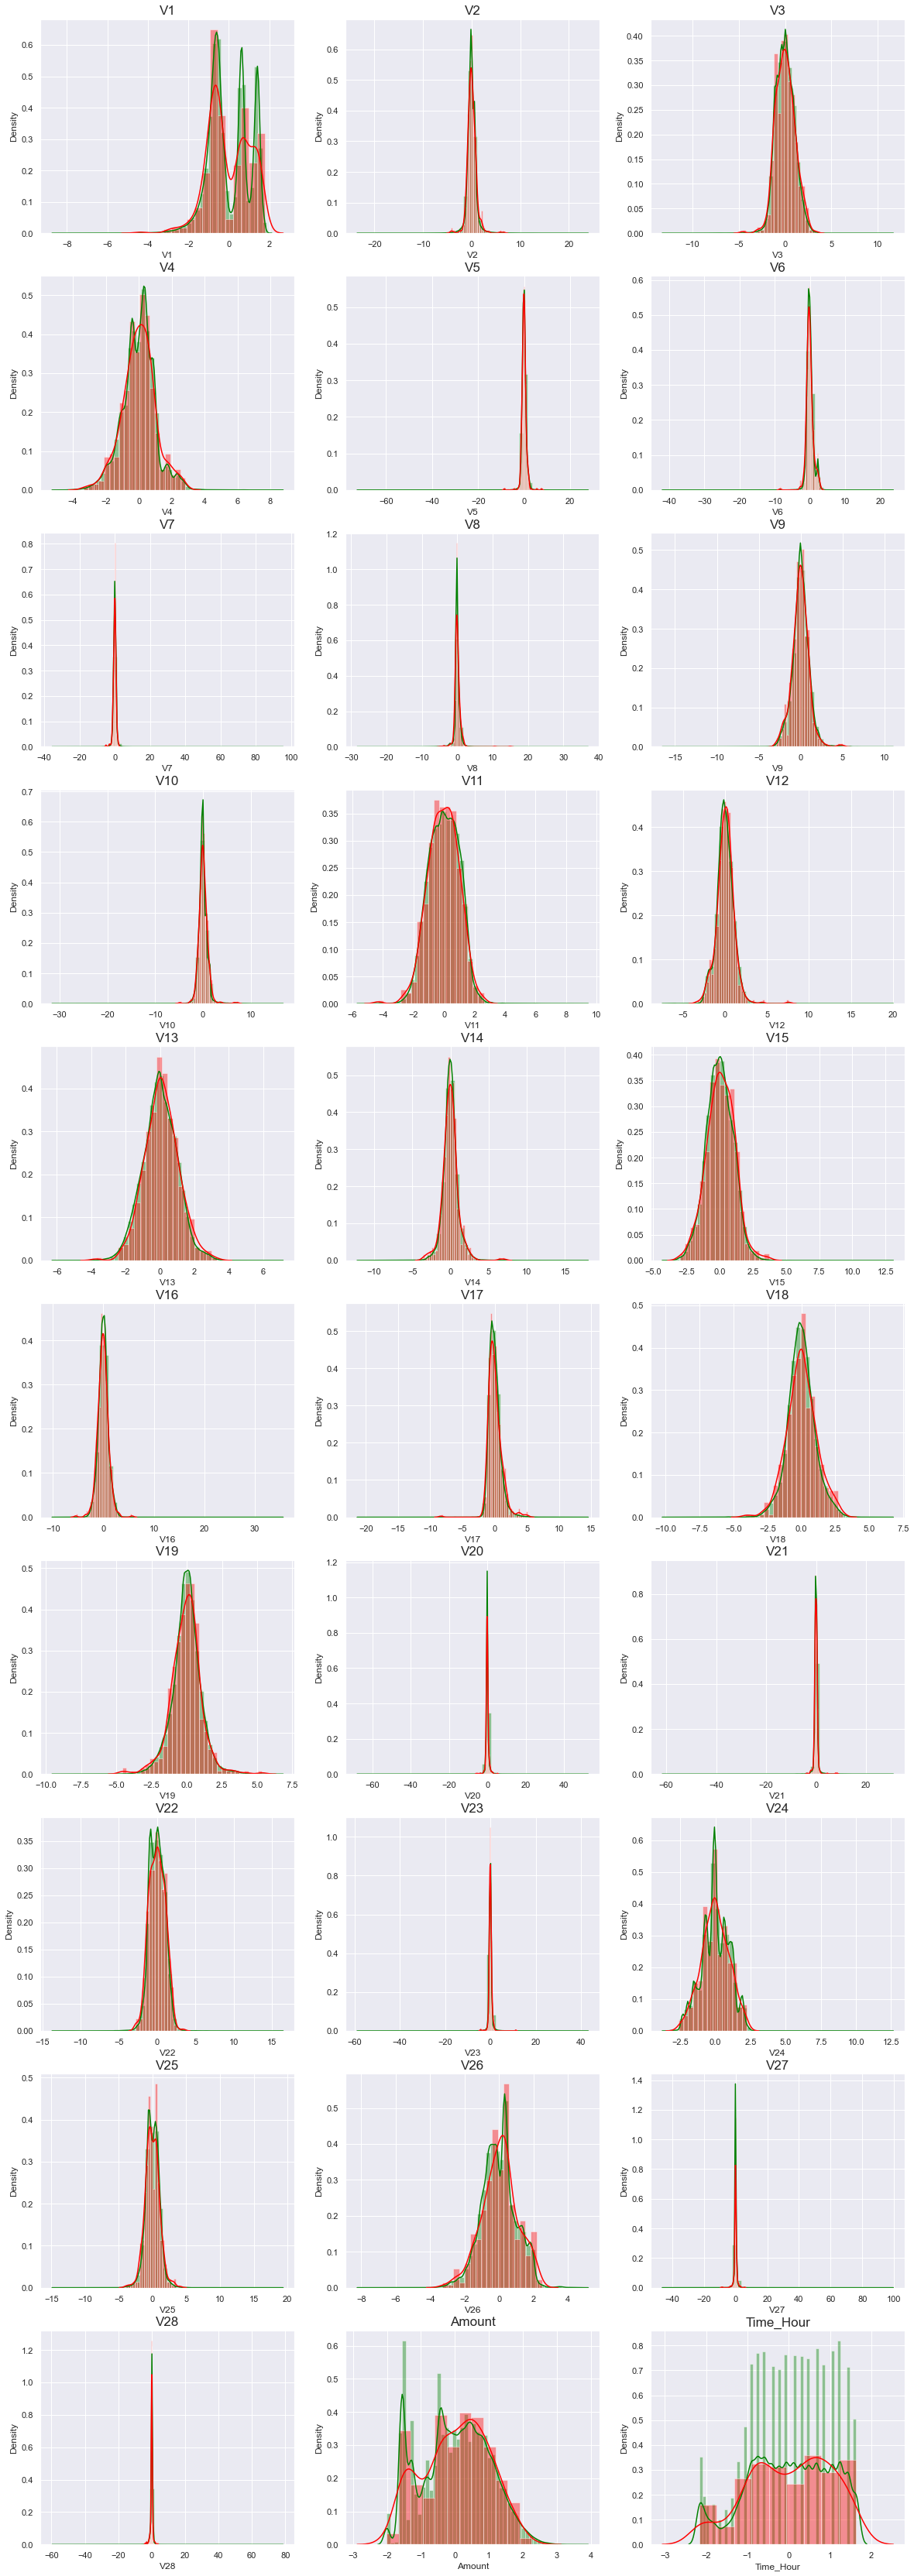

In [48]:
#Plot the histogram of a variable from the train dataset agaiin to see the results

plt.figure(figsize=(20,60))
for n,col in enumerate(cols):
    plt.subplot(10,3,n+1)
    sns.distplot(x_train_pt_df[col][normal_records],color='green')
    sns.distplot(x_train_pt_df[col][fraud_records],color='red')
    plt.title(col,fontsize=17)
plt.show()

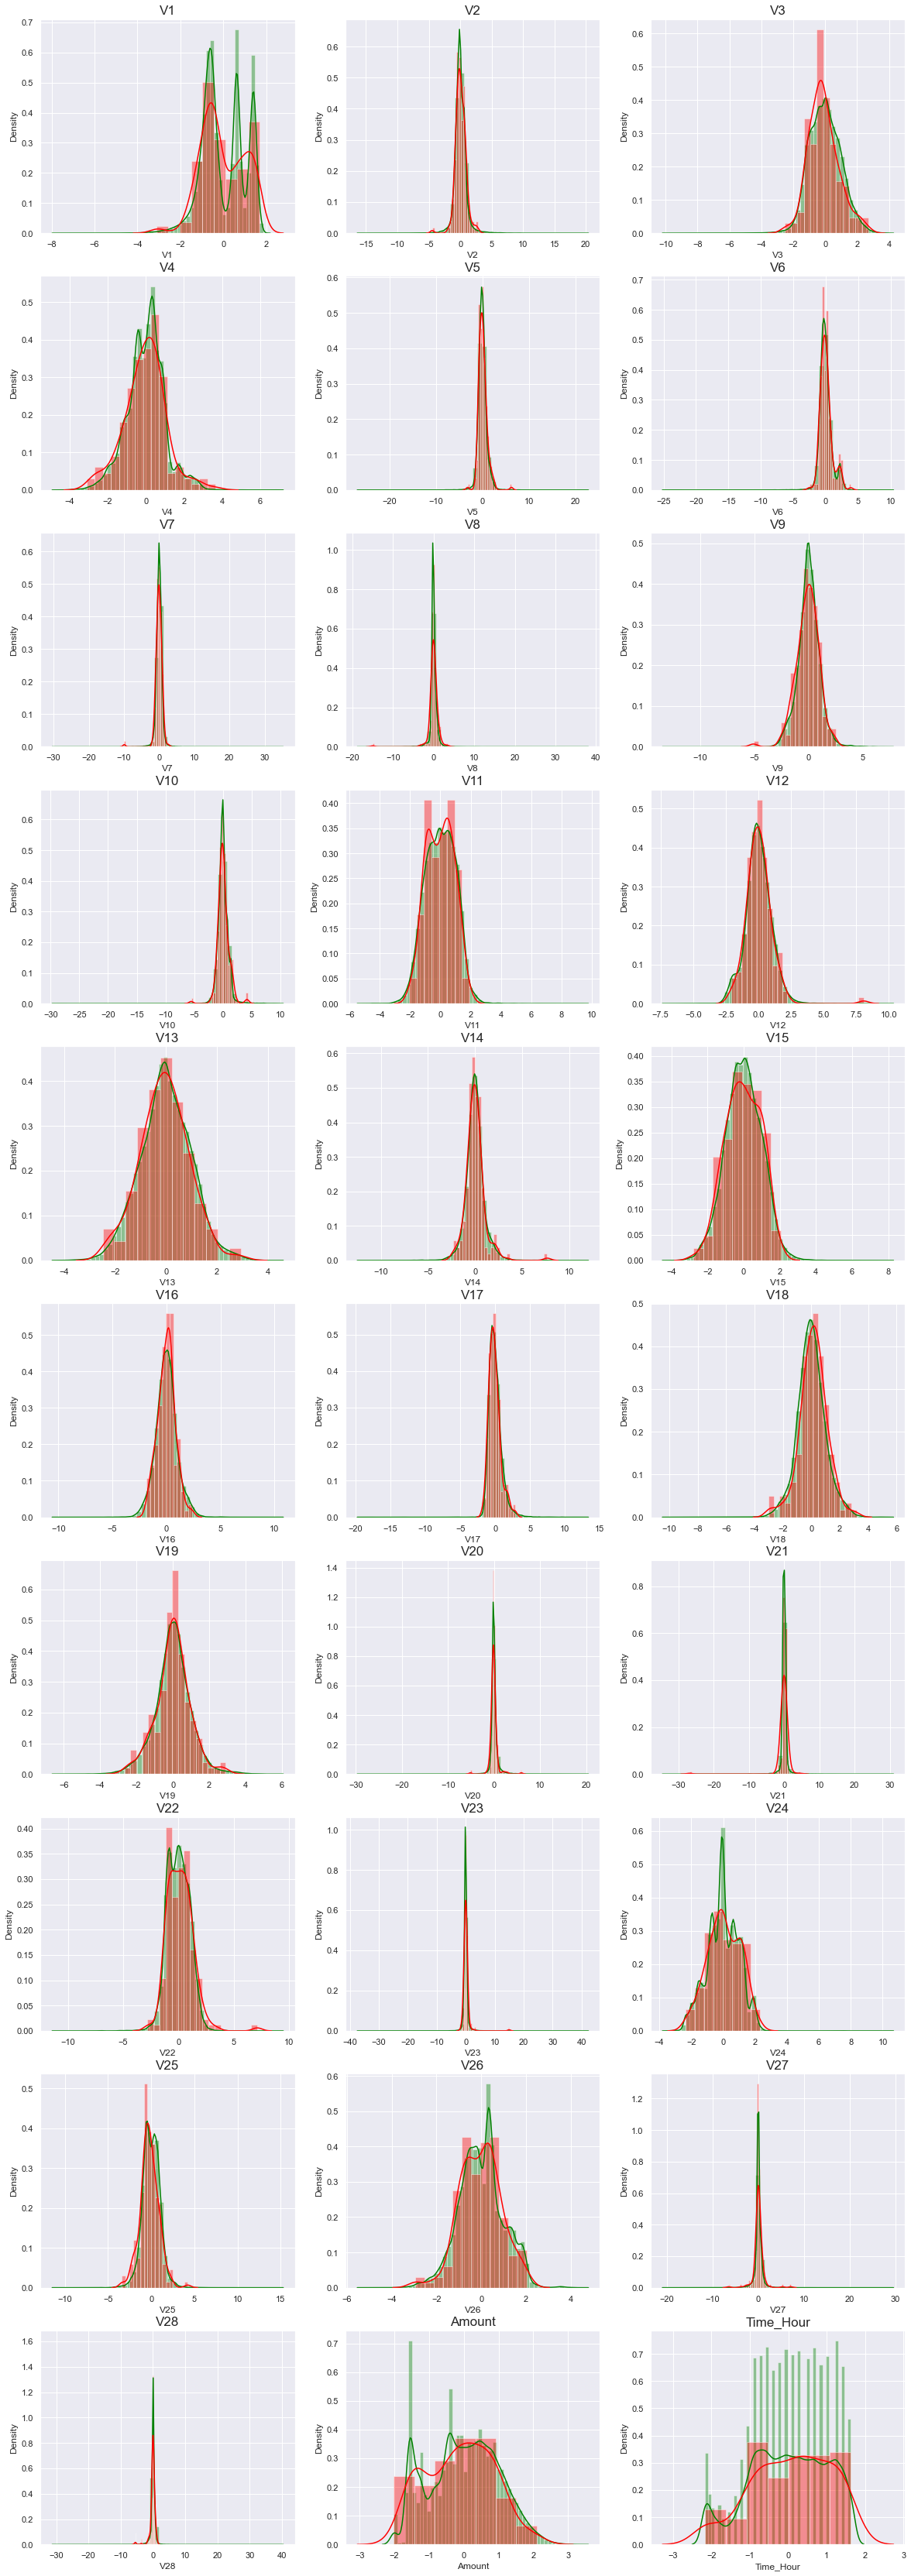

In [49]:
# plot the histogram of a variable from the test dataset again to see the resu
plt.figure(figsize=(20,60))
for n, col in enumerate(cols):
    plt.subplot(10,3,n+1)
    sns.distplot(x_test_pt_df[col][normal_records],color='green')
    sns.distplot(x_test_pt_df[col][fraud_records],color='red')
    plt.title(col,fontsize=17)
plt.show()

# Model Building 

 - Build different models on the imbalanced dataset and see the result

## Power Transformer

Logistic Regresstion with L1 & L2 Regularisation
Max auc_roc for l2 :  0.983760023970567
Max auc_roc for l1 :  0.9705828686591289
Parameters for l2 regularisation
[[-0.09276541 -0.06828297 -0.28652331  0.55493742  0.02789795  0.01396825
  -0.06824953 -0.20408006 -0.18143666 -0.20371291  0.17699968 -0.50183428
  -0.11614819 -0.66830552 -0.0815942  -0.18013738 -0.08164992  0.03866812
  -0.03807332 -0.02310099  0.10465199  0.10090233 -0.03198749 -0.02939204
   0.01001787  0.00785392 -0.04474827 -0.02229527  0.02208228  0.08474082]]
[-8.07230494]
{1: array([[0.90398235, 0.90383704, 0.90383704, 0.90383704, 0.90383704,
        0.90419481, 0.96804377, 0.99255279, 0.99488378, 0.99521346,
        0.99521346, 0.99521346, 0.99521346, 0.99521346, 0.99521346,
        0.99521346, 0.99521346, 0.99521346, 0.99521346, 0.99521346],
       [0.9306611 , 0.9306611 , 0.9306611 , 0.9306611 , 0.9306611 ,
        0.93091836, 0.96502028, 0.98005776, 0.97844439, 0.97856203,
        0.97856203, 0.97856203, 0.9785

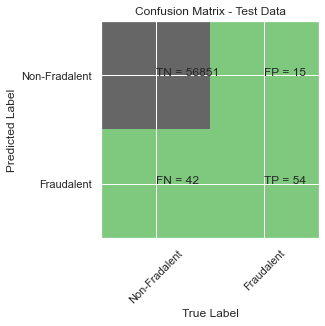

classsification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.78      0.56      0.65        96

    accuracy                           1.00     56962
   macro avg       0.89      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962

Accuarcy of Logistic Model with L1 regularisation : 0.9988764439450862
Confustion Matrix


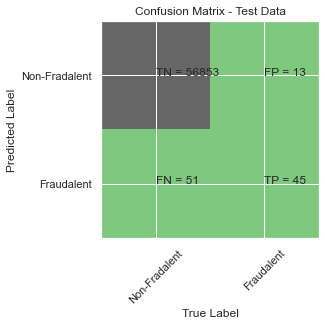

classsification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.78      0.47      0.58        96

    accuracy                           1.00     56962
   macro avg       0.89      0.73      0.79     56962
weighted avg       1.00      1.00      1.00     56962

l2 roc_value: 0.9668061026506759
l2 threshold: 0.001289178584394122
ROC for the test dataset 96.7%


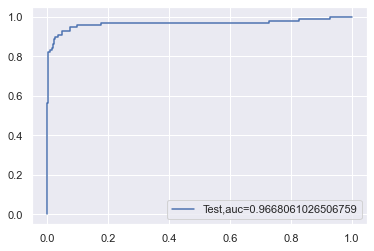

l1 roc_value: 0.9743534508024714
l1 threshold: 0.005982573966167657
ROC for the test dataset 97.4%


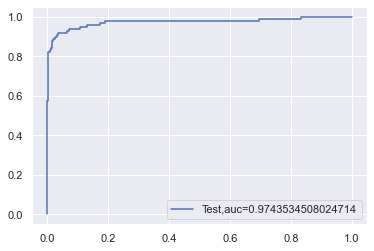

Time Taken by Model: --- 83.74642276763916 second ---
--------------------------------------------------------------------------------
Decision Tree Model with 'gini' & 'entropy' criteria
giniscore: 0.9988062216916541
Confusion Matrix


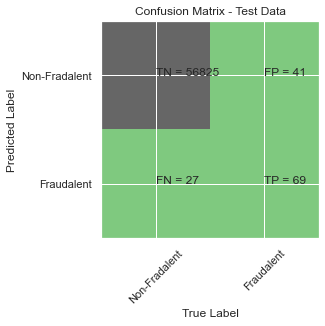

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.63      0.72      0.67        96

    accuracy                           1.00     56962
   macro avg       0.81      0.86      0.83     56962
weighted avg       1.00      1.00      1.00     56962

ginitree_roc_value: 0.8590145033939437
Threshold: 1.0
ROC for the test dataset 85.9%


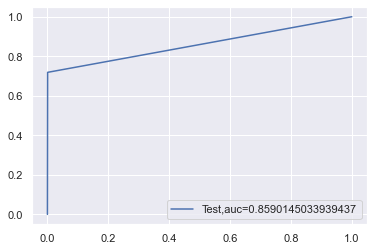

entropyscore: 0.9990519995786665
Confusion Matrix


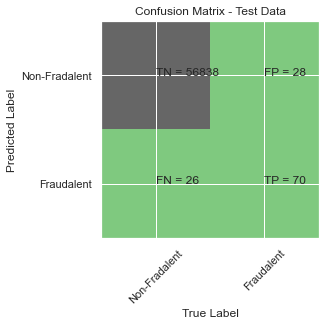

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.71      0.73      0.72        96

    accuracy                           1.00     56962
   macro avg       0.86      0.86      0.86     56962
weighted avg       1.00      1.00      1.00     56962

entropytree_roc_value: 0.8643371405291973
Threshold: 1.0
ROC for the test dataset 86.4%


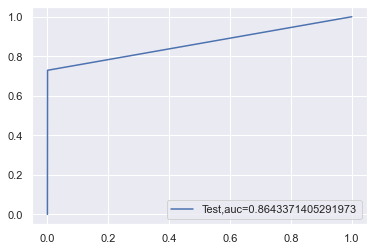

Time Taken by Model: --- 29.164453744888306 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9993504441557529
Confusion Matrix


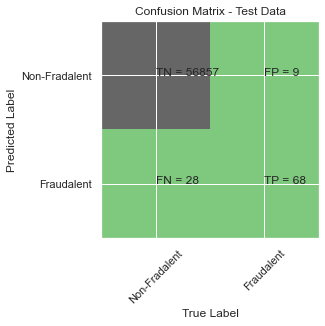

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.88      0.71      0.79        96

    accuracy                           1.00     56962
   macro avg       0.94      0.85      0.89     56962
weighted avg       1.00      1.00      1.00     56962

Random Forest roc_value: 0.940564037972309
Random Forest Threshold: 0.01
ROC of the test dataset 94.1%


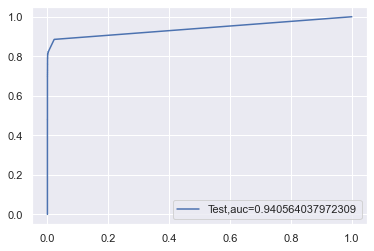

Time Taken by Model: --- 179.02779579162598 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994557775359011
Confusion Matrix


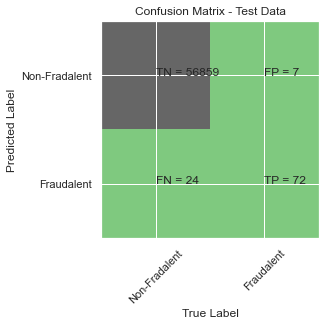

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.91      0.75      0.82        96

    accuracy                           1.00     56962
   macro avg       0.96      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962

XGBoost roc_value: 0.9729984744838743
XGBoost threshold: 5.146719195181504e-05
ROC for the test dataset 97.3%


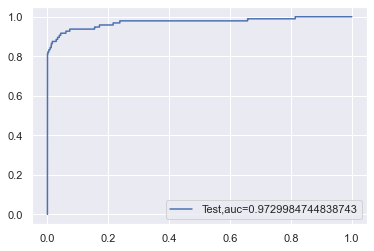

Time Taken by Model: --- 23.033366203308105 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9992977774656788
Confusion Matrix


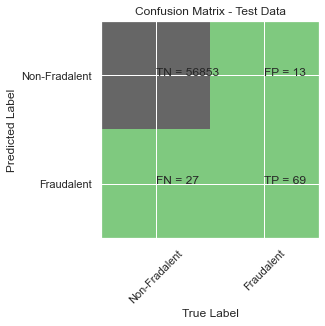

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.84      0.72      0.78        96

    accuracy                           1.00     56962
   macro avg       0.92      0.86      0.89     56962
weighted avg       1.00      1.00      1.00     56962

KNN roc_value: 0.900851068740548
KNN threshold: 0.2
ROC for the test dataset 90.1%


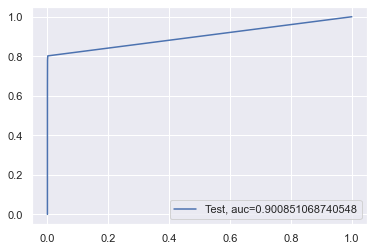

Time Taken by Model: --- 531.099681854248 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuaracy_score : 0.9985604438046417
confusion matrix


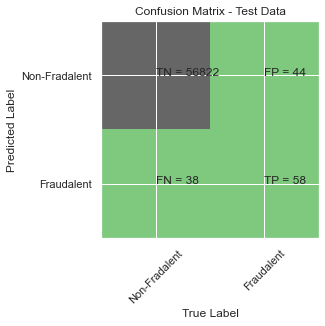

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.57      0.60      0.59        96

    accuracy                           1.00     56962
   macro avg       0.78      0.80      0.79     56962
weighted avg       1.00      1.00      1.00     56962

SVM roc_values : 0.8913403146578507
SVM threshold: 0.0009321064372731619
ROC for the test dataset 89.1%


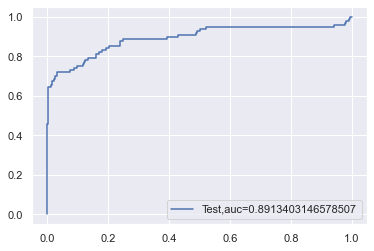

Time Taken by Model: --- 70.80372071266174 seconds ---


In [50]:
#Run the Logistic Regresstion with L1 & L2 regularization
print('Logistic Regresstion with L1 & L2 Regularisation')
start_time = time.time()
df_result = builtAndRunLogisticRegresstionModels(df_result,'Power Transformer',x_train_pt_df,y_train,x_test_pt_df,y_test)
print('Time Taken by Model: --- %s second ---'%(time.time()-start_time))
print('-'*80)
#Run Decision Tre Model with 'gini' & 'entropy' criteria
print("Decision Tree Model with 'gini' & 'entropy' criteria")
start_time = time.time()
df_result = BuildAndRunTreeModels(df_result,'Power Transformer',x_train_pt_df,y_train,x_test_pt_df,y_test)
print('Time Taken by Model: --- %s seconds ---'%(time.time() -start_time))
print('-'*80)
#Run Random Forest Model
print('Random Forest Model')
start_time = time.time()
df_result = BulitAndRunRandomForestModels(df_result,'Power Transformer',x_train_pt_df,y_train,x_test_pt_df,y_test)
print('Time Taken by Model: --- %s seconds ---'%(time.time() -start_time))
print('-'*80)
#Run XGBoost Model
print('XGBoost Model')
start_time = time.time()
df_result = BuildAndRunXGBoostModel(df_result,'Power Transformer',x_train_pt_df,y_train,x_test_pt_df,y_test)
print('Time Taken by Model: --- %s seconds ---'%(time.time() -start_time))
print('-'*80)
#Run KNN Model
print('KNN Model')
start_time = time.time()
df_result = BuildAndRunKNNMOdels(df_result,'Power Transformer',x_train_pt_df,y_train,x_test_pt_df,y_test)
print('Time Taken by Model: --- %s seconds ---'%(time.time() -start_time))
print('-'*80)
#Run SVM Model with Signoid Kernel
print('SVM Model with Sigmoid Kernel')
start_time = time.time()
df_result = BuildAndRunSVMModels(df_result,'Power Transformer',x_train_pt_df,y_train,x_test_pt_df,y_test)
print('Time Taken by Model: --- %s seconds ---'%(time.time() -start_time))                                         

In [51]:
df_result

Data_Imbalance_Handling                                       Model  \
0       Power Transformer  Logistic Regression With L2 Regularisation   
1       Power Transformer  Logistic Regression With L1 Regularisation   
2       Power Transformer               Tree Model with gini criteria   
3       Power Transformer            Tree Model with entropy criteria   
4       Power Transformer                               Random Forest   
5       Power Transformer                                     XGBoost   
6       Power Transformer                                         KNN   
7       Power Transformer                                         SVM   

   Accuracy  roc_value  threshold  
0  0.998999   0.966806   0.001289  
1  0.998876   0.974353   0.005983  
2  0.998806   0.859015   1.000000  
3  0.999052   0.864337   1.000000  
4  0.999350   0.940564   0.010000  
5  0.999456   0.972998   0.000051  
6  0.999298   0.900851   0.200000  
7  0.998560   0.891340   0.000932

## Perform Cross Validation with RepeatedKFOLD


In [52]:
#Lets perfrom RepeatedKFold and check the results
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in rkf.split(x,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train_cv, x_test_cv = x.iloc[train_index], x.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [     1      2      4 ... 284803 284805 284806] TEST: [     0      3      6 ... 284792 284800 284804]
TRAIN: [     0      1      2 ... 284803 284804 284806] TEST: [     7     10     11 ... 284786 284794 284805]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     5     12     20 ... 284801 284802 284803]
TRAIN: [     0      1      3 ... 284803 284804 284805] TEST: [     2      4      9 ... 284783 284793 284806]
TRAIN: [     0      2      3 ... 284804 284805 284806] TEST: [     1      8     14 ... 284797 284798 284799]
TRAIN: [     0      1      2 ... 284803 284804 284806] TEST: [     4      5     14 ... 284796 284798 284805]
TRAIN: [     2      3      4 ... 284804 284805 284806] TEST: [     0      1      8 ... 284788 284789 284797]
TRAIN: [     0      1      3 ... 284804 284805 284806] TEST: [     2      7     12 ... 284786 284793 284802]
TRAIN: [     0      1      2 ... 284803 284805 284806] TEST: [     3      6     13 ... 284794 284800 284804]
TRAIN: [     0     

***It seems XGBoost with RepeatedKFold cross validation has provided us with best results with ROC_valuee of 0.98***

In [53]:
df_result

Data_Imbalance_Handling                                       Model  \
0       Power Transformer  Logistic Regression With L2 Regularisation   
1       Power Transformer  Logistic Regression With L1 Regularisation   
2       Power Transformer               Tree Model with gini criteria   
3       Power Transformer            Tree Model with entropy criteria   
4       Power Transformer                               Random Forest   
5       Power Transformer                                     XGBoost   
6       Power Transformer                                         KNN   
7       Power Transformer                                         SVM   

   Accuracy  roc_value  threshold  
0  0.998999   0.966806   0.001289  
1  0.998876   0.974353   0.005983  
2  0.998806   0.859015   1.000000  
3  0.999052   0.864337   1.000000  
4  0.999350   0.940564   0.010000  
5  0.999456   0.972998   0.000051  
6  0.999298   0.900851   0.200000  
7  0.998560   0.891340   0.000932

Logistic Regresstion with L1 & L2 Regularisation
Max auc_roc for l2 :  0.9831558357140706
Max auc_roc for l1 :  0.9822761204045982
Parameters for l2 regularisation
[[ 0.01240952  0.0385787  -0.07124097  0.22975749  0.09041972 -0.05025234
  -0.0288781  -0.12577099 -0.08362209 -0.17252918  0.13549654 -0.20389649
  -0.05239947 -0.38777906 -0.00154545 -0.105448   -0.09437973 -0.01002887
   0.00853541 -0.01969257  0.0413135   0.02767987 -0.01845999 -0.00927898
  -0.01340309  0.00512625 -0.006455   -0.0049905   0.00041445  0.00437379]]
[-7.47094709]
{1: array([[0.64237501, 0.64381813, 0.65823143, 0.76680185, 0.91590479,
        0.96068375, 0.97446143, 0.98458131, 0.98530687, 0.97949139,
        0.97949139, 0.97949139, 0.97949139, 0.97949139, 0.97949139,
        0.97949139, 0.97949139, 0.97949139, 0.97949139, 0.97949139],
       [0.49023443, 0.49185298, 0.50987933, 0.64593282, 0.85352421,
        0.94071883, 0.97650265, 0.98678662, 0.98191288, 0.97598813,
        0.97154747, 0.97154747, 0.971

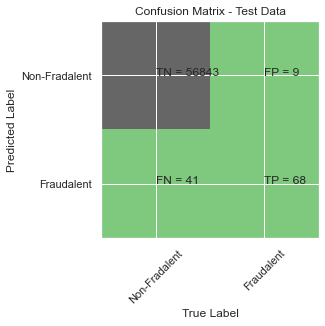

classsification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56852
           1       0.88      0.62      0.73       109

    accuracy                           1.00     56961
   macro avg       0.94      0.81      0.87     56961
weighted avg       1.00      1.00      1.00     56961

Accuarcy of Logistic Model with L1 regularisation : 0.9990344270641316
Confustion Matrix


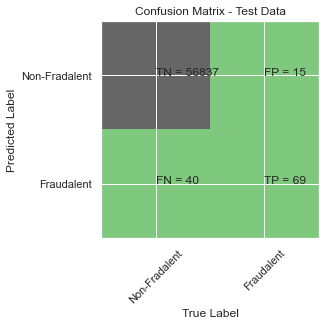

classsification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56852
           1       0.82      0.63      0.72       109

    accuracy                           1.00     56961
   macro avg       0.91      0.82      0.86     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9893092768798689
l2 threshold: 0.0028839687404030676
ROC for the test dataset 98.9%


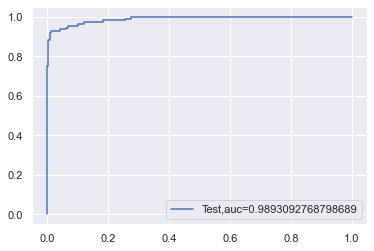

l1 roc_value: 0.9032086854197959
l1 threshold: 0.043890404121792785
ROC for the test dataset 90.3%


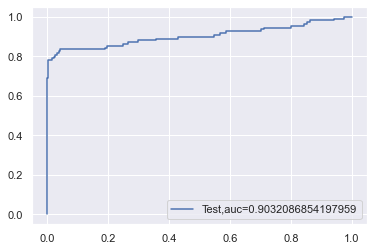

Time Taken by Model: --- 233.25801634788513 second ---
--------------------------------------------------------------------------------
Decision Tree Model with 'gini' & 'entropy' criteria
giniscore: 0.9991046505503766
Confusion Matrix


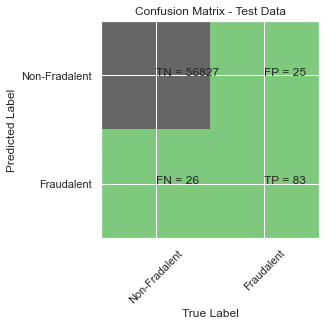

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56852
           1       0.77      0.76      0.76       109

    accuracy                           1.00     56961
   macro avg       0.88      0.88      0.88     56961
weighted avg       1.00      1.00      1.00     56961

ginitree_roc_value: 0.880514075820237
Threshold: 1.0
ROC for the test dataset 88.1%


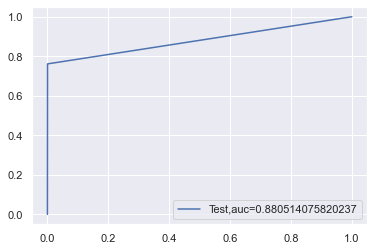

entropyscore: 0.9989993153210092
Confusion Matrix


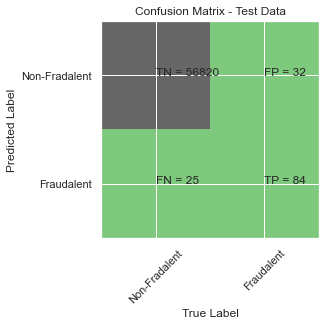

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56852
           1       0.72      0.77      0.75       109

    accuracy                           1.00     56961
   macro avg       0.86      0.89      0.87     56961
weighted avg       1.00      1.00      1.00     56961

entropytree_roc_value: 0.8850396684260501
Threshold: 1.0
ROC for the test dataset 88.5%


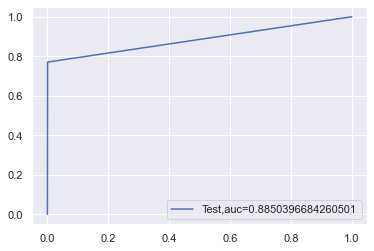

Time Taken by Model: --- 23.324122428894043 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9994031003669177
Confusion Matrix


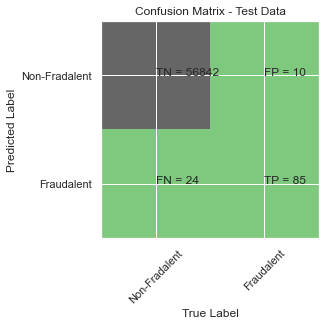

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56852
           1       0.89      0.78      0.83       109

    accuracy                           1.00     56961
   macro avg       0.95      0.89      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9527758215924561
Random Forest Threshold: 0.02
ROC of the test dataset 95.3%


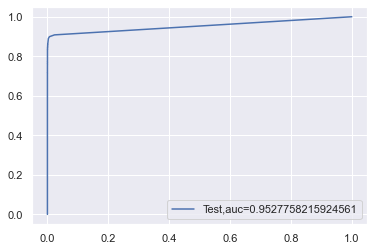

Time Taken by Model: --- 155.22420024871826 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994382121100402
Confusion Matrix


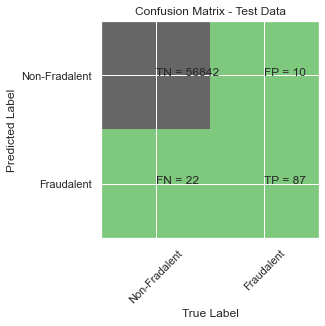

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56852
           1       0.90      0.80      0.84       109

    accuracy                           1.00     56961
   macro avg       0.95      0.90      0.92     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.9889894378902375
XGBoost threshold: 0.00018200476188212633
ROC for the test dataset 98.9%


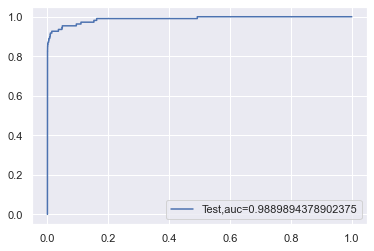

Time Taken by Model: --- 20.533097982406616 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9992275416513052
Confusion Matrix


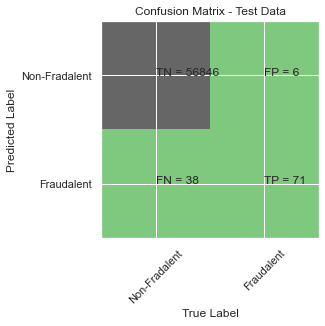

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56852
           1       0.92      0.65      0.76       109

    accuracy                           1.00     56961
   macro avg       0.96      0.83      0.88     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8759539496403667
KNN threshold: 0.2
ROC for the test dataset 87.6%


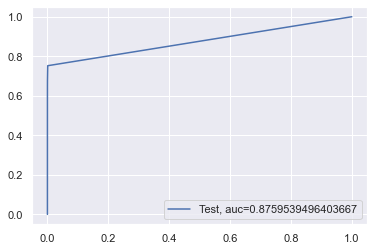

Time Taken by Model: --- 43.965975761413574 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuaracy_score : 0.9982268569723144
confusion matrix


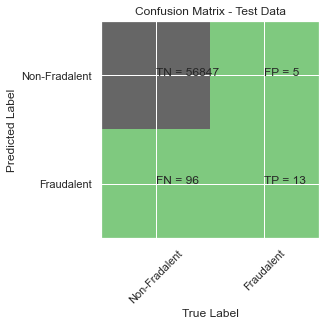

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56852
           1       0.72      0.12      0.20       109

    accuracy                           1.00     56961
   macro avg       0.86      0.56      0.60     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_values : 0.46300373027148556
SVM threshold: 0.0028475208472195446
ROC for the test dataset 46.3%


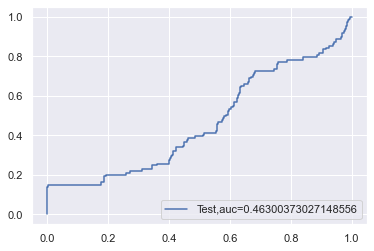

Time Taken by Model: --- 576.2155630588531 seconds ---


In [54]:
#Run the Logistic Regresstion with L1 & L2 regularization
print('Logistic Regresstion with L1 & L2 Regularisation')
start_time = time.time()
df_result = builtAndRunLogisticRegresstionModels(df_result,'RepeatedKFold Cross Vadidation',x_train_cv,y_train_cv,x_test_cv,y_test_cv)
print('Time Taken by Model: --- %s second ---'%(time.time()-start_time))
print('-'*80)
#Run Decision Tre Model with 'gini' & 'entropy' criteria
print("Decision Tree Model with 'gini' & 'entropy' criteria")
start_time = time.time()
df_result = BuildAndRunTreeModels(df_result,'RepeatedKFold Cross Vadidation',x_train_cv,y_train_cv,x_test_cv,y_test_cv)
print('Time Taken by Model: --- %s seconds ---'%(time.time() -start_time))
print('-'*80)
#Run Random Forest Model
print('Random Forest Model')
start_time = time.time()
df_result = BulitAndRunRandomForestModels(df_result,'RepeatedKFold Cross Vadidation',x_train_cv,y_train_cv,x_test_cv,y_test_cv)
print('Time Taken by Model: --- %s seconds ---'%(time.time() -start_time))
print('-'*80)
#Run XGBoost Model
print('XGBoost Model')
start_time = time.time()
df_result = BuildAndRunXGBoostModel(df_result,'RepeatedKFold Cross Vadidation',x_train_cv,y_train_cv,x_test_cv,y_test_cv)
print('Time Taken by Model: --- %s seconds ---'%(time.time() -start_time))
print('-'*80)
#Run KNN Model
print('KNN Model')
start_time = time.time()
df_result = BuildAndRunKNNMOdels(df_result,'RepeatedKFold Cross Vadidation',x_train_cv,y_train_cv,x_test_cv,y_test_cv)
print('Time Taken by Model: --- %s seconds ---'%(time.time() -start_time))
print('-'*80)
#Run SVM Model with Signoid Kernel
print('SVM Model with Sigmoid Kernel')
start_time = time.time()
df_result = BuildAndRunSVMModels(df_result,'RepeatedKFold Cross Vadidation',x_train_cv,y_train_cv,x_test_cv,y_test_cv)
print('Time Taken by Model: --- %s seconds ---'%(time.time() -start_time))                                         

In [55]:
# Evaluate XGBoost Model
from xgboost import XGBClassifier
# fit the model no training data
XGBoostmodel = XGBClassifier(random_state=42)
XGBoostmodel.fit(x_train_cv,y_train_cv)

coefficient = pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(XGBoostmodel.feature_importances_))],axis=1)
coefficient.columns = ['Feature', 'Feature Importance']

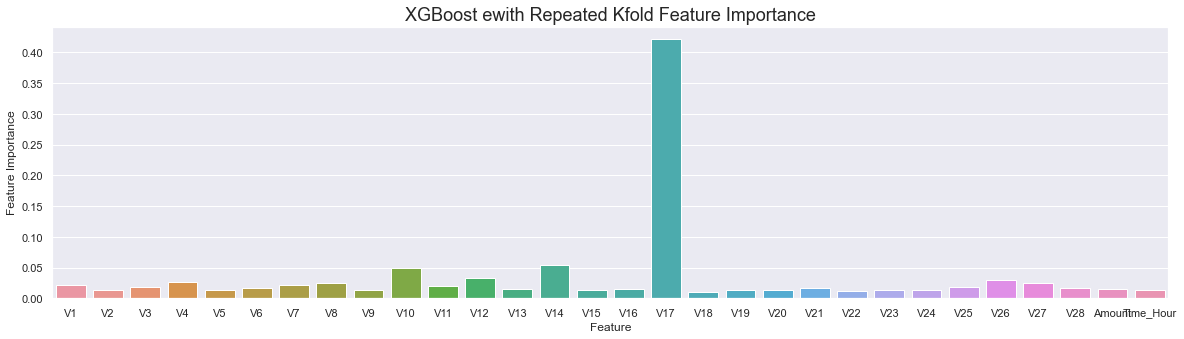

In [56]:
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='Feature Importance',data=coefficient)
plt.title('XGBoost ewith Repeated Kfold Feature Importance',fontsize=18)
plt.show()

In [57]:
df_result

Data_Imbalance_Handling  \
0                Power Transformer   
1                Power Transformer   
2                Power Transformer   
3                Power Transformer   
4                Power Transformer   
5                Power Transformer   
6                Power Transformer   
7                Power Transformer   
8   RepeatedKFold Cross Vadidation   
9   RepeatedKFold Cross Vadidation   
10  RepeatedKFold Cross Vadidation   
11  RepeatedKFold Cross Vadidation   
12  RepeatedKFold Cross Vadidation   
13  RepeatedKFold Cross Vadidation   
14  RepeatedKFold Cross Vadidation   
15  RepeatedKFold Cross Vadidation   

                                         Model  Accuracy  roc_value  threshold  
0   Logistic Regression With L2 Regularisation  0.998999   0.966806   0.001289  
1   Logistic Regression With L1 Regularisation  0.998876   0.974353   0.005983  
2                Tree Model with gini criteria  0.998806   0.859015   1.000000  
3             Tree Model with entropy criteria  0.999052   0.864337   1.000000  
4                                Random Forest  0.999350   0.940564   0.010000  
5                                      XGBoost  0.999456   0.972998   0.000051  
6                                          KNN  0.999298   0.900851   0.200000  
7                                          SVM  0.998560   0.891340   0.000932  
8   Logistic Regression With L2 Regularisation  0.999122   0.989309   0.002884  
9   Logistic Regression With L1 Regularisation  0.999034   0.903209   0.043890  
10               Tree Model with gini criteria  0.999105   0.880514   1.000000  
11            Tree Model with entropy criteria  0.998999   0.885040   1.000000  
12                               Random Forest  0.999403   0.952776   0.020000  
13                                     XGBoost  0.999438   0.988989   0.000182  
14                                         KNN  0.999228   0.875954   0.200000  
15                                         SVM  0.998227   0.463004   0.002848

## Perform Cross Validation with StratifiedKFold

In [58]:
#Let perform StratifiedKFold and check the result
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(x,y):
    print('TRAIN:', train_index, 'TEST:', test_index)
    x_train_SKF_CV,x_test_SKF_CV = x.iloc[train_index], x.iloc[test_index]
    y_train_SKF_CV, y_test_SKF_CV = y.iloc[train_index], y.iloc[test_index]

TRAIN: [ 30473  30496  31002 ... 284804 284805 284806] TEST: [    0     1     2 ... 57017 57018 57019]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 30473  30496  31002 ... 113964 113965 113966]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 81609  82400  83053 ... 170946 170947 170948]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [150654 150660 150661 ... 227866 227867 227868]
TRAIN: [     0      1      2 ... 227866 227867 227868] TEST: [212516 212644 213092 ... 284804 284805 284806]


**Perform the StratifiedKFold in Algorithms**

Logistic Regresstion with L1 & L2 Regularisation
Max auc_roc for l2 :  0.9822696355075367
Max auc_roc for l1 :  0.9469406439407215
Parameters for l2 regularisation
[[ 0.00683406  0.06208253 -0.06741251  0.21901902  0.05430763 -0.0320564
  -0.02291126 -0.11506002 -0.06916672 -0.16379313  0.12825261 -0.19273808
  -0.03669048 -0.36074989  0.00330462 -0.0879169  -0.07246454 -0.00059502
   0.0038794  -0.02839367  0.03822569  0.02345945 -0.01154826 -0.00998682
  -0.0065495   0.0063385  -0.01011998 -0.00165829  0.00040226  0.00183575]]
[-7.45251351]
{1: array([[0.69244973, 0.69421617, 0.71449136, 0.8377004 , 0.95579612,
        0.97136042, 0.9891556 , 0.99473562, 0.99128052, 0.99117568,
        0.99117568, 0.99117568, 0.99117568, 0.99117568, 0.99117568,
        0.99117568, 0.99117568, 0.99117568, 0.99117568, 0.99117568],
       [0.60684336, 0.60850615, 0.62893591, 0.76868135, 0.90894987,
        0.94880348, 0.9603878 , 0.9826413 , 0.98536708, 0.98263662,
        0.98263662, 0.97925771, 0.9792

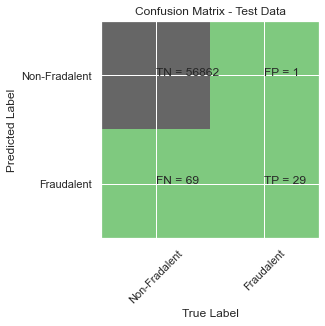

classsification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.30      0.45        98

    accuracy                           1.00     56961
   macro avg       0.98      0.65      0.73     56961
weighted avg       1.00      1.00      1.00     56961

Accuarcy of Logistic Model with L1 regularisation : 0.999280209265989
Confustion Matrix


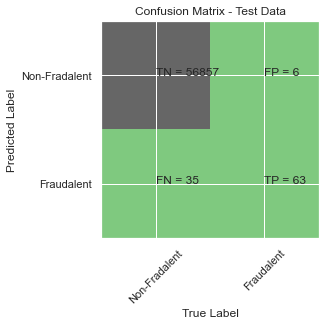

classsification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.91      0.64      0.75        98

    accuracy                           1.00     56961
   macro avg       0.96      0.82      0.88     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9832619539911
l2 threshold: 0.0015874104730520281
ROC for the test dataset 98.3%


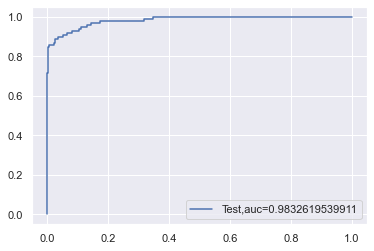

l1 roc_value: 0.9006435805069615
l1 threshold: 0.027904640739128295
ROC for the test dataset 90.1%


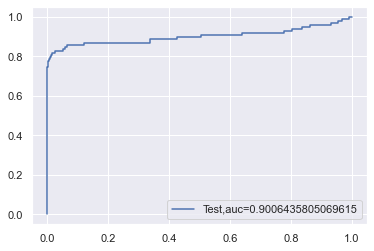

Time Taken by Model: --- 200.98396515846252 second ---
--------------------------------------------------------------------------------
Decision Tree Model with 'gini' & 'entropy' criteria
giniscore: 0.998841312476958
Confusion Matrix


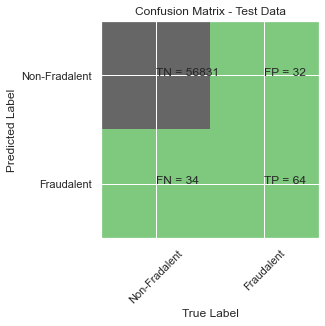

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.67      0.65      0.66        98

    accuracy                           1.00     56961
   macro avg       0.83      0.83      0.83     56961
weighted avg       1.00      1.00      1.00     56961

ginitree_roc_value: 0.8262492341959029
Threshold: 1.0
ROC for the test dataset 82.6%


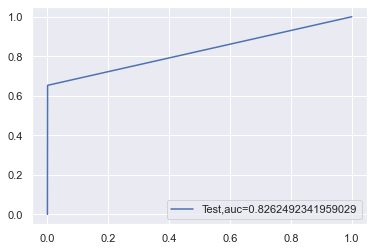

entropyscore: 0.9990168711925703
Confusion Matrix


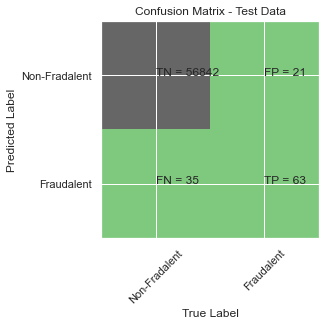

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.75      0.64      0.69        98

    accuracy                           1.00     56961
   macro avg       0.87      0.82      0.85     56961
weighted avg       1.00      1.00      1.00     56961

entropytree_roc_value: 0.8212439170839185
Threshold: 1.0
ROC for the test dataset 82.1%


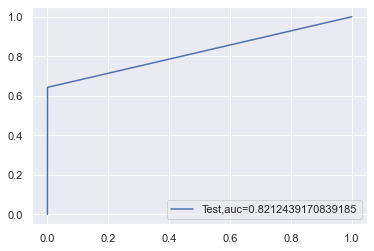

Time Taken by Model: --- 23.21021556854248 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9994382121100402
Confusion Matrix


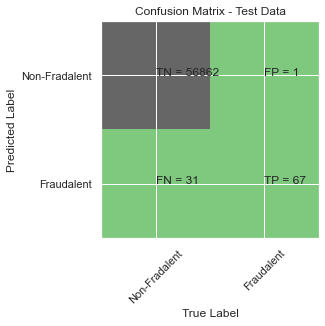

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.68      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.84      0.90     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9464721329855826
Random Forest Threshold: 0.01
ROC of the test dataset 94.6%


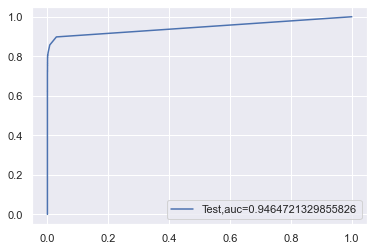

Time Taken by Model: --- 139.29594945907593 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994382121100402
Confusion Matrix


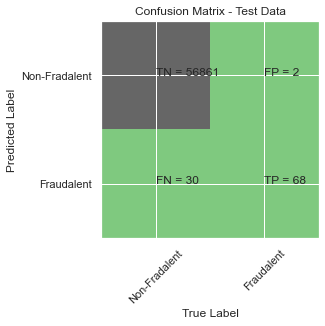

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.69      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.85      0.90     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.9728122049164354
XGBoost threshold: 0.00010038168693426996
ROC for the test dataset 97.3%


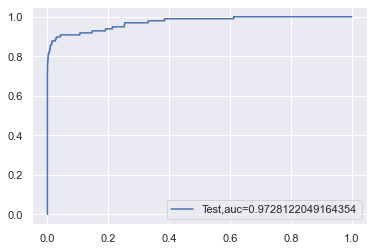

Time Taken by Model: --- 20.01820969581604 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9991924299081828
Confusion Matrix


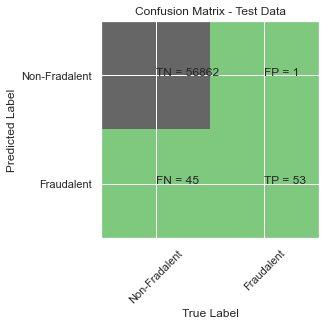

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.98      0.54      0.70        98

    accuracy                           1.00     56961
   macro avg       0.99      0.77      0.85     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8057457828285457
KNN threshold: 0.2
ROC for the test dataset 80.6%


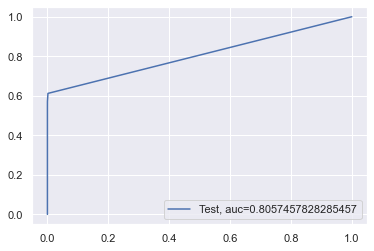

Time Taken by Model: --- 43.781787633895874 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuaracy_score : 0.9982795245869981
confusion matrix


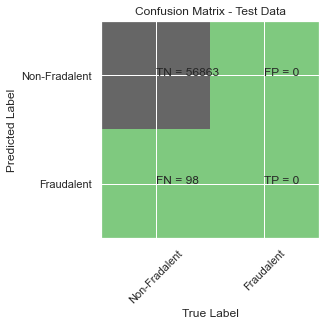

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_values : 0.40177034885494567
SVM threshold: 0.001816592540506064
ROC for the test dataset 40.2%


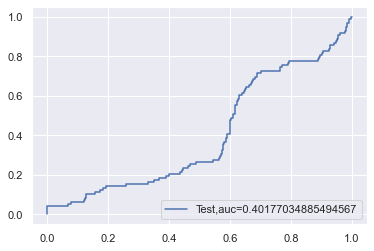

Time Taken by Model: --- 1446.2712135314941 seconds ---


In [59]:
#Run the Logistic Regresstion with L1 & L2 regularization
print('Logistic Regresstion with L1 & L2 Regularisation')
start_time = time.time()
df_result = builtAndRunLogisticRegresstionModels(df_result,'StratifiedKFold Cross Validation',x_train_SKF_CV,y_train_SKF_CV,x_test_SKF_CV,y_test_SKF_CV)
print('Time Taken by Model: --- %s second ---'%(time.time()-start_time))
print('-'*80)
#Run Decision Tre Model with 'gini' & 'entropy' criteria
print("Decision Tree Model with 'gini' & 'entropy' criteria")
start_time = time.time()
df_result = BuildAndRunTreeModels(df_result,'StratifiedKFold Cross Validation',x_train_SKF_CV,y_train_SKF_CV,x_test_SKF_CV,y_test_SKF_CV)
print('Time Taken by Model: --- %s seconds ---'%(time.time() -start_time))
print('-'*80)
#Run Random Forest Model
print('Random Forest Model')
start_time = time.time()
df_result = BulitAndRunRandomForestModels(df_result,'StratifiedKFold Cross Validation',x_train_SKF_CV,y_train_SKF_CV,x_test_SKF_CV,y_test_SKF_CV)
print('Time Taken by Model: --- %s seconds ---'%(time.time() -start_time))
print('-'*80)
#Run XGBoost Model
print('XGBoost Model')
start_time = time.time()
df_result = BuildAndRunXGBoostModel(df_result,'StratifiedKFold Cross Validation',x_train_SKF_CV,y_train_SKF_CV,x_test_SKF_CV,y_test_SKF_CV)
print('Time Taken by Model: --- %s seconds ---'%(time.time() -start_time))
print('-'*80)
#Run KNN Model
print('KNN Model')
start_time = time.time()
df_result = BuildAndRunKNNMOdels(df_result,'StratifiedKFold Cross Validation',x_train_SKF_CV,y_train_SKF_CV,x_test_SKF_CV,y_test_SKF_CV)
print('Time Taken by Model: --- %s seconds ---'%(time.time() -start_time))
print('-'*80)
#Run SVM Model with Signoid Kernel
print('SVM Model with Sigmoid Kernel')
start_time = time.time()
df_result = BuildAndRunSVMModels(df_result,'StratifiedKFold Cross Validation',x_train_SKF_CV,y_train_SKF_CV,x_test_SKF_CV,y_test_SKF_CV)
print('Time Taken by Model: --- %s seconds ---'%(time.time() -start_time))

In [60]:
df_result

Data_Imbalance_Handling  \
0                  Power Transformer   
1                  Power Transformer   
2                  Power Transformer   
3                  Power Transformer   
4                  Power Transformer   
5                  Power Transformer   
6                  Power Transformer   
7                  Power Transformer   
8     RepeatedKFold Cross Vadidation   
9     RepeatedKFold Cross Vadidation   
10    RepeatedKFold Cross Vadidation   
11    RepeatedKFold Cross Vadidation   
12    RepeatedKFold Cross Vadidation   
13    RepeatedKFold Cross Vadidation   
14    RepeatedKFold Cross Vadidation   
15    RepeatedKFold Cross Vadidation   
16  StratifiedKFold Cross Validation   
17  StratifiedKFold Cross Validation   
18  StratifiedKFold Cross Validation   
19  StratifiedKFold Cross Validation   
20  StratifiedKFold Cross Validation   
21  StratifiedKFold Cross Validation   
22  StratifiedKFold Cross Validation   
23  StratifiedKFold Cross Validation   

                                         Model  Accuracy  roc_value  threshold  
0   Logistic Regression With L2 Regularisation  0.998999   0.966806   0.001289  
1   Logistic Regression With L1 Regularisation  0.998876   0.974353   0.005983  
2                Tree Model with gini criteria  0.998806   0.859015   1.000000  
3             Tree Model with entropy criteria  0.999052   0.864337   1.000000  
4                                Random Forest  0.999350   0.940564   0.010000  
5                                      XGBoost  0.999456   0.972998   0.000051  
6                                          KNN  0.999298   0.900851   0.200000  
7                                          SVM  0.998560   0.891340   0.000932  
8   Logistic Regression With L2 Regularisation  0.999122   0.989309   0.002884  
9   Logistic Regression With L1 Regularisation  0.999034   0.903209   0.043890  
10               Tree Model with gini criteria  0.999105   0.880514   1.000000  
11            Tree Model with entropy criteria  0.998999   0.885040   1.000000  
12                               Random Forest  0.999403   0.952776   0.020000  
13                                     XGBoost  0.999438   0.988989   0.000182  
14                                         KNN  0.999228   0.875954   0.200000  
15                                         SVM  0.998227   0.463004   0.002848  
16  Logistic Regression With L2 Regularisation  0.998771   0.983262   0.001587  
17  Logistic Regression With L1 Regularisation  0.999280   0.900644   0.027905  
18               Tree Model with gini criteria  0.998841   0.826249   1.000000  
19            Tree Model with entropy criteria  0.999017   0.821244   1.000000  
20                               Random Forest  0.999438   0.946472   0.010000  
21                                     XGBoost  0.999438   0.972812   0.000100  
22                                         KNN  0.999192   0.805746   0.200000  
23                                         SVM  0.998280   0.401770   0.001817

***As the result show Logistic Regresstion with L2 Regularisation for StratifiedKFold CV provided best results***


****Proceed with the model which shows the best Results****

- Apply the best Hyperparameter on the model Predict on the test dataset

In [61]:
# Logistic Regresstion
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
num_c = list(np.power(10.0, np.arange(-10,10)))
cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

search_cv_l2 = LogisticRegressionCV(
                Cs=num_c,
                penalty='l2',
                scoring='roc_auc',
                cv=cv_num,
                random_state=42,
                max_iter=10000,
                fit_intercept=True,
                solver='newton-cg',
                tol=10
                )
# Searchcv,fit(x_train,y_train)
search_cv_l2.fit(x_train,y_train)
print('Max auc_roc for L2:',search_cv_l2.scores_[1].mean(axis=0).max())

print('Parameters for L2 Regularisation')
print(search_cv_l2.coef_)
print(search_cv_l2.intercept_)
print(search_cv_l2.scores_)


#find the predicted value
y_pred_L2 = search_cv_l2.predict(x_test)

#Find the prob
y_pred_L2_prob = search_cv_l2.predict_proba(x_test)[:,1]

#Accuracy of L2/L1 models
Accuracy_L2 = accuracy_score(y_pred_L2,y_test)

print('Accuracy of Logistic model with L2 regularisation : {0}'.format(accuracy_score))

from sklearn.metrics import roc_auc_score
roc_value_L2 = roc_auc_score(y_test, y_pred_L2_prob)
print('L2 roc value: {0}'.format(roc_value_L2))
fpr, tpr, threshold = roc_curve(y_test,y_pred_L2_prob)
threshold = threshold[np.argmax(tpr - fpr)]
print('L2 threshold: {0}'.format(threshold))


Max auc_roc for L2: 0.9860331153066897
Parameters for L2 Regularisation
[[ 2.10516326e-02  3.25019176e-02 -8.93448568e-02  2.36484655e-01
   8.31166684e-02 -4.89470151e-02 -3.27160903e-02 -1.07977709e-01
  -9.19009136e-02 -1.74628208e-01  1.35394685e-01 -2.07794275e-01
  -4.28599838e-02 -3.77127926e-01 -1.08035897e-02 -1.04452549e-01
  -1.14476075e-01 -8.58949461e-03  1.49127335e-02 -5.62555859e-03
   3.94051084e-02  2.42537881e-02  1.93298030e-03 -1.56901032e-02
  -7.89537900e-03  5.15011199e-03 -3.31309288e-03 -2.23179247e-04
   3.02734266e-04  3.76054157e-03]]
[-7.48179584]
{1: array([[0.58216478, 0.58433826, 0.61022218, 0.77826009, 0.94270322,
        0.98595421, 0.99602058, 0.99403881, 0.99428058, 0.99498757,
        0.99498757, 0.99266757, 0.99266757, 0.99266757, 0.99266757,
        0.99266757, 0.99266757, 0.99266757, 0.99266757, 0.99266757],
       [0.56177492, 0.56305993, 0.57993055, 0.72110728, 0.8896894 ,
        0.93974279, 0.96762133, 0.97802812, 0.97951221, 0.98089289,
   

In [62]:
search_cv_l2.coef_

array([[ 2.10516326e-02,  3.25019176e-02, -8.93448568e-02,
         2.36484655e-01,  8.31166684e-02, -4.89470151e-02,
        -3.27160903e-02, -1.07977709e-01, -9.19009136e-02,
        -1.74628208e-01,  1.35394685e-01, -2.07794275e-01,
        -4.28599838e-02, -3.77127926e-01, -1.08035897e-02,
        -1.04452549e-01, -1.14476075e-01, -8.58949461e-03,
         1.49127335e-02, -5.62555859e-03,  3.94051084e-02,
         2.42537881e-02,  1.93298030e-03, -1.56901032e-02,
        -7.89537900e-03,  5.15011199e-03, -3.31309288e-03,
        -2.23179247e-04,  3.02734266e-04,  3.76054157e-03]])

In [63]:
coefficient = pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(search_cv_l2.coef_))],axis=1)
coefficient.columns = ['Feature', 'Important Coefficient']

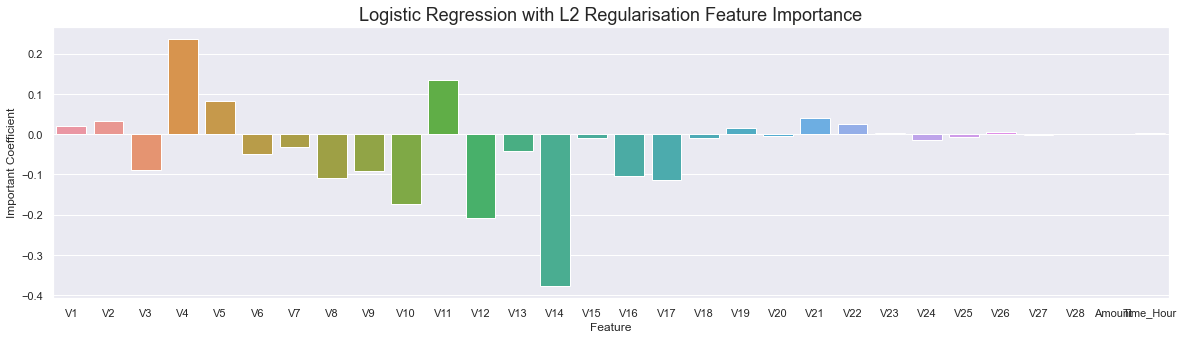

In [64]:
plt.figure(figsize=(20,5))
sns.barplot(x='Feature',y='Important Coefficient',data=coefficient)
plt.title('Logistic Regression with L2 Regularisation Feature Importance',fontsize=18)
plt.show()

***Its is evident that V4,V11,V5 has a positive importance wherease V14,V12,V10 seems to have a negetive impact on the prediction***

# Handling data imbalance

As we see that the data is heavily imbalanced, We will try several approaches for handling data imbalance.

- Undersampling :- Here for balancing the class distribution, the non-fraudulent transctions count will be reduced to 396 (similar count of fraudulent transctions)
- Oversampling :- Here we will make the same count of non-fraudulent transctions as fraudulent transctions.
- SMOTE :- Synthetic minority oversampling technique. It is another oversampling technique, which uses nearest neighbor algorithm to create synthetic data.
- Adasyn:- This is similar to SMOTE with minor changes that the new synthetic data is generated on the region of low density of imbalanced data points.

## UnderSampling Method using RandomUnderSampler

In [65]:
#UnderSampling

from imblearn.under_sampling import RandomUnderSampler
#Define Oversampler
Ran_US = RandomUnderSampler(sampling_strategy=0.5)
# Fit and apply thr transform
x_under, y_under = Ran_US.fit_resample(x_train,y_train)
#Create DataFrame
x_under = pd.DataFrame(data=x_under,columns=x_train.columns)


Logistic Regresstion with L1 & L2 Regularisation
Max auc_roc for l2 :  0.9830614376394342
Max auc_roc for l1 :  0.9619407705063938
Parameters for l2 regularisation
[[-0.03137018  0.04966711 -0.09848334  0.15556113  0.01779048 -0.03943209
  -0.05655549 -0.01218799 -0.04112755 -0.09914735  0.08999915 -0.12598349
  -0.02242805 -0.19636075 -0.00491082 -0.05599616 -0.06213236 -0.00070196
  -0.0040061   0.00693406  0.01487732  0.00134107  0.00348126 -0.00743665
   0.0061501  -0.00110476  0.00825337  0.00468772  0.00084881 -0.00938912]]
[-2.1240302]
{1: array([[0.56730769, 0.56858974, 0.57788462, 0.64519231, 0.83108974,
        0.9224359 , 0.96025641, 0.98141026, 0.98910256, 0.98910256,
        0.98910256, 0.98910256, 0.98910256, 0.98910256, 0.98910256,
        0.98910256, 0.98910256, 0.98910256, 0.98910256, 0.98910256],
       [0.47465887, 0.47595841, 0.48960364, 0.59324237, 0.79207277,
        0.89051332, 0.93404808, 0.95808967, 0.96166342, 0.95938921,
        0.95938921, 0.96003899, 0.9600

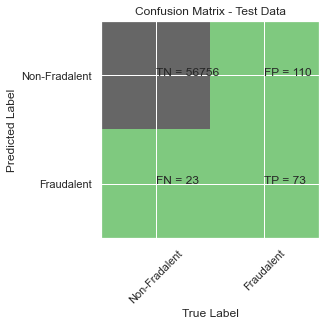

classsification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.40      0.76      0.52        96

    accuracy                           1.00     56962
   macro avg       0.70      0.88      0.76     56962
weighted avg       1.00      1.00      1.00     56962

Accuarcy of Logistic Model with L1 regularisation : 0.9986833327481479
Confustion Matrix


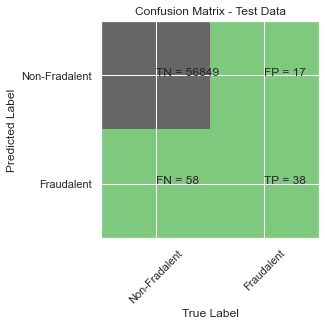

classsification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.69      0.40      0.50        96

    accuracy                           1.00     56962
   macro avg       0.84      0.70      0.75     56962
weighted avg       1.00      1.00      1.00     56962

l2 roc_value: 0.9689236538529173
l2 threshold: 0.15309443562181513
ROC for the test dataset 96.9%


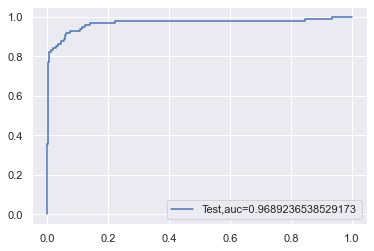

l1 roc_value: 0.8421149427308644
l1 threshold: 0.06247695162852633
ROC for the test dataset 84.2%


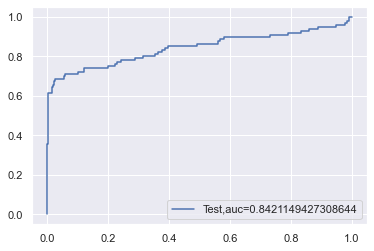

Time Taken by Model: --- 14.427906513214111 second ---
--------------------------------------------------------------------------------
Decision Tree Model with 'gini' & 'entropy' criteria
giniscore: 0.9248095221375654
Confusion Matrix


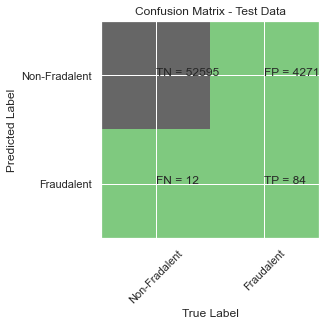

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     56866
           1       0.02      0.88      0.04        96

    accuracy                           0.92     56962
   macro avg       0.51      0.90      0.50     56962
weighted avg       1.00      0.92      0.96     56962

ginitree_roc_value: 0.8999468047691063
Threshold: 1.0
ROC for the test dataset 90.0%


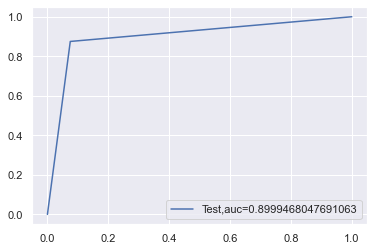

entropyscore: 0.9368877497278888
Confusion Matrix


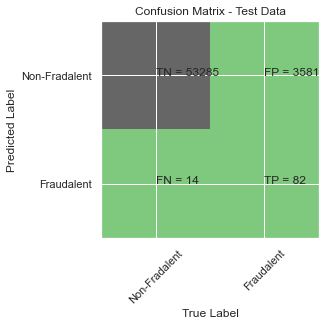

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     56866
           1       0.02      0.85      0.04        96

    accuracy                           0.94     56962
   macro avg       0.51      0.90      0.51     56962
weighted avg       1.00      0.94      0.97     56962

entropytree_roc_value: 0.8955970322043634
Threshold: 1.0
ROC for the test dataset 89.6%


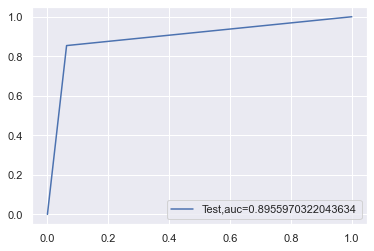

Time Taken by Model: --- 0.6614923477172852 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9886415505073558
Confusion Matrix


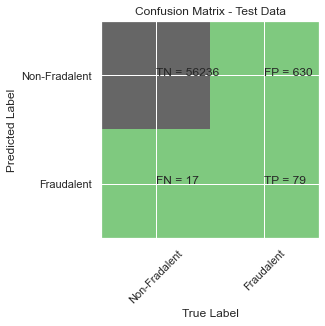

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56866
           1       0.11      0.82      0.20        96

    accuracy                           0.99     56962
   macro avg       0.56      0.91      0.60     56962
weighted avg       1.00      0.99      0.99     56962

Random Forest roc_value: 0.9780242697745577
Random Forest Threshold: 0.37
ROC of the test dataset 97.8%


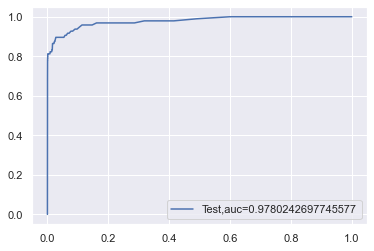

Time Taken by Model: --- 1.669734001159668 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9830062146694287
Confusion Matrix


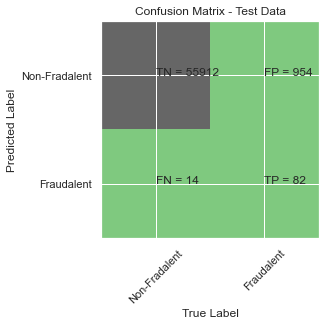

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.08      0.85      0.14        96

    accuracy                           0.98     56962
   macro avg       0.54      0.92      0.57     56962
weighted avg       1.00      0.98      0.99     56962

XGBoost roc_value: 0.9842724196649434
XGBoost threshold: 0.045692551881074905
ROC for the test dataset 98.4%


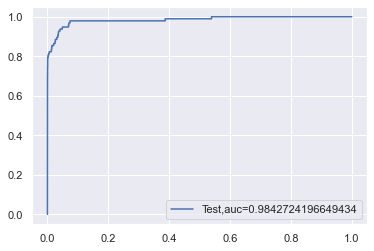

Time Taken by Model: --- 0.5206077098846436 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9751764334117482
Confusion Matrix


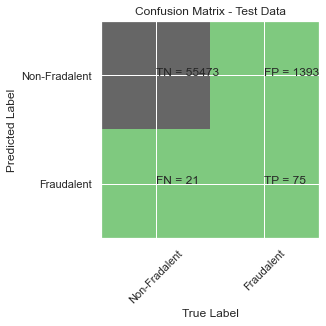

classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.05      0.78      0.10        96

    accuracy                           0.98     56962
   macro avg       0.53      0.88      0.54     56962
weighted avg       1.00      0.98      0.99     56962

KNN roc_value: 0.9492821757875238
KNN threshold: 0.4
ROC for the test dataset 94.9%


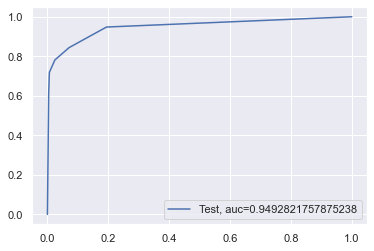

Time Taken by Model: --- 3.4608819484710693 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuaracy_score : 0.8121379165057406
confusion matrix


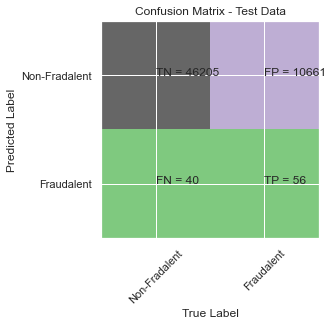

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.81      0.90     56866
           1       0.01      0.58      0.01        96

    accuracy                           0.81     56962
   macro avg       0.50      0.70      0.45     56962
weighted avg       1.00      0.81      0.89     56962

SVM roc_values : 0.30546427126929976
SVM threshold: 0.30364083166649875
ROC for the test dataset 30.5%


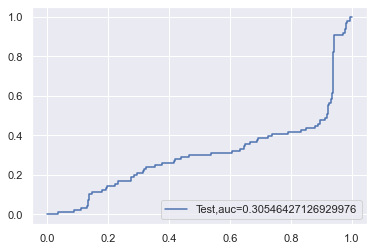

Time Taken by Model: --- 2.3224363327026367 seconds ---


In [66]:
#Run the Logistic Regresstion with L1 & L2 regularization
print('Logistic Regresstion with L1 & L2 Regularisation')
start_time = time.time()
df_result = builtAndRunLogisticRegresstionModels(df_result,'Random Undersampling',x_under,y_under,x_test,y_test)
print('Time Taken by Model: --- %s second ---'%(time.time()-start_time))
print('-'*80)
#Run Decision Tre Model with 'gini' & 'entropy' criteria
print("Decision Tree Model with 'gini' & 'entropy' criteria")
start_time = time.time()
df_result = BuildAndRunTreeModels(df_result,'Random Undersampling',x_under,y_under,x_test,y_test)
print('Time Taken by Model: --- %s seconds ---'%(time.time() -start_time))
print('-'*80)
#Run Random Forest Model
print('Random Forest Model')
start_time = time.time()
df_result = BulitAndRunRandomForestModels(df_result,'Random Undersampling',x_under,y_under,x_test,y_test)
print('Time Taken by Model: --- %s seconds ---'%(time.time() -start_time))
print('-'*80)
#Run XGBoost Model
print('XGBoost Model')
start_time = time.time()
df_result = BuildAndRunXGBoostModel(df_result,'Random Undersampling',x_under,y_under,x_test,y_test)
print('Time Taken by Model: --- %s seconds ---'%(time.time() -start_time))
print('-'*80)
#Run KNN Model
print('KNN Model')
start_time = time.time()
df_result = BuildAndRunKNNMOdels(df_result,'Random Undersampling',x_under,y_under,x_test,y_test)
print('Time Taken by Model: --- %s seconds ---'%(time.time() -start_time))
print('-'*80)
#Run SVM Model with Signoid Kernel
print('SVM Model with Sigmoid Kernel')
start_time = time.time()
df_result = BuildAndRunSVMModels(df_result,'Random Undersampling',x_under,y_under,x_test,y_test)
print('Time Taken by Model: --- %s seconds ---'%(time.time() -start_time))

In [67]:
df_result

Data_Imbalance_Handling  \
0                  Power Transformer   
1                  Power Transformer   
2                  Power Transformer   
3                  Power Transformer   
4                  Power Transformer   
5                  Power Transformer   
6                  Power Transformer   
7                  Power Transformer   
8     RepeatedKFold Cross Vadidation   
9     RepeatedKFold Cross Vadidation   
10    RepeatedKFold Cross Vadidation   
11    RepeatedKFold Cross Vadidation   
12    RepeatedKFold Cross Vadidation   
13    RepeatedKFold Cross Vadidation   
14    RepeatedKFold Cross Vadidation   
15    RepeatedKFold Cross Vadidation   
16  StratifiedKFold Cross Validation   
17  StratifiedKFold Cross Validation   
18  StratifiedKFold Cross Validation   
19  StratifiedKFold Cross Validation   
20  StratifiedKFold Cross Validation   
21  StratifiedKFold Cross Validation   
22  StratifiedKFold Cross Validation   
23  StratifiedKFold Cross Validation   
24              Random Undersampling   
25              Random Undersampling   
26              Random Undersampling   
27              Random Undersampling   
28              Random Undersampling   
29              Random Undersampling   
30              Random Undersampling   
31              Random Undersampling   

                                         Model  Accuracy  roc_value  threshold  
0   Logistic Regression With L2 Regularisation  0.998999   0.966806   0.001289  
1   Logistic Regression With L1 Regularisation  0.998876   0.974353   0.005983  
2                Tree Model with gini criteria  0.998806   0.859015   1.000000  
3             Tree Model with entropy criteria  0.999052   0.864337   1.000000  
4                                Random Forest  0.999350   0.940564   0.010000  
5                                      XGBoost  0.999456   0.972998   0.000051  
6                                          KNN  0.999298   0.900851   0.200000  
7                                          SVM  0.998560   0.891340   0.000932  
8   Logistic Regression With L2 Regularisation  0.999122   0.989309   0.002884  
9   Logistic Regression With L1 Regularisation  0.999034   0.903209   0.043890  
10               Tree Model with gini criteria  0.999105   0.880514   1.000000  
11            Tree Model with entropy criteria  0.998999   0.885040   1.000000  
12                               Random Forest  0.999403   0.952776   0.020000  
13                                     XGBoost  0.999438   0.988989   0.000182  
14                                         KNN  0.999228   0.875954   0.200000  
15                                         SVM  0.998227   0.463004   0.002848  
16  Logistic Regression With L2 Regularisation  0.998771   0.983262   0.001587  
17  Logistic Regression With L1 Regularisation  0.999280   0.900644   0.027905  
18               Tree Model with gini criteria  0.998841   0.826249   1.000000  
19            Tree Model with entropy criteria  0.999017   0.821244   1.000000  
20                               Random Forest  0.999438   0.946472   0.010000  
21                                     XGBoost  0.999438   0.972812   0.000100  
22                                         KNN  0.999192   0.805746   0.200000  
23                                         SVM  0.998280   0.401770   0.001817  
24  Logistic Regression With L2 Regularisation  0.997665   0.968924   0.153094  
25  Logistic Regression With L1 Regularisation  0.998683   0.842115   0.062477  
26               Tree Model with gini criteria  0.924810   0.899947   1.000000  
27            Tree Model with entropy criteria  0.936888   0.895597   1.000000  
28                               Random Forest  0.988642   0.978024   0.370000  
29                                     XGBoost  0.983006   0.984272   0.045693  
30                                         KNN  0.975176   0.949282   0.400000  
31                                         SVM  0.812138   0.305464   0.303641

***It seems Undersamling has improved the XGBoost Result***

## Oversampling with RandomOverSampler and stratifiedKFold Cross Validation

**Now apply the Random Oversampling Method to handle the class imbalance and with the StratifiedKFold Cross Validation**


- First we will display class distibution with and without the Random Oversampling.


- Then We will use the oversampled with StratifiedKFold cross validation method to generate Train And test datasets.





Once we get the train and test dataset we will feed the data to below models

1. Logistic Regression with L2 Regularisation


2. Logistic Regression with L1 Regularisation


3. KNN


4. Decision tree model with Gini criteria


5. Decision tree model with Entropy criteria


6. Random Forest


7. XGBoost


8. We did try SVM (support vector Machine) model , but due to extensive processive power requirement we avoided useing the model.


9. Once we get results for above model, we will compare the results and select model which provided best results for the Random oversampling techinique




In [38]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(x,y),1):
    X_train = x.loc[train_index]
    Y_train = y.loc[train_index]
    X_test = x.loc[test_index]
    Y_test = y.loc[test_index]
    Ran_OS = RandomOverSampler(sampling_strategy=0.5)
    x_over, y_over = Ran_OS.fit_resample(X_train, Y_train)
    
#   Create DataFrame for x_over
x_over = pd.DataFrame(data=x_over , columns=cols)

Logistic Regresstion with L1 & L2 Regularisation
Max auc_roc for l2 :  0.9866172023988213
Max auc_roc for l1 :  0.9619407705063938
Parameters for l2 regularisation
[[ 0.39558434  0.40165747  0.29604367  0.84422125  0.36227157 -0.49809378
  -0.37996144 -0.33741722 -0.24645748 -0.69860577  0.29748729 -0.93686234
  -0.30843328 -0.90745346  0.01205939 -0.53519784 -0.30981417 -0.13990748
   0.13730219 -0.75573735  0.0808424   0.54626095  0.15355256 -0.44115354
   0.21603803 -0.13357633 -0.38895475  0.20636608  0.0057965   0.0425498 ]]
[-5.20709614]
{1: array([[0.63389348, 0.76110314, 0.90593334, 0.95518422, 0.97645127,
        0.98415169, 0.9856767 , 0.98614683, 0.98646149, 0.98657159,
        0.98659096, 0.98659096, 0.98659096, 0.98659096, 0.98659096,
        0.98659096, 0.98659096, 0.98659096, 0.98659096, 0.98659096],
       [0.62839676, 0.75578902, 0.90450134, 0.95578395, 0.97724795,
        0.98458079, 0.98589427, 0.98619463, 0.9864488 , 0.98654596,
        0.98655678, 0.98655678, 0.986

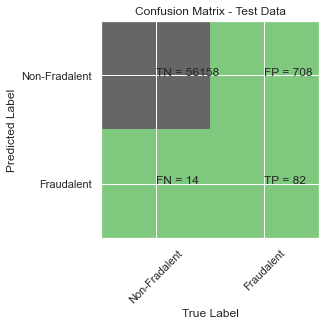

classsification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56866
           1       0.10      0.85      0.19        96

    accuracy                           0.99     56962
   macro avg       0.55      0.92      0.59     56962
weighted avg       1.00      0.99      0.99     56962

Accuarcy of Logistic Model with L1 regularisation : 0.9986833327481479
Confustion Matrix


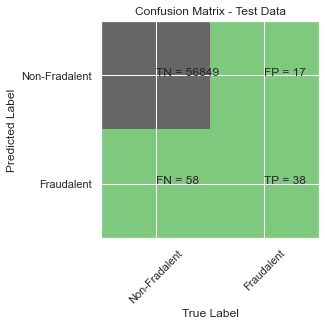

classsification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.69      0.40      0.50        96

    accuracy                           1.00     56962
   macro avg       0.84      0.70      0.75     56962
weighted avg       1.00      1.00      1.00     56962

l2 roc_value: 0.9790617050024033
l2 threshold: 0.21467548385163848
ROC for the test dataset 97.9%


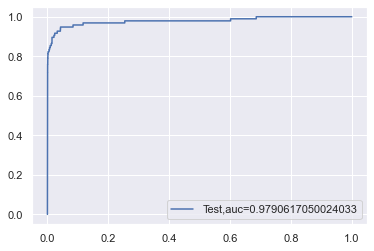

l1 roc_value: 0.8421149427308644
l1 threshold: 0.06247695162852633
ROC for the test dataset 84.2%


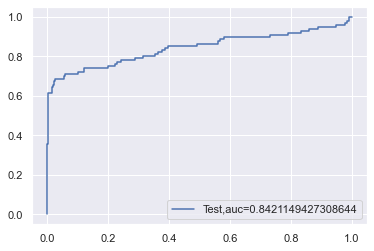

Time Taken by Model: --- 273.81487345695496 second ---
--------------------------------------------------------------------------------
Decision Tree Model with 'gini' & 'entropy' criteria
giniscore: 0.9996664442961974
Confusion Matrix


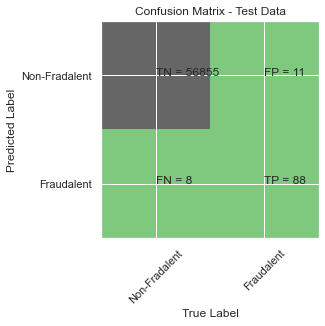

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.89      0.92      0.90        96

    accuracy                           1.00     56962
   macro avg       0.94      0.96      0.95     56962
weighted avg       1.00      1.00      1.00     56962

ginitree_roc_value: 0.9582366147317084
Threshold: 1.0
ROC for the test dataset 95.8%


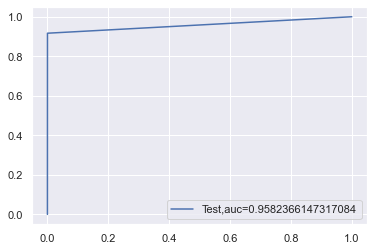

entropyscore: 0.9998419999297777
Confusion Matrix


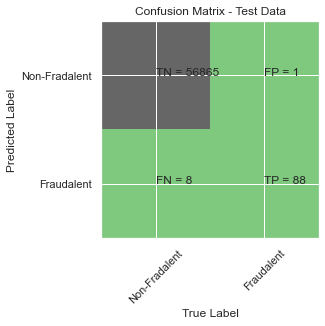

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.99      0.92      0.95        96

    accuracy                           1.00     56962
   macro avg       0.99      0.96      0.98     56962
weighted avg       1.00      1.00      1.00     56962

entropytree_roc_value: 0.9583245407331856
Threshold: 1.0
ROC for the test dataset 95.8%


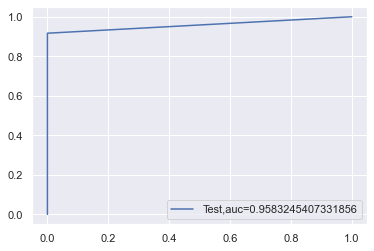

Time Taken by Model: --- 15.946286916732788 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9998946666198518
Confusion Matrix


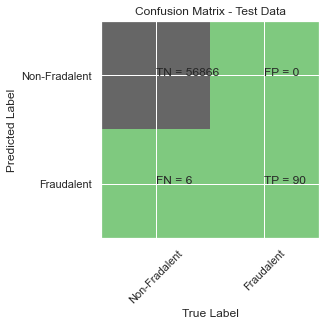

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       1.00      0.94      0.97        96

    accuracy                           1.00     56962
   macro avg       1.00      0.97      0.98     56962
weighted avg       1.00      1.00      1.00     56962

Random Forest roc_value: 0.9840623131572469
Random Forest Threshold: 0.03
ROC of the test dataset 98.4%


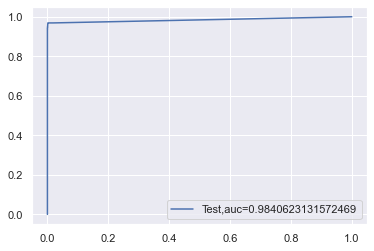

Time Taken by Model: --- 113.56650066375732 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9998946666198518
Confusion Matrix


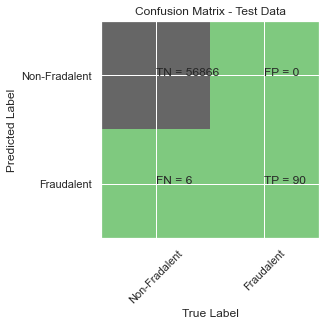

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       1.00      0.94      0.97        96

    accuracy                           1.00     56962
   macro avg       1.00      0.97      0.98     56962
weighted avg       1.00      1.00      1.00     56962

XGBoost roc_value: 0.9987078541366253
XGBoost threshold: 0.002338138408958912
ROC for the test dataset 99.9%


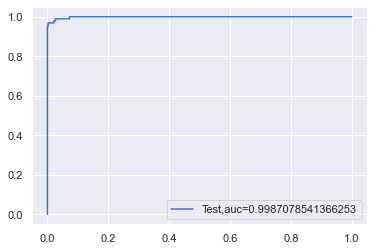

Time Taken by Model: --- 25.56065535545349 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9992099996488887
Confusion Matrix


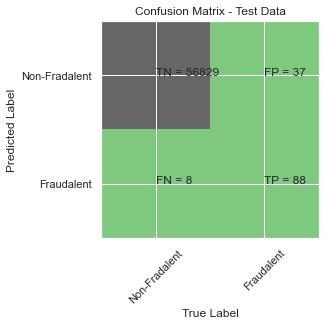

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.70      0.92      0.80        96

    accuracy                           1.00     56962
   macro avg       0.85      0.96      0.90     56962
weighted avg       1.00      1.00      1.00     56962

KNN roc_value: 0.9582681215489044
KNN threshold: 0.8
ROC for the test dataset 95.8%


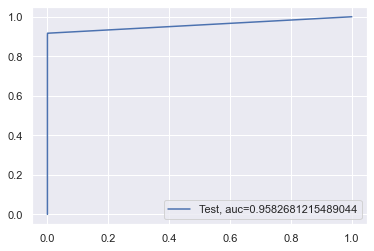

Time Taken by Model: --- 51.050785541534424 seconds ---
--------------------------------------------------------------------------------


In [69]:
#Run the Logistic Regresstion with L1 & L2 regularization
print('Logistic Regresstion with L1 & L2 Regularisation')
start_time = time.time()
df_result = builtAndRunLogisticRegresstionModels(df_result,"Random Oversampling with StratifiedKFold CV",x_over,y_over,x_test,y_test)
print('Time Taken by Model: --- %s second ---'%(time.time()-start_time))
print('-'*80)
#Run Decision Tre Model with 'gini' & 'entropy' criteria
print("Decision Tree Model with 'gini' & 'entropy' criteria")
start_time = time.time()
df_result = BuildAndRunTreeModels(df_result,"Random Oversampling with StratifiedKFold CV",x_over,y_over,x_test,y_test)
print('Time Taken by Model: --- %s seconds ---'%(time.time() -start_time))
print('-'*80)
#Run Random Forest Model
print('Random Forest Model')
start_time = time.time()
df_result = BulitAndRunRandomForestModels(df_result,"Random Oversampling with StratifiedKFold CV",x_over,y_over,x_test,y_test)
print('Time Taken by Model: --- %s seconds ---'%(time.time() -start_time))
print('-'*80)
#Run XGBoost Model
print('XGBoost Model')
start_time = time.time()
df_result = BuildAndRunXGBoostModel(df_result,"Random Oversampling with StratifiedKFold CV",x_over,y_over,x_test,y_test)
print('Time Taken by Model: --- %s seconds ---'%(time.time() -start_time))
print('-'*80)
#Run KNN Model
print('KNN Model')
start_time = time.time()
df_result = BuildAndRunKNNMOdels(df_result,"Random Oversampling with StratifiedKFold CV",x_over,y_over,x_test,y_test)
print('Time Taken by Model: --- %s seconds ---'%(time.time() -start_time))
print('-'*80)
#Run SVM Model with Signoid Kernel
#print('SVM Model with Sigmoid Kernel')
#start_time = time.time()
#df_result = BuildAndRunSVMModels(df_result,"Random Oversampling with StratifiedKFold CV",x_over,y_over,x_test,y_test)
#print('Time Taken by Model: --- %s seconds ---'%(time.time() -start_time))

In [70]:
df_result

Data_Imbalance_Handling  \
0                             Power Transformer   
1                             Power Transformer   
2                             Power Transformer   
3                             Power Transformer   
4                             Power Transformer   
5                             Power Transformer   
6                             Power Transformer   
7                             Power Transformer   
8                RepeatedKFold Cross Vadidation   
9                RepeatedKFold Cross Vadidation   
10               RepeatedKFold Cross Vadidation   
11               RepeatedKFold Cross Vadidation   
12               RepeatedKFold Cross Vadidation   
13               RepeatedKFold Cross Vadidation   
14               RepeatedKFold Cross Vadidation   
15               RepeatedKFold Cross Vadidation   
16             StratifiedKFold Cross Validation   
17             StratifiedKFold Cross Validation   
18             StratifiedKFold Cross Validation   
19             StratifiedKFold Cross Validation   
20             StratifiedKFold Cross Validation   
21             StratifiedKFold Cross Validation   
22             StratifiedKFold Cross Validation   
23             StratifiedKFold Cross Validation   
24                         Random Undersampling   
25                         Random Undersampling   
26                         Random Undersampling   
27                         Random Undersampling   
28                         Random Undersampling   
29                         Random Undersampling   
30                         Random Undersampling   
31                         Random Undersampling   
32  Random Oversampling with StratifiedKFold CV   
33  Random Oversampling with StratifiedKFold CV   
34  Random Oversampling with StratifiedKFold CV   
35  Random Oversampling with StratifiedKFold CV   
36  Random Oversampling with StratifiedKFold CV   
37  Random Oversampling with StratifiedKFold CV   
38  Random Oversampling with StratifiedKFold CV   

                                         Model  Accuracy  roc_value  threshold  
0   Logistic Regression With L2 Regularisation  0.998999   0.966806   0.001289  
1   Logistic Regression With L1 Regularisation  0.998876   0.974353   0.005983  
2                Tree Model with gini criteria  0.998806   0.859015   1.000000  
3             Tree Model with entropy criteria  0.999052   0.864337   1.000000  
4                                Random Forest  0.999350   0.940564   0.010000  
5                                      XGBoost  0.999456   0.972998   0.000051  
6                                          KNN  0.999298   0.900851   0.200000  
7                                          SVM  0.998560   0.891340   0.000932  
8   Logistic Regression With L2 Regularisation  0.999122   0.989309   0.002884  
9   Logistic Regression With L1 Regularisation  0.999034   0.903209   0.043890  
10               Tree Model with gini criteria  0.999105   0.880514   1.000000  
11            Tree Model with entropy criteria  0.998999   0.885040   1.000000  
12                               Random Forest  0.999403   0.952776   0.020000  
13                                     XGBoost  0.999438   0.988989   0.000182  
14                                         KNN  0.999228   0.875954   0.200000  
15                                         SVM  0.998227   0.463004   0.002848  
16  Logistic Regression With L2 Regularisation  0.998771   0.983262   0.001587  
17  Logistic Regression With L1 Regularisation  0.999280   0.900644   0.027905  
18               Tree Model with gini criteria  0.998841   0.826249   1.000000  
19            Tree Model with entropy criteria  0.999017   0.821244   1.000000  
20                               Random Forest  0.999438   0.946472   0.010000  
21                                     XGBoost  0.999438   0.972812   0.000100  
22                                         KNN  0.999192   0.805746   0.200000  
23                                     

***Random Oversampling seems to have +ve change in prediction for XGBoost***
- Looking at Accuracy and ROC value we have XGBoost which has provided best results for SMOTE oversampling technique

Similarly examine others algorithms.

## Oversampling with SMOTE 

**Now apply the SMOTE  Method to handle the class imbalance**

- First we will display class distibution with and without the SMOTE Oversampling.

- Then We will use the oversampled with StratifiedKFold cross validation method to genearte Train And test datasets.

Once we get the train and test dataset we will feed the data to below models

1. Logistic Regression with L2 Regularisation


2. Logistic Regression with L1 Regularisation


3. KNN


4. Decision tree model with Gini criteria


5. Decision tree model with Entropy criteria


6. Random Forest


7. XGBoost


8. We did try SVM (support vector Machine) model , but due to extensive processive power requirement we avoided useing the model.
 
 
9. Once we get results for above model, we will compare the results and select model which provided best results for the SMOTE oversampling techinique

### Print the class distribution after applying SMOTE

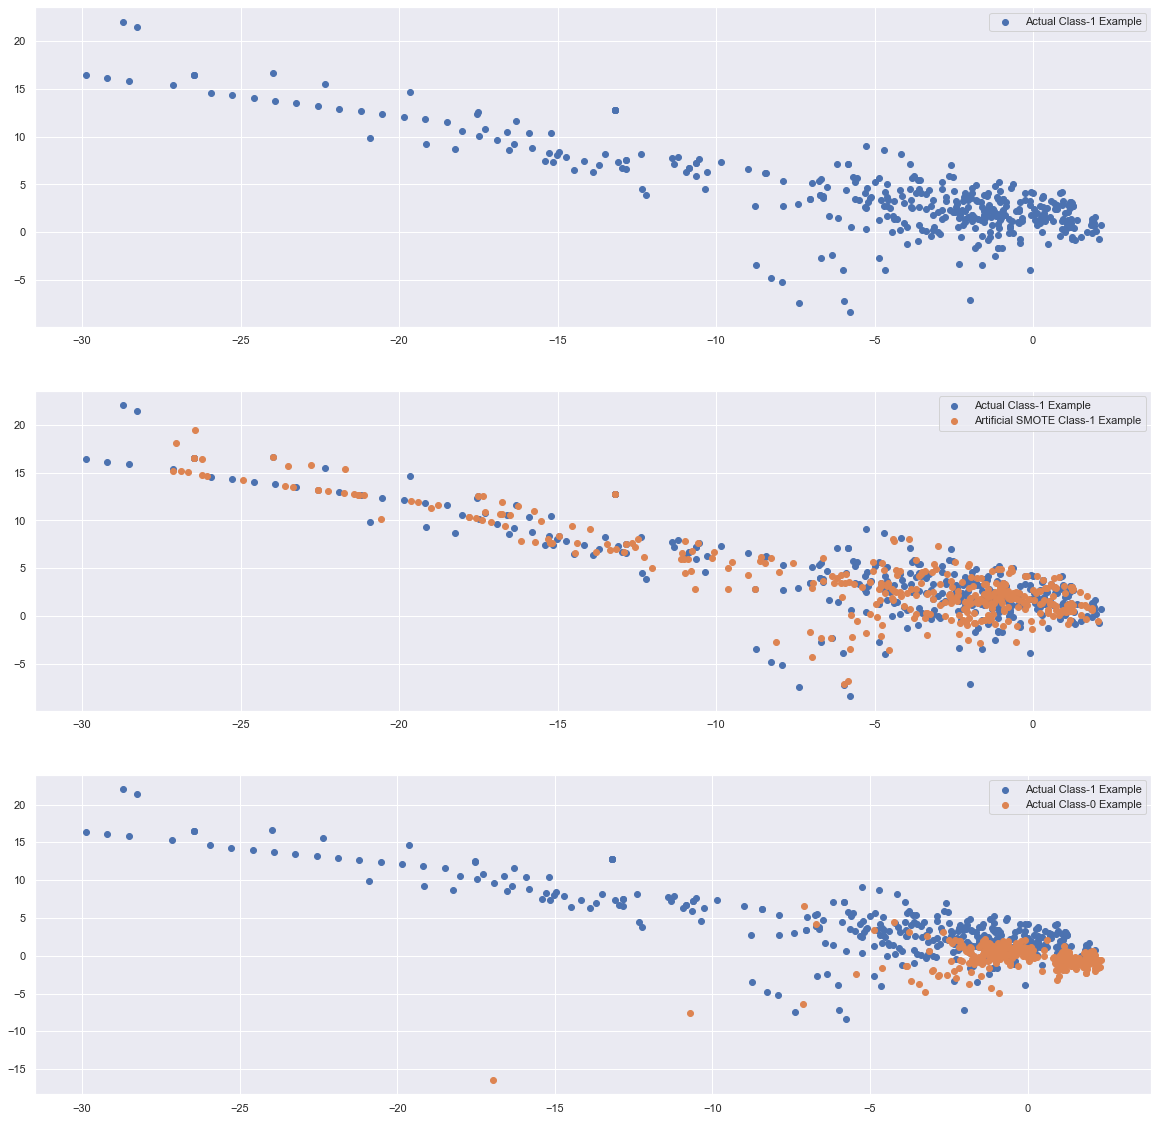

In [71]:
from imblearn import over_sampling
SMOTE = over_sampling.SMOTE(random_state=0)

x_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(x_train,y_train)

# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do

x_train_SMOTE_1 = x_train_SMOTE[x_train.shape[0]:]

x_train_1 = x_train.to_numpy()[np.where(y_train==1.0)]
x_train_0 = x_train.to_numpy()[np.where(y_train==0.0)]

plt.rcParams['figure.figsize'] = [20,20]
fig = plt.figure()

plt.subplot(3,1,1)
plt.scatter(x_train_1[:,0], x_train_1[:,1], label='Actual Class-1 Example')
plt.legend()

plt.subplot(3,1,2)
plt.scatter(x_train_1[:,0], x_train_1[:,1], label='Actual Class-1 Example')
plt.scatter(x_train_SMOTE_1.iloc[:x_train_1.shape[0], 0], x_train_SMOTE_1.iloc[:x_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Example')
plt.legend()

plt.subplot(3,1,3)
plt.scatter(x_train_1[:,0],x_train_1[:, 1], label='Actual Class-1 Example')
plt.scatter(x_train_0[:x_train_1.shape[0],0],x_train_0[:x_train_1.shape[0],1],label='Actual Class-0 Example')
plt.legend()


#Create DataFrame
x_train_smote = pd.DataFrame(data=x_train_SMOTE,columns=cols)


In [72]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(x,y), 1):
    x_train = x.loc[train_index]
    y_train = y.loc[train_index]
    x_test = x.loc[test_index]
    y_test = y.loc[test_index]
    SMOTE = over_sampling.SMOTE(random_state=0)
    x_train_smote, y_train_smote = SMOTE.fit_resample(x_train, y_train)

    # Create DataFrame for x_over
x_train_smote = pd.DataFrame(data=x_train_smote,columns=cols)

In [73]:
x_train_smote.shape


(454904, 30)

In [74]:
y_train_smote.shape

(454904,)

Logistic Regresstion with L1 & L2 Regularisation
Max auc_roc for l2 :  0.9930145390697385
Max auc_roc for l1 :  0.9469406439407215
Parameters for l2 regularisation
[[ 0.77294647  0.7098298   0.68882641  0.93843334  0.49727908 -0.93748974
  -0.69726747 -0.50695843 -0.42323372 -0.92058889  0.61731132 -1.25030776
  -0.23830025 -1.52829534  0.12545953 -0.78246695 -0.84425536 -0.43406573
   0.22176177 -1.08383801 -0.02374501  0.56519933  0.40558106 -0.91679474
   0.50616189  0.03376056 -0.18238476  0.84851433  0.00904109  0.01100835]]
[-5.30053678]
{1: array([[0.64927751, 0.78559745, 0.91748425, 0.96520455, 0.98466299,
        0.98956394, 0.99070011, 0.99160716, 0.99196141, 0.99205777,
        0.99206849, 0.99206849, 0.99206849, 0.99206849, 0.99206849,
        0.99206849, 0.99206849, 0.99206849, 0.99206849, 0.99206849],
       [0.6460276 , 0.7845671 , 0.91904908, 0.96766046, 0.98636753,
        0.99079354, 0.99182711, 0.99273086, 0.9931142 , 0.9932078 ,
        0.99322175, 0.99322175, 0.993

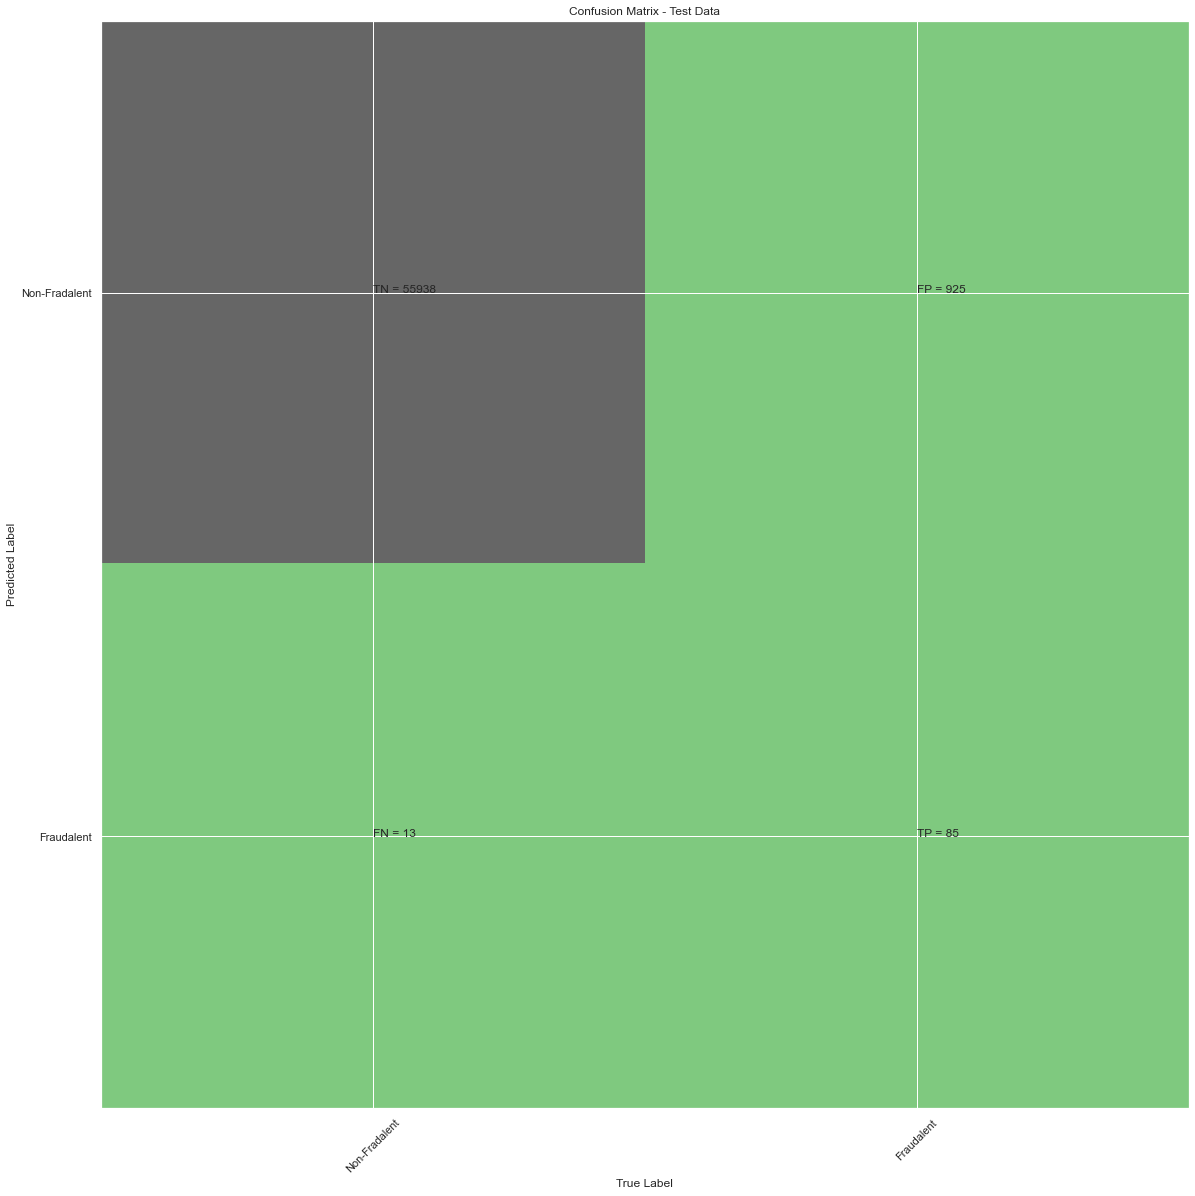

classsification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56863
           1       0.08      0.87      0.15        98

    accuracy                           0.98     56961
   macro avg       0.54      0.93      0.57     56961
weighted avg       1.00      0.98      0.99     56961

Accuarcy of Logistic Model with L1 regularisation : 0.999280209265989
Confustion Matrix


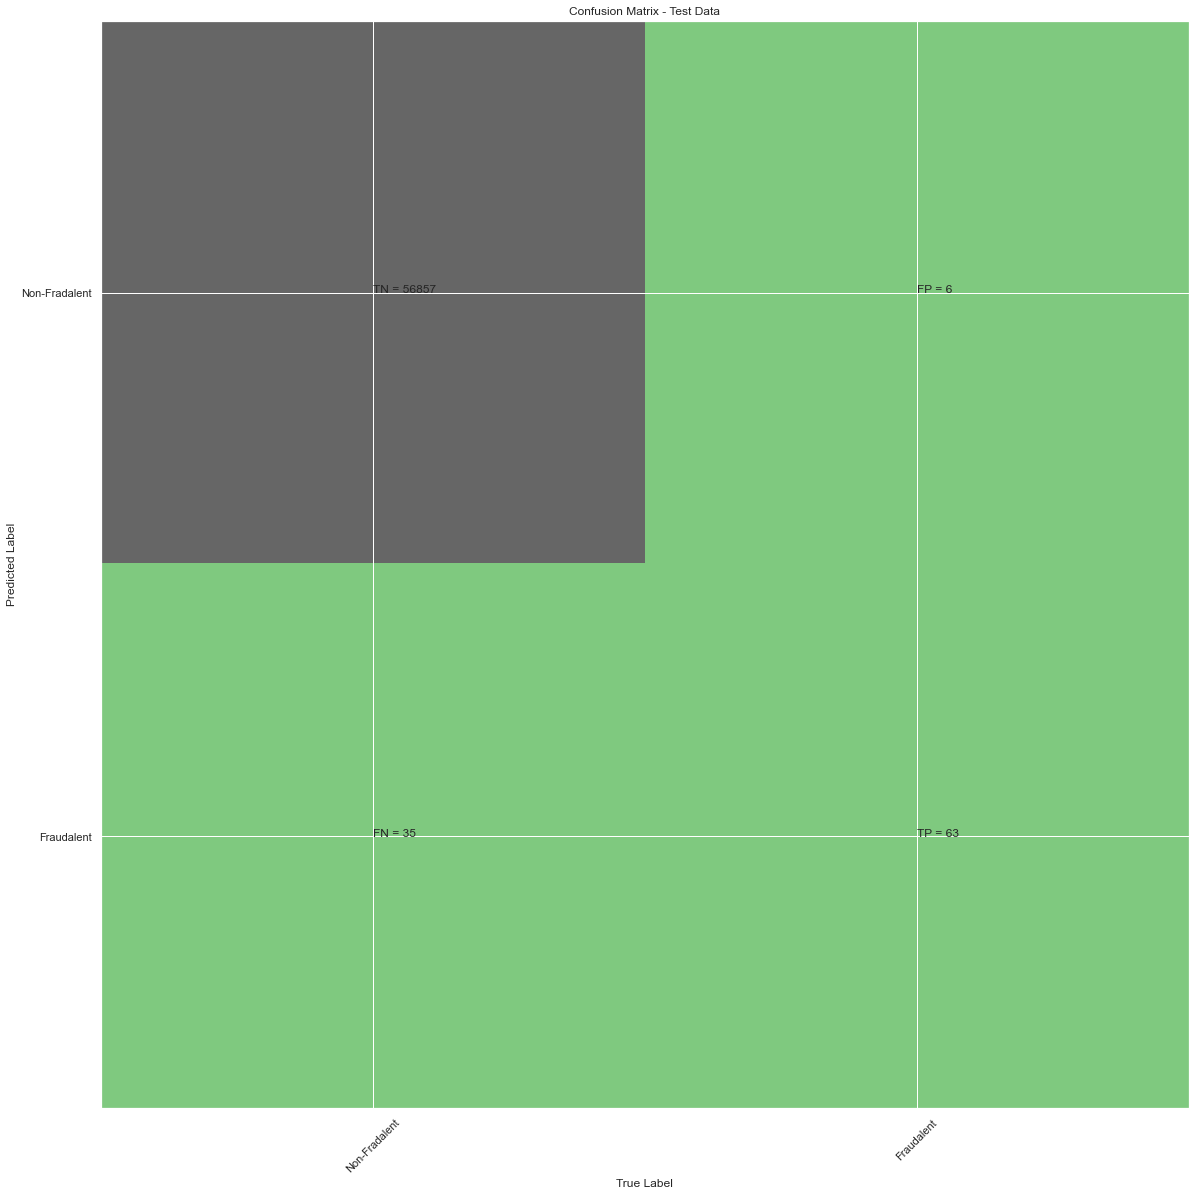

classsification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.91      0.64      0.75        98

    accuracy                           1.00     56961
   macro avg       0.96      0.82      0.88     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.974585801821564
l2 threshold: 0.3939058857455617
ROC for the test dataset 97.5%


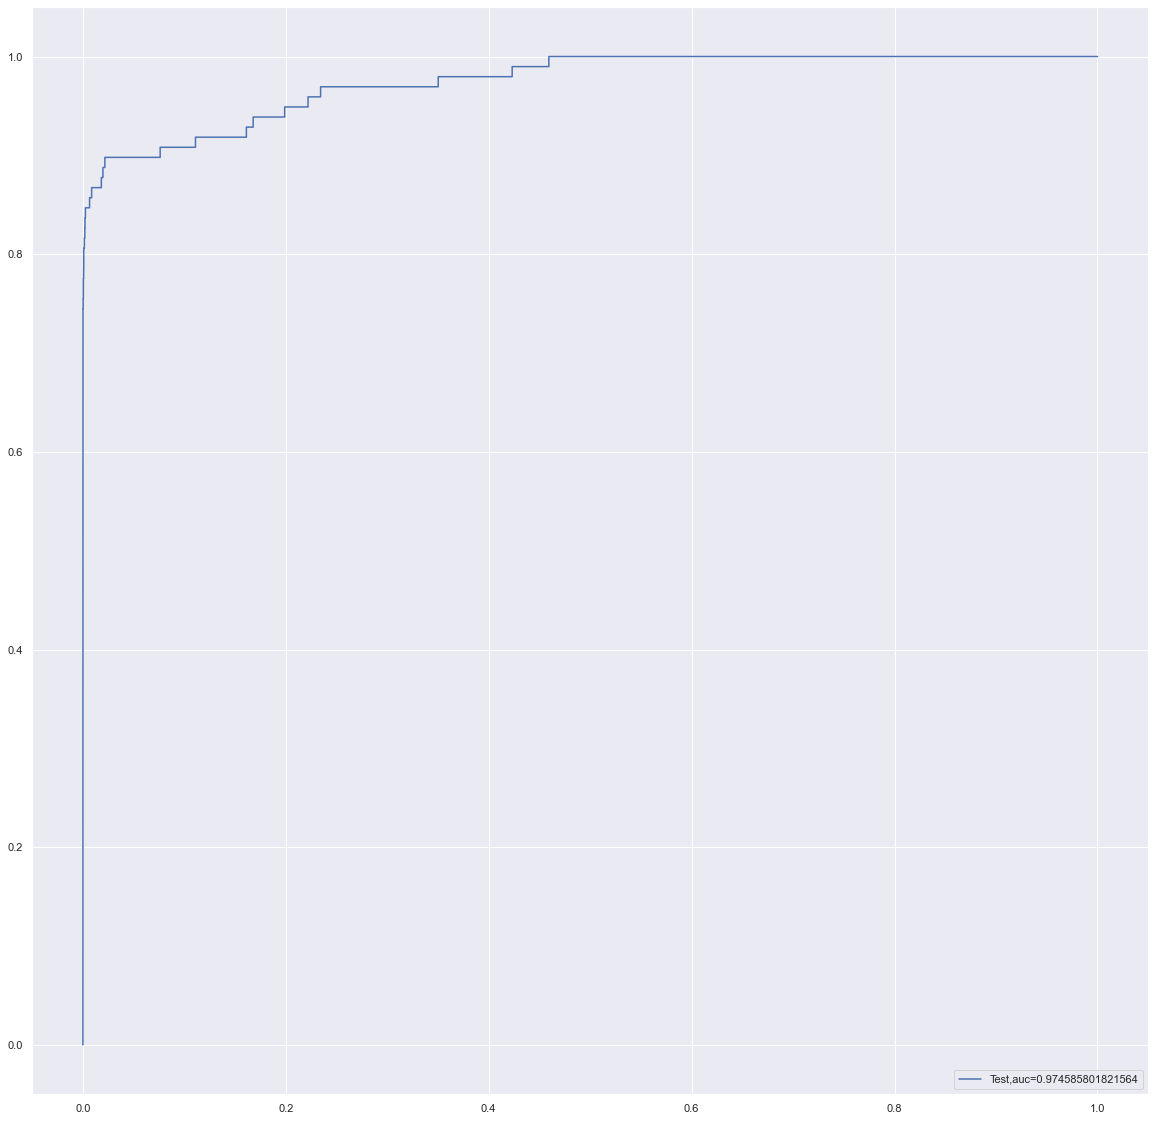

l1 roc_value: 0.9006435805069615
l1 threshold: 0.027904640739128295
ROC for the test dataset 90.1%


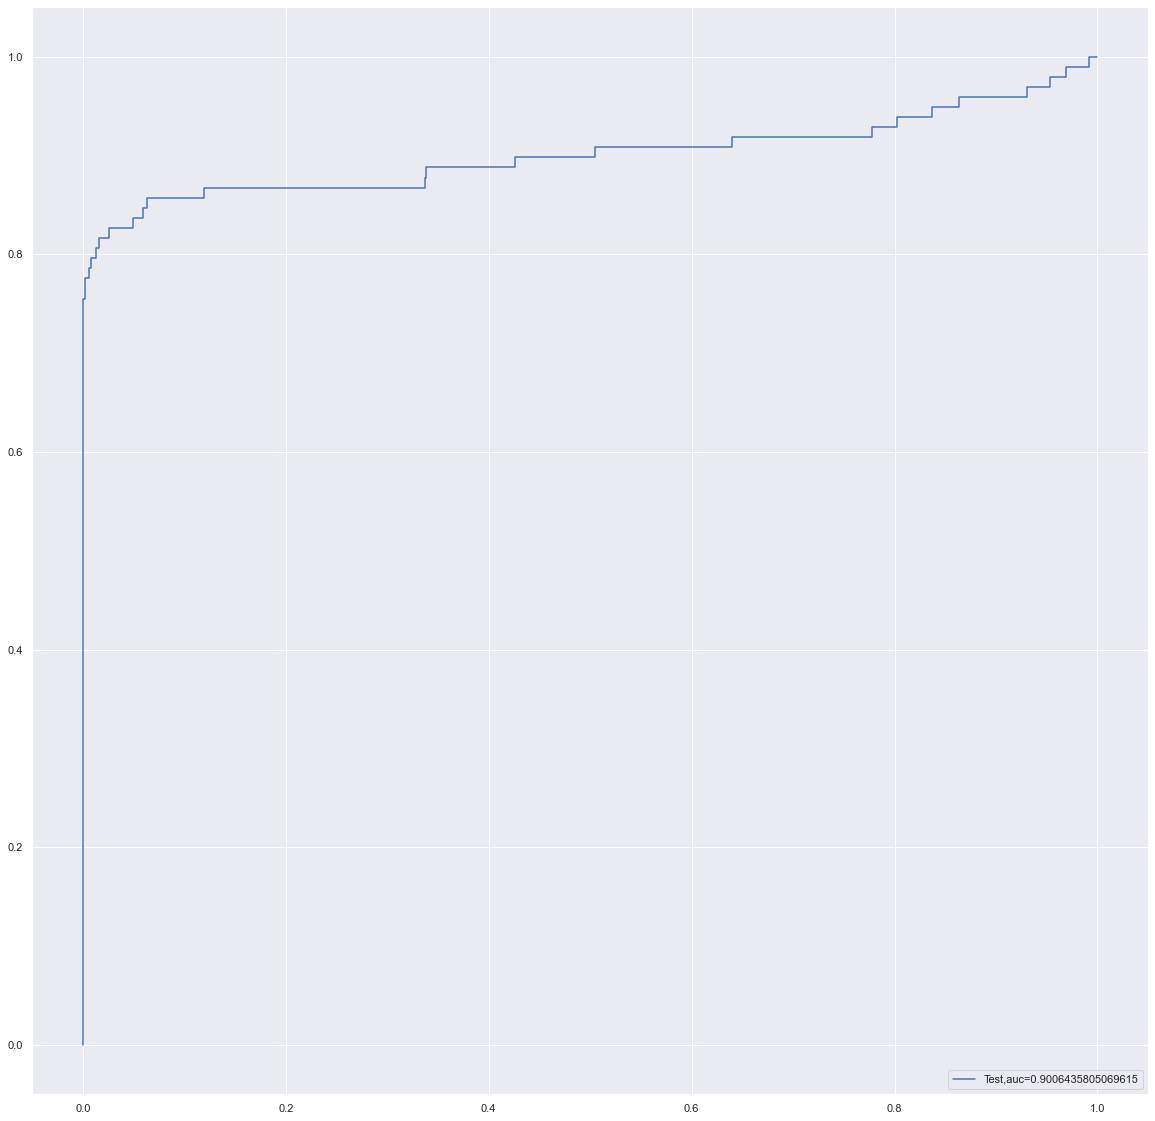

Time Taken by Model: --- 511.28721928596497 second ---
--------------------------------------------------------------------------------
Decision Tree Model with 'gini' & 'entropy' criteria
giniscore: 0.9977528484401608
Confusion Matrix


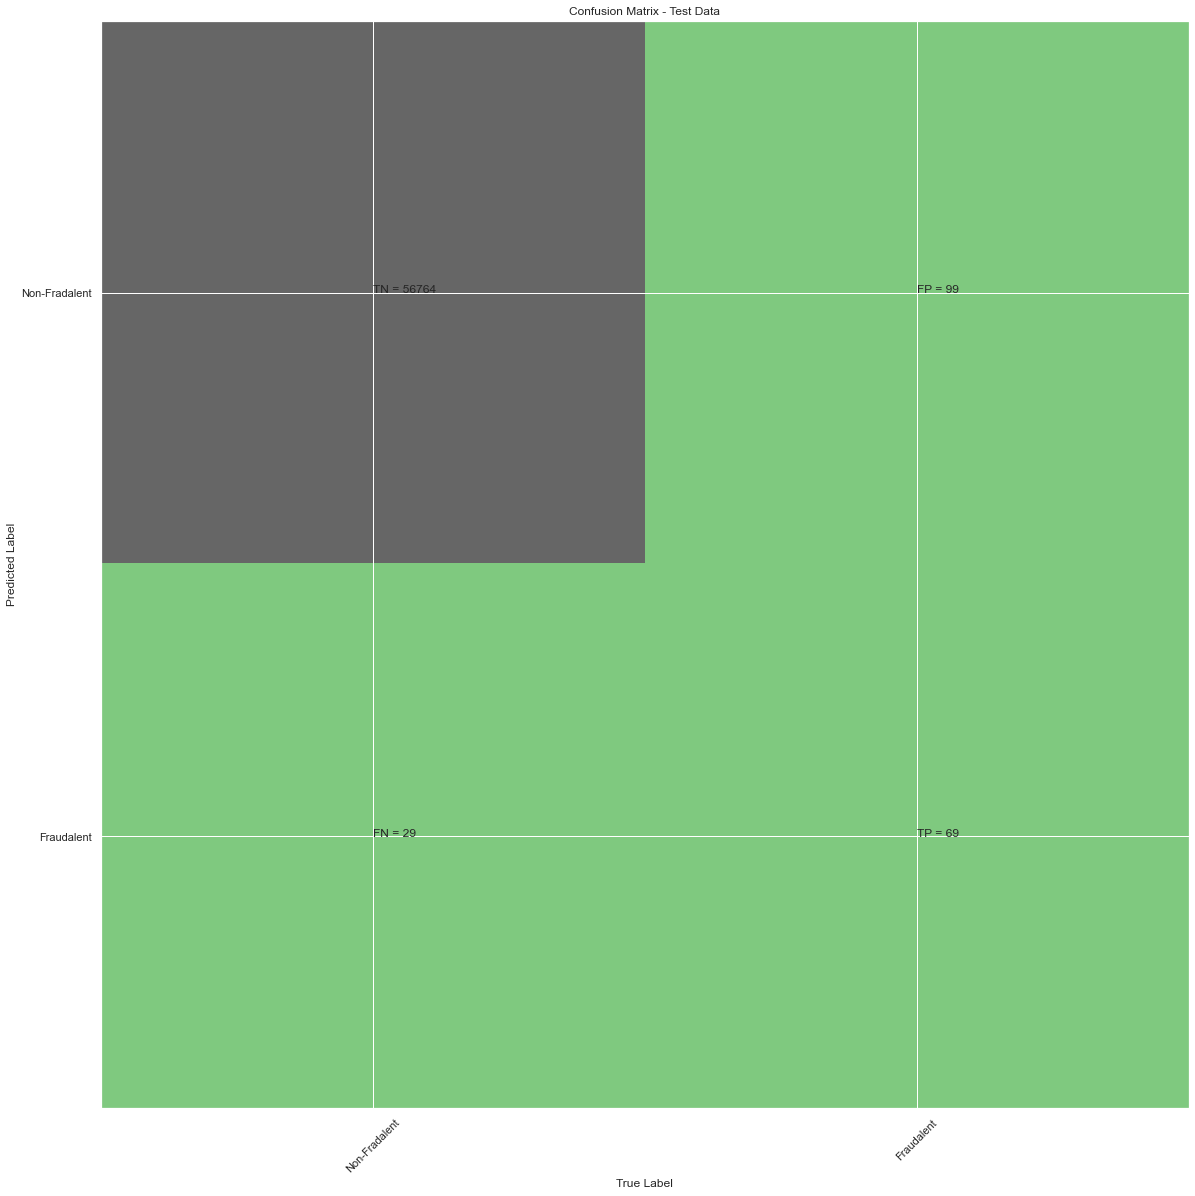

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.41      0.70      0.52        98

    accuracy                           1.00     56961
   macro avg       0.71      0.85      0.76     56961
weighted avg       1.00      1.00      1.00     56961

ginitree_roc_value: 0.8511703029874526
Threshold: 1.0
ROC for the test dataset 85.1%


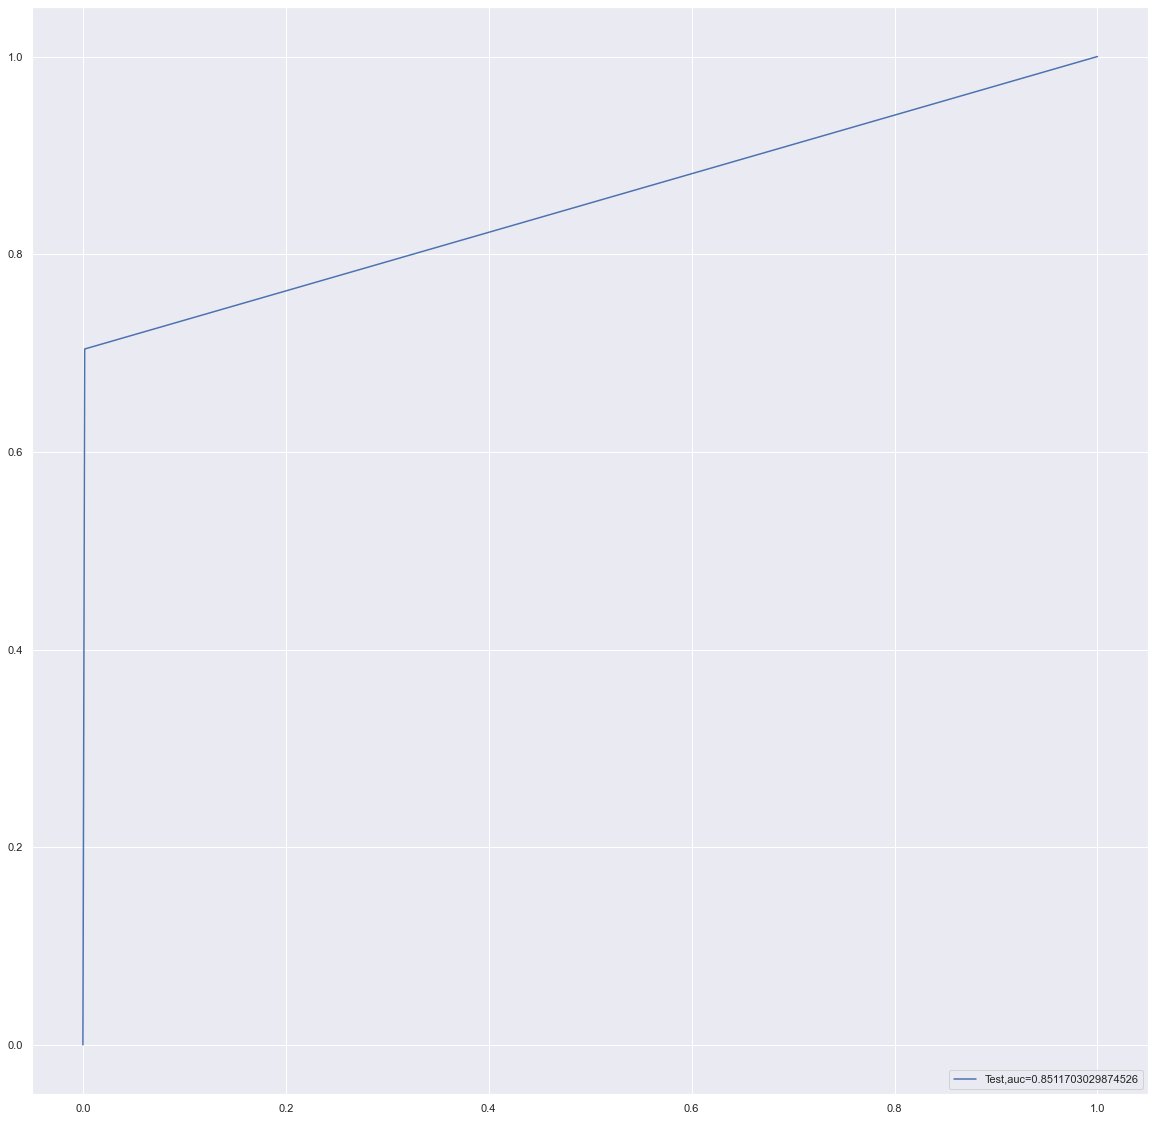

entropyscore: 0.9969803900914661
Confusion Matrix


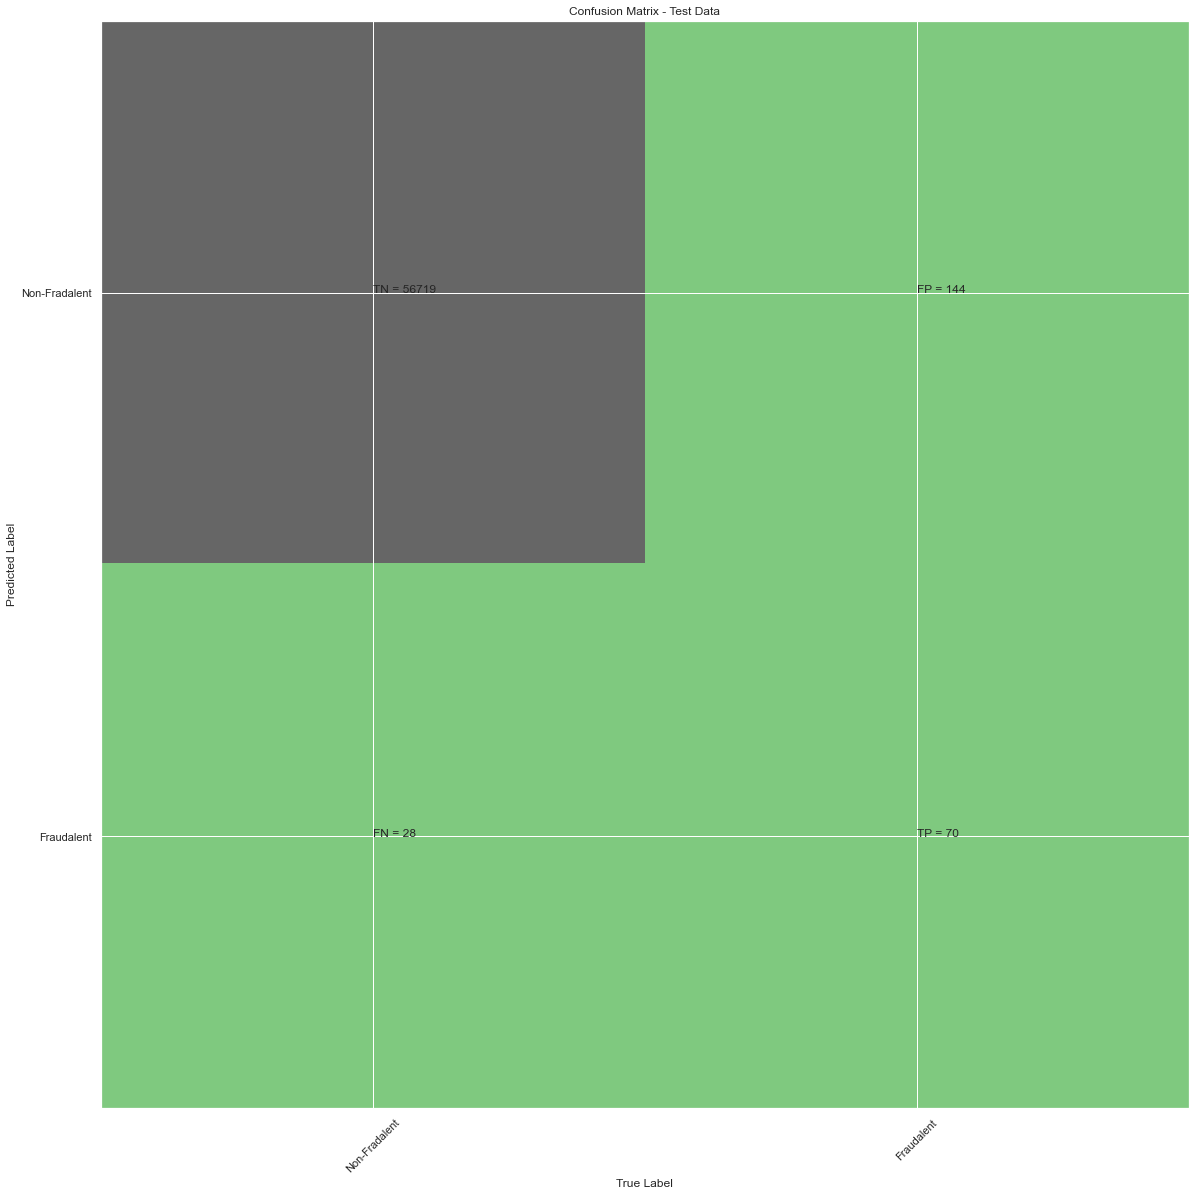

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.33      0.71      0.45        98

    accuracy                           1.00     56961
   macro avg       0.66      0.86      0.72     56961
weighted avg       1.00      1.00      1.00     56961

entropytree_roc_value: 0.8558766559223799
Threshold: 1.0
ROC for the test dataset 85.6%


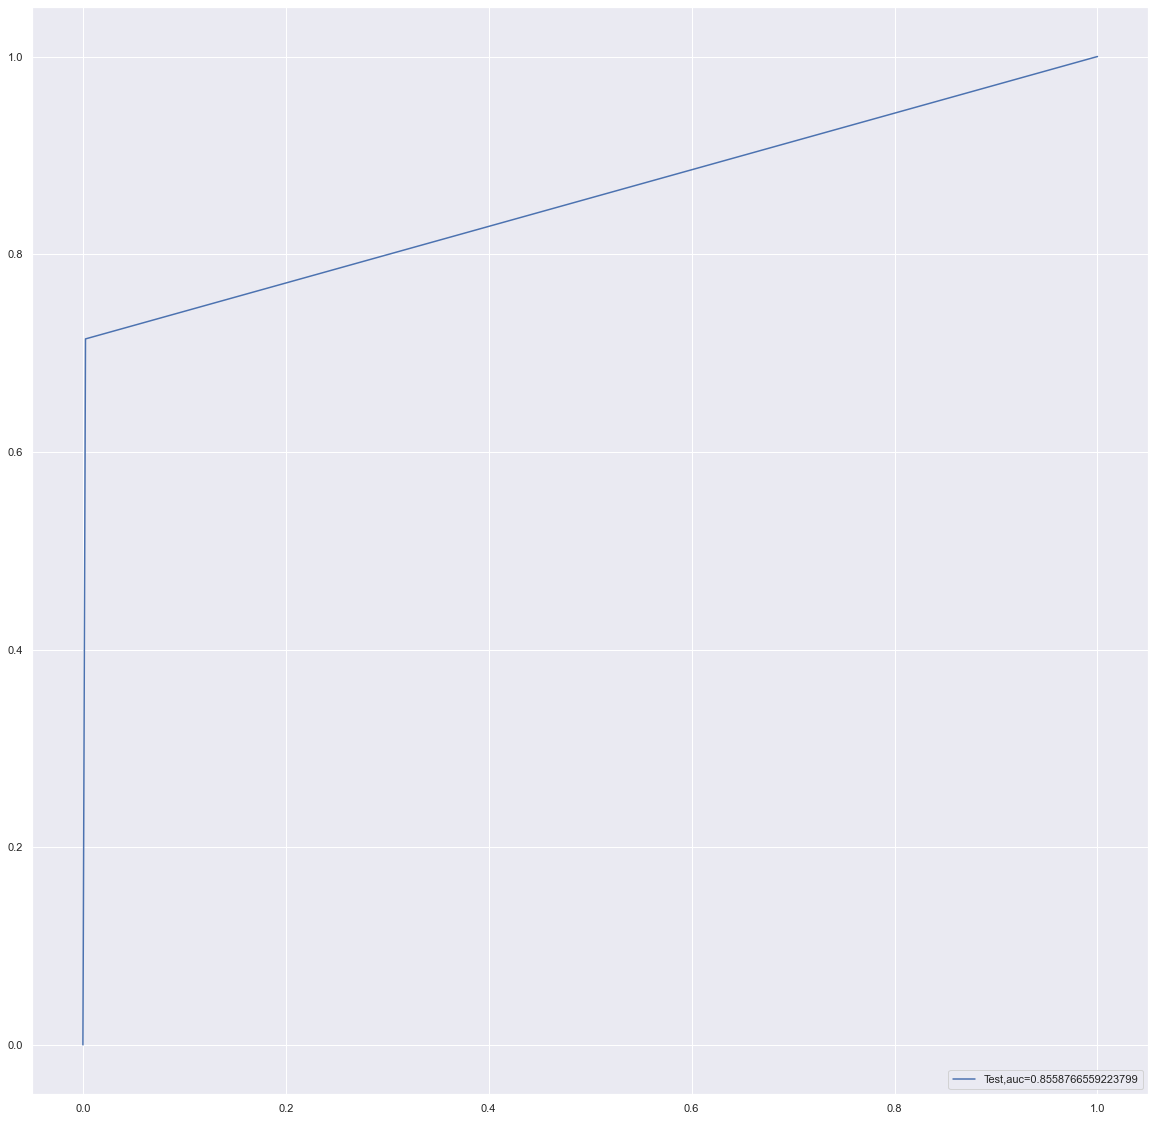

Time Taken by Model: --- 55.49520683288574 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.999490879724724
Confusion Matrix


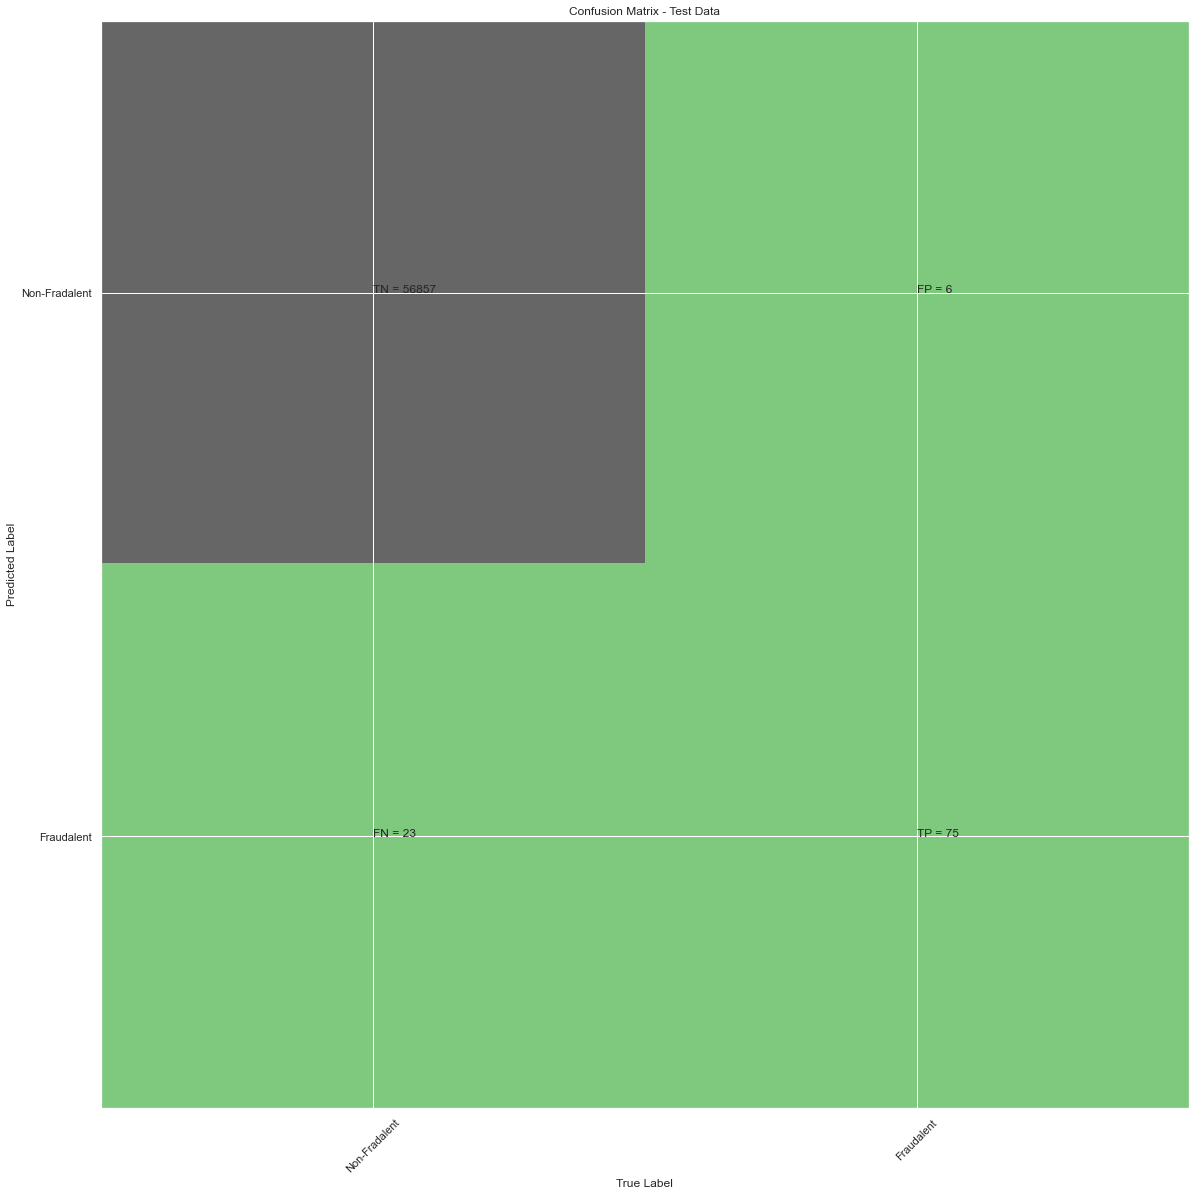

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.93      0.77      0.84        98

    accuracy                           1.00     56961
   macro avg       0.96      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9614705879186172
Random Forest Threshold: 0.05
ROC of the test dataset 96.1%


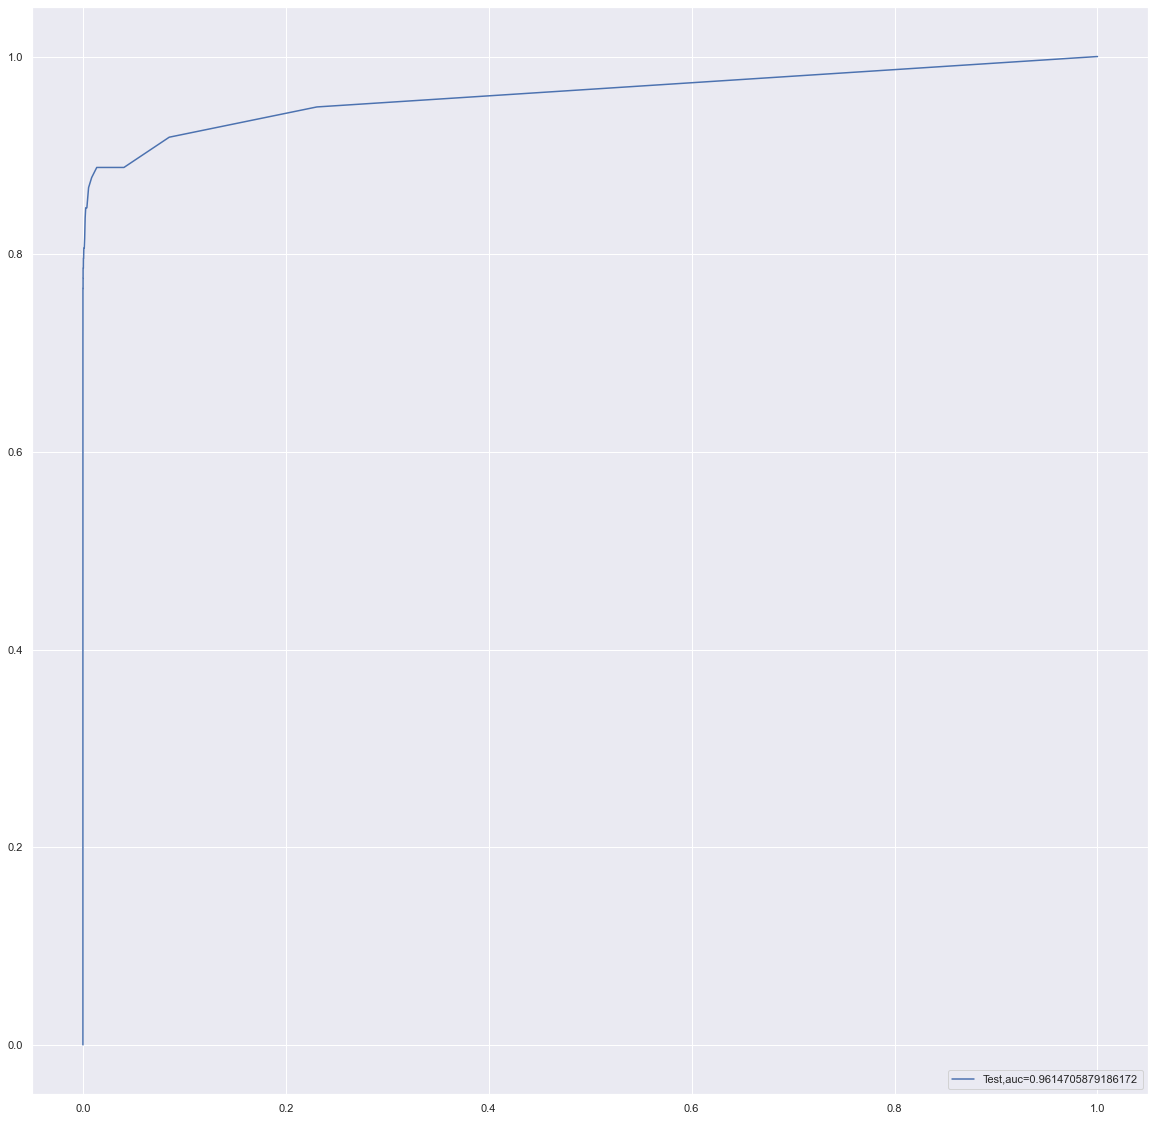

Time Taken by Model: --- 264.7105813026428 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994382121100402
Confusion Matrix


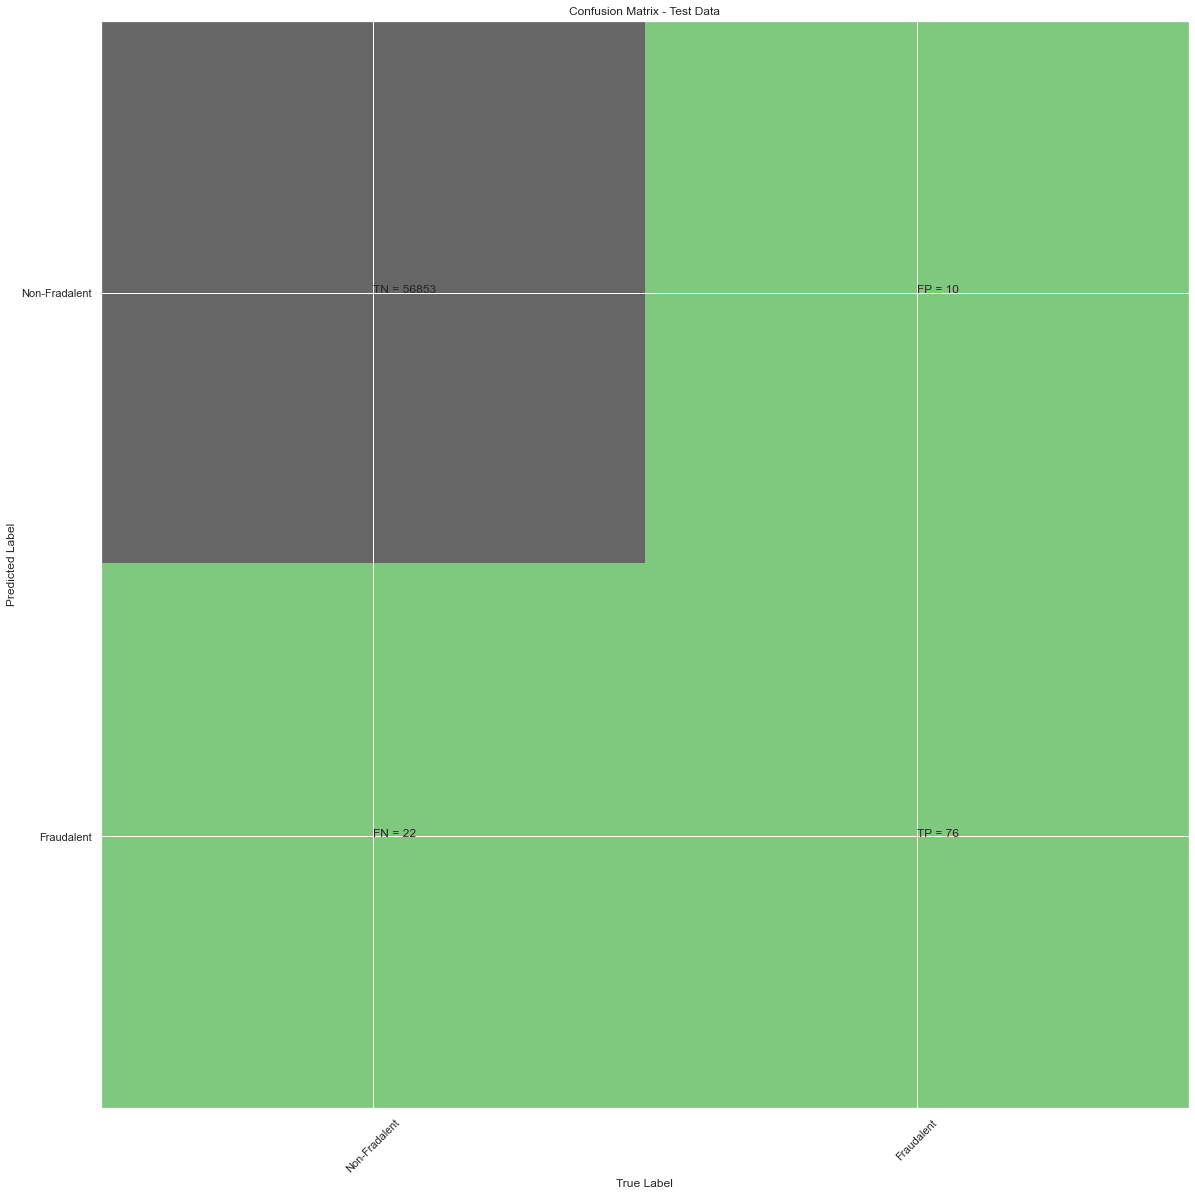

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.88      0.78      0.83        98

    accuracy                           1.00     56961
   macro avg       0.94      0.89      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.9741530574560336
XGBoost threshold: 0.00022058551257941872
ROC for the test dataset 97.4%


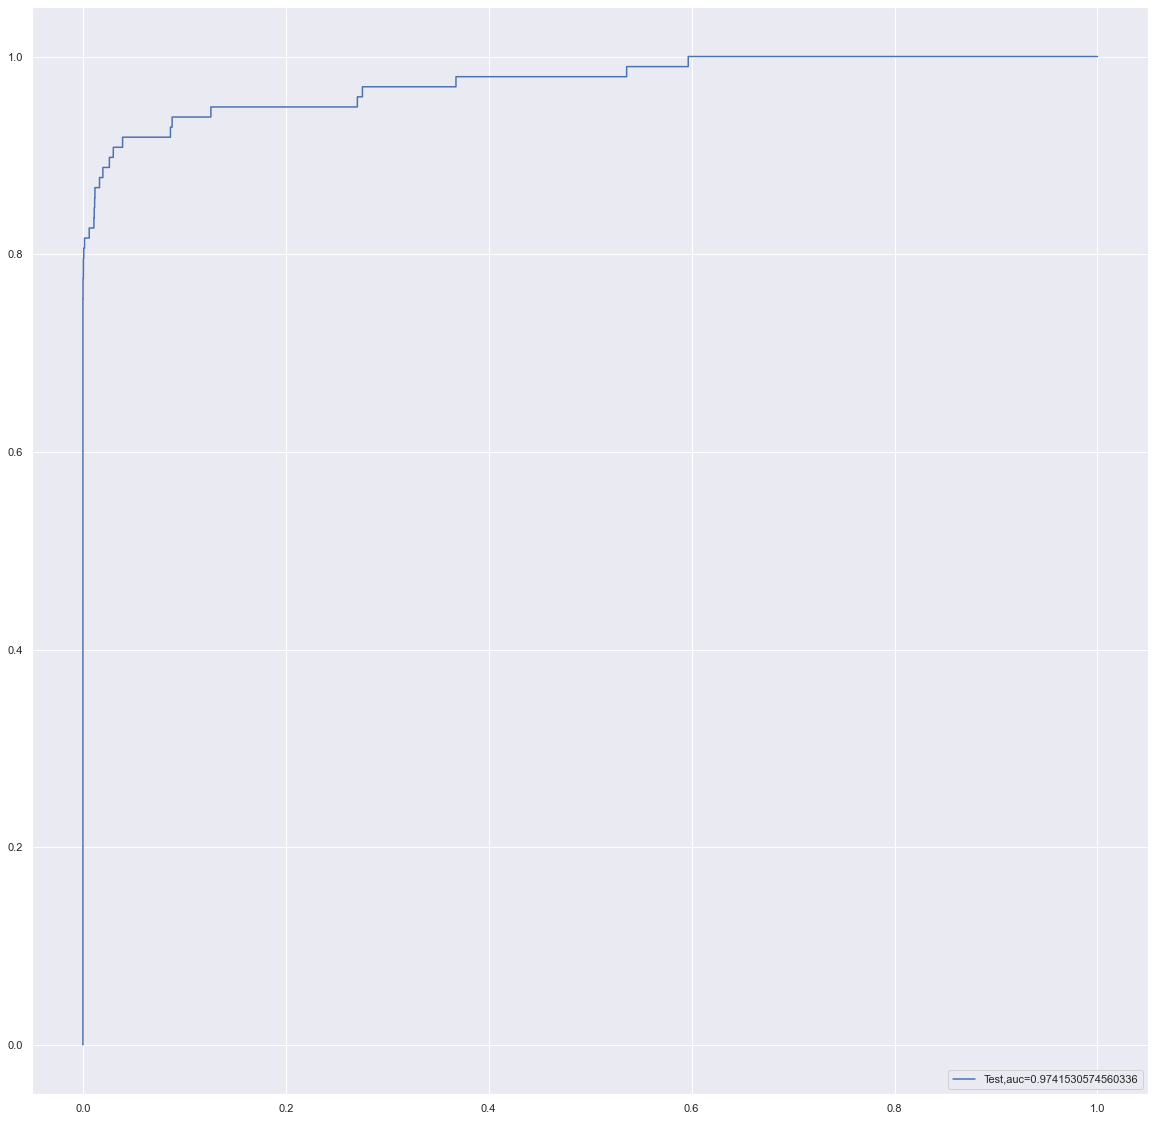

Time Taken by Model: --- 54.010584115982056 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9946805709169432
Confusion Matrix


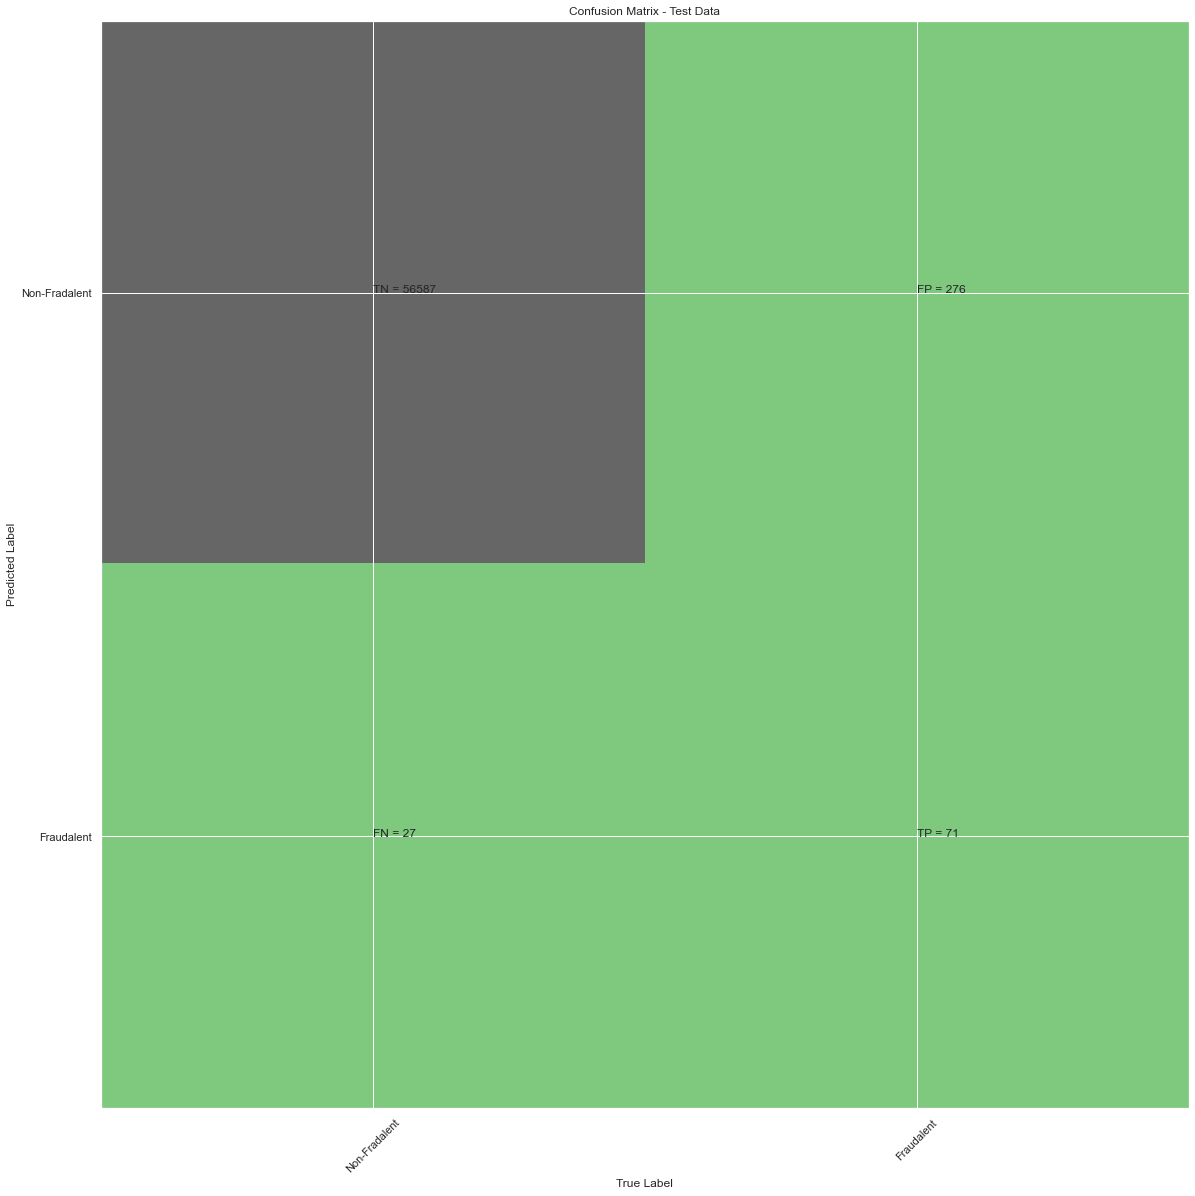

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.20      0.72      0.32        98

    accuracy                           0.99     56961
   macro avg       0.60      0.86      0.66     56961
weighted avg       1.00      0.99      1.00     56961

KNN roc_value: 0.8602674455287628
KNN threshold: 0.6
ROC for the test dataset 86.0%


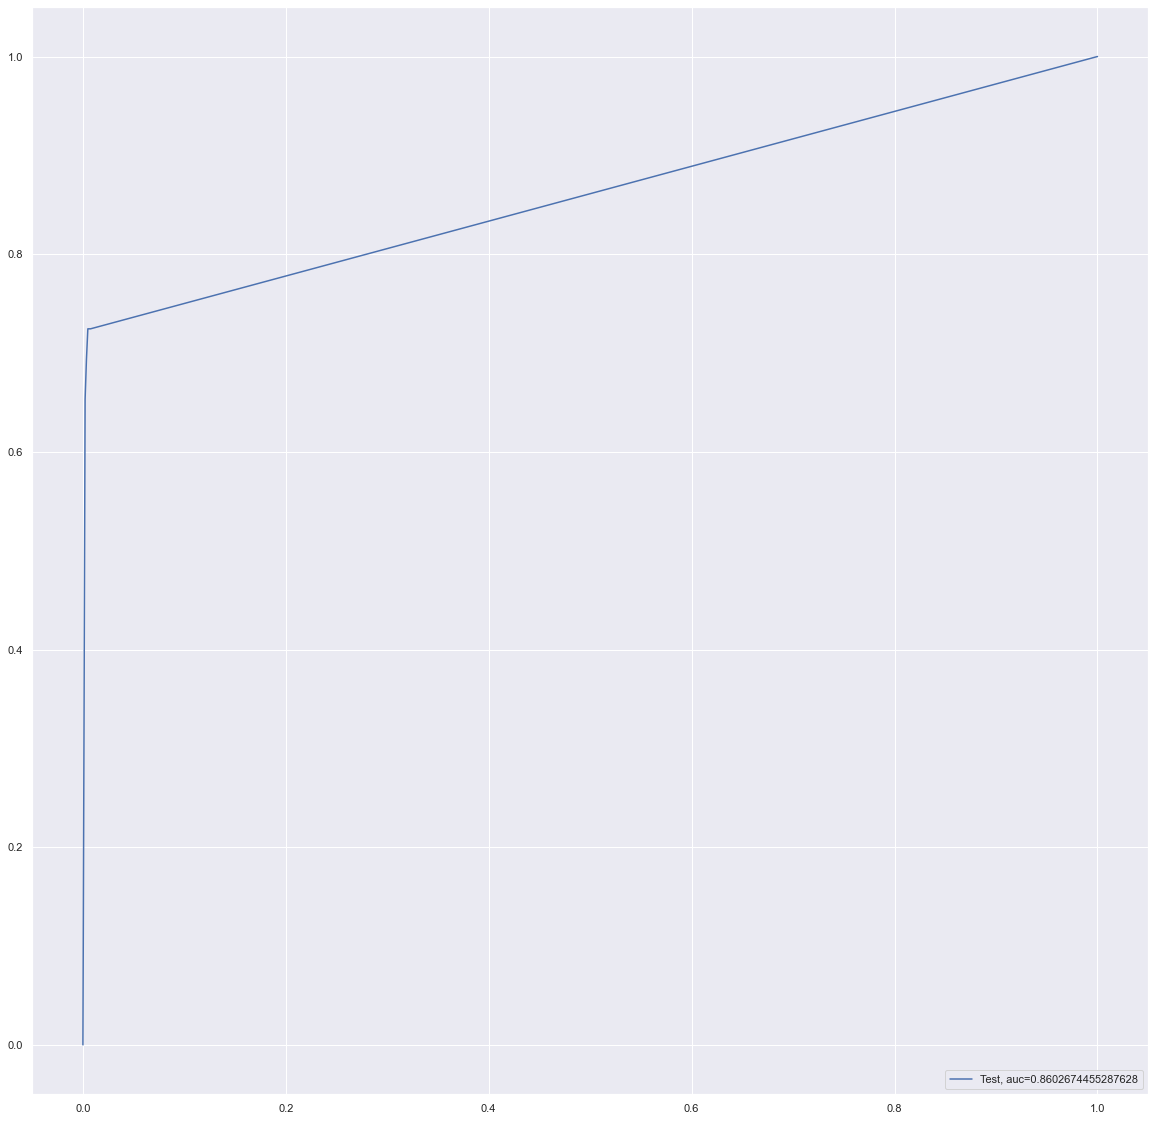

Time Taken by Model: --- 51.40531587600708 seconds ---
--------------------------------------------------------------------------------


In [75]:
Data_Imbalance_Handling = "SMOTE Oversampling with StratifiedKFold CV "
#Run the Logistic Regresstion with L1 & L2 regularization
print('Logistic Regresstion with L1 & L2 Regularisation')
start_time = time.time()
df_result = builtAndRunLogisticRegresstionModels(df_result,Data_Imbalance_Handling,x_train_smote,y_train_smote,x_test,y_test)
print('Time Taken by Model: --- %s second ---'%(time.time()-start_time))
print('-'*80)
#Run Decision Tre Model with 'gini' & 'entropy' criteria
print("Decision Tree Model with 'gini' & 'entropy' criteria")
start_time = time.time()
df_result = BuildAndRunTreeModels(df_result,Data_Imbalance_Handling,x_train_smote,y_train_smote,x_test,y_test)
print('Time Taken by Model: --- %s seconds ---'%(time.time() -start_time))
print('-'*80)
#Run Random Forest Model
print('Random Forest Model')
start_time = time.time()
df_result = BulitAndRunRandomForestModels(df_result,Data_Imbalance_Handling,x_train_smote,y_train_smote,x_test,y_test)
print('Time Taken by Model: --- %s seconds ---'%(time.time() -start_time))
print('-'*80)
#Run XGBoost Model
print('XGBoost Model')
start_time = time.time()
df_result = BuildAndRunXGBoostModel(df_result,Data_Imbalance_Handling,x_train_smote,y_train_smote,x_test,y_test)
print('Time Taken by Model: --- %s seconds ---'%(time.time() -start_time))
print('-'*80)
#Run KNN Model
print('KNN Model')
start_time = time.time()
df_result = BuildAndRunKNNMOdels(df_result,Data_Imbalance_Handling,x_train_smote,y_train_smote,x_test,y_test)
print('Time Taken by Model: --- %s seconds ---'%(time.time() -start_time))
print('-'*80)
#Run SVM Model with Signoid Kernel
#print('SVM Model with Sigmoid Kernel')
#start_time = time.time()
#df_result = BuildAndRunSVMModels(df_result,Data_Imbalance_Handling,x_train_smote,y_train_smote,x_test,y_test)
#print('Time Taken by Model: --- %s seconds ---'%(time.time() -start_time))

In [76]:
df_result

Data_Imbalance_Handling  \
0                             Power Transformer   
1                             Power Transformer   
2                             Power Transformer   
3                             Power Transformer   
4                             Power Transformer   
5                             Power Transformer   
6                             Power Transformer   
7                             Power Transformer   
8                RepeatedKFold Cross Vadidation   
9                RepeatedKFold Cross Vadidation   
10               RepeatedKFold Cross Vadidation   
11               RepeatedKFold Cross Vadidation   
12               RepeatedKFold Cross Vadidation   
13               RepeatedKFold Cross Vadidation   
14               RepeatedKFold Cross Vadidation   
15               RepeatedKFold Cross Vadidation   
16             StratifiedKFold Cross Validation   
17             StratifiedKFold Cross Validation   
18             StratifiedKFold Cross Validation   
19             StratifiedKFold Cross Validation   
20             StratifiedKFold Cross Validation   
21             StratifiedKFold Cross Validation   
22             StratifiedKFold Cross Validation   
23             StratifiedKFold Cross Validation   
24                         Random Undersampling   
25                         Random Undersampling   
26                         Random Undersampling   
27                         Random Undersampling   
28                         Random Undersampling   
29                         Random Undersampling   
30                         Random Undersampling   
31                         Random Undersampling   
32  Random Oversampling with StratifiedKFold CV   
33  Random Oversampling with StratifiedKFold CV   
34  Random Oversampling with StratifiedKFold CV   
35  Random Oversampling with StratifiedKFold CV   
36  Random Oversampling with StratifiedKFold CV   
37  Random Oversampling with StratifiedKFold CV   
38  Random Oversampling with StratifiedKFold CV   
39  SMOTE Oversampling with StratifiedKFold CV    
40  SMOTE Oversampling with StratifiedKFold CV    
41  SMOTE Oversampling with StratifiedKFold CV    
42  SMOTE Oversampling with StratifiedKFold CV    
43  SMOTE Oversampling with StratifiedKFold CV    
44  SMOTE Oversampling with StratifiedKFold CV    
45  SMOTE Oversampling with StratifiedKFold CV    

                                         Model  Accuracy  roc_value  threshold  
0   Logistic Regression With L2 Regularisation  0.998999   0.966806   0.001289  
1   Logistic Regression With L1 Regularisation  0.998876   0.974353   0.005983  
2                Tree Model with gini criteria  0.998806   0.859015   1.000000  
3             Tree Model with entropy criteria  0.999052   0.864337   1.000000  
4                                Random Forest  0.999350   0.940564   0.010000  
5                                      XGBoost  0.999456   0.972998   0.000051  
6                                          KNN  0.999298   0.900851   0.200000  
7                                          SVM  0.998560   0.891340   0.000932  
8   Logistic Regression With L2 Regularisation  0.999122   0.989309   0.002884  
9   Logistic Regression With L1 Regularisation  0.999034   0.903209   0.043890  
10               Tree Model with gini criteria  0.999105   0.880514   1.000000  
11            Tree Model with entropy criteria  0.998999   0.885040   1.000000  
12                               Random Forest  0.999403   0.952776   0.020000  
13                                     XGBoost  0.999438   0.988989   0.000182  
14                                         KNN  0.999228   0.875954   0.200000  
15                                         SVM  0.998227   0.463004   0.002848  
16  Logistic Regression With L2 Regularisation  0.998771   0.983262   0.001587  
17  Logistic Regression With L1 Regularisation  0.999280   0.900644   0.027905  
18               Tree Model with gini criteria  0.998841   0.826249   1.000000  
19    

### Result for SMOTE Oversampling:

***Looking at Accuarcy and ROC value we have XGBoost which has provide best results for SMOTE of oversampling technique***

## Oversampling with ADASYN 

**We will use ADASYN  method to handle the class imbalance**

- First we will display class distibution with and without the ADASYN Oversampling.


- Then We will use the oversampled with StratifiedKFold cross validation method to genearte Train And test datasets.


Once we have train and test dataset we will feed the data to below models:

1. Logistic Regression with L2 Regularisation


2. Logistic Regression with L1 Regularisation


3. KNN


4. Decision tree model with Gini criteria


5. Decision tree model with Entropy criteria


6. Random Forest


7. XGBoost


8. We did try SVM (support vector Machine) model , but due to extensive processive power requirement we avoided useing the model.


9. Once we get results for above model, we will compare the results and select model which provided best results for the oversampling techinique

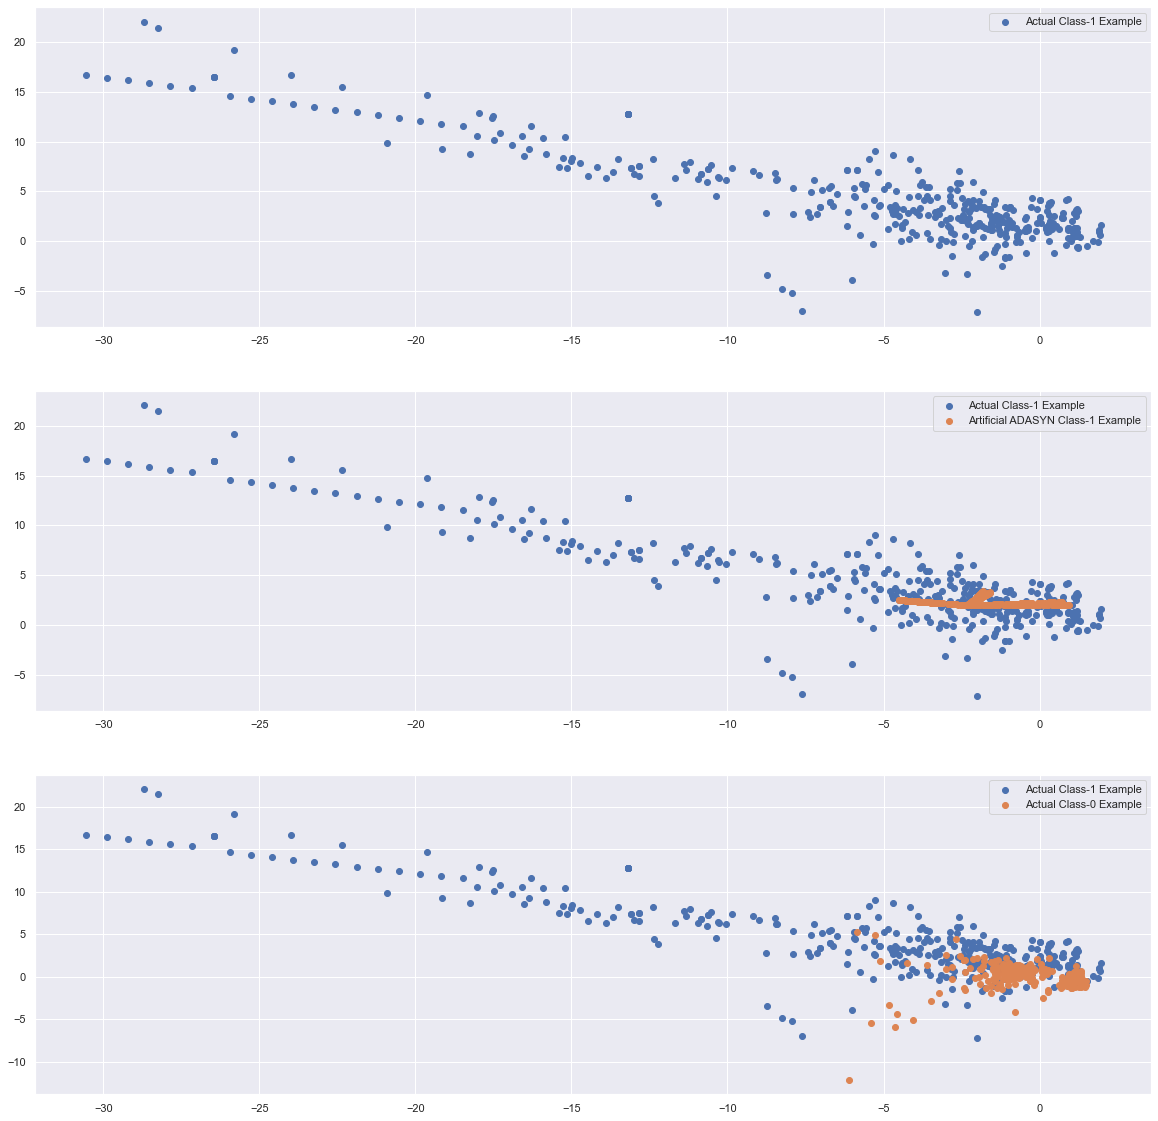

In [77]:
from imblearn import over_sampling
ADASYN = over_sampling.ADASYN(random_state=0)

x_train_ADASYN, y_train_ADASYN = ADASYN.fit_resample(x_train,y_train)

# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do

x_train_ADASYN_1 = x_train_ADASYN[x_train.shape[0]:]

x_train_1 = x_train.to_numpy()[np.where(y_train==1.0)]
x_train_0 = x_train.to_numpy()[np.where(y_train==0.0)]

plt.rcParams['figure.figsize'] = [20,20]
fig = plt.figure()

plt.subplot(3,1,1)
plt.scatter(x_train_1[:,0], x_train_1[:,1], label='Actual Class-1 Example')
plt.legend()

plt.subplot(3,1,2)
plt.scatter(x_train_1[:,0], x_train_1[:,1], label='Actual Class-1 Example')
plt.scatter(x_train_ADASYN_1.iloc[:x_train_1.shape[0], 0], x_train_ADASYN_1.iloc[:x_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Example')
plt.legend()

plt.subplot(3,1,3)
plt.scatter(x_train_1[:,0],x_train_1[:, 1], label='Actual Class-1 Example')
plt.scatter(x_train_0[:x_train_1.shape[0],0],x_train_0[:x_train_1.shape[0],1],label='Actual Class-0 Example')
plt.legend()


#Create DataFrame
x_train_ADASYN = pd.DataFrame(data=x_train_ADASYN,columns=cols)

In [78]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(x,y), 1):
    x_train = x.loc[train_index]
    y_train = y.loc[train_index]
    x_test = x.loc[test_index]
    y_test = y.loc[test_index]
    SMOTE = over_sampling.ADASYN(random_state=0)
    x_train_ADASYN, y_train_ADASYN = ADASYN.fit_resample(x_train, y_train)

    # Create DataFrame for x_over
x_train_ADASYN = pd.DataFrame(data=x_train_ADASYN,columns=cols)

Logistic Regresstion with L1 & L2 Regularisation
Max auc_roc for l2 :  0.9835138479653776
Max auc_roc for l1 :  0.9469406439407215
Parameters for l2 regularisation
[[ 0.99381214  1.05967473  0.87007447  0.95027691  0.76748903 -1.20170539
  -0.94631505 -0.58425053 -0.36260969 -0.88761975  0.79247447 -1.45305885
  -0.16500775 -1.99221546  0.14399361 -1.00137342 -1.14688741 -0.52937324
   0.38453829 -1.41720826 -0.20526962  0.71904013  0.65820954 -1.11432583
   0.71528517  0.20917044  0.14930552  1.32885955  0.01286033  0.02229333]]
[-5.11818723]
{1: array([[0.610404  , 0.63191849, 0.72150467, 0.87081578, 0.95798817,
        0.97416661, 0.97844939, 0.9814827 , 0.98276667, 0.98315654,
        0.98321747, 0.98321747, 0.98321747, 0.98321747, 0.98321747,
        0.98321747, 0.98321747, 0.98321747, 0.98321747, 0.98321747],
       [0.61072194, 0.63192858, 0.72000917, 0.86805623, 0.95677094,
        0.9739103 , 0.97856472, 0.98179988, 0.98312686, 0.98349551,
        0.98355694, 0.98355694, 0.983

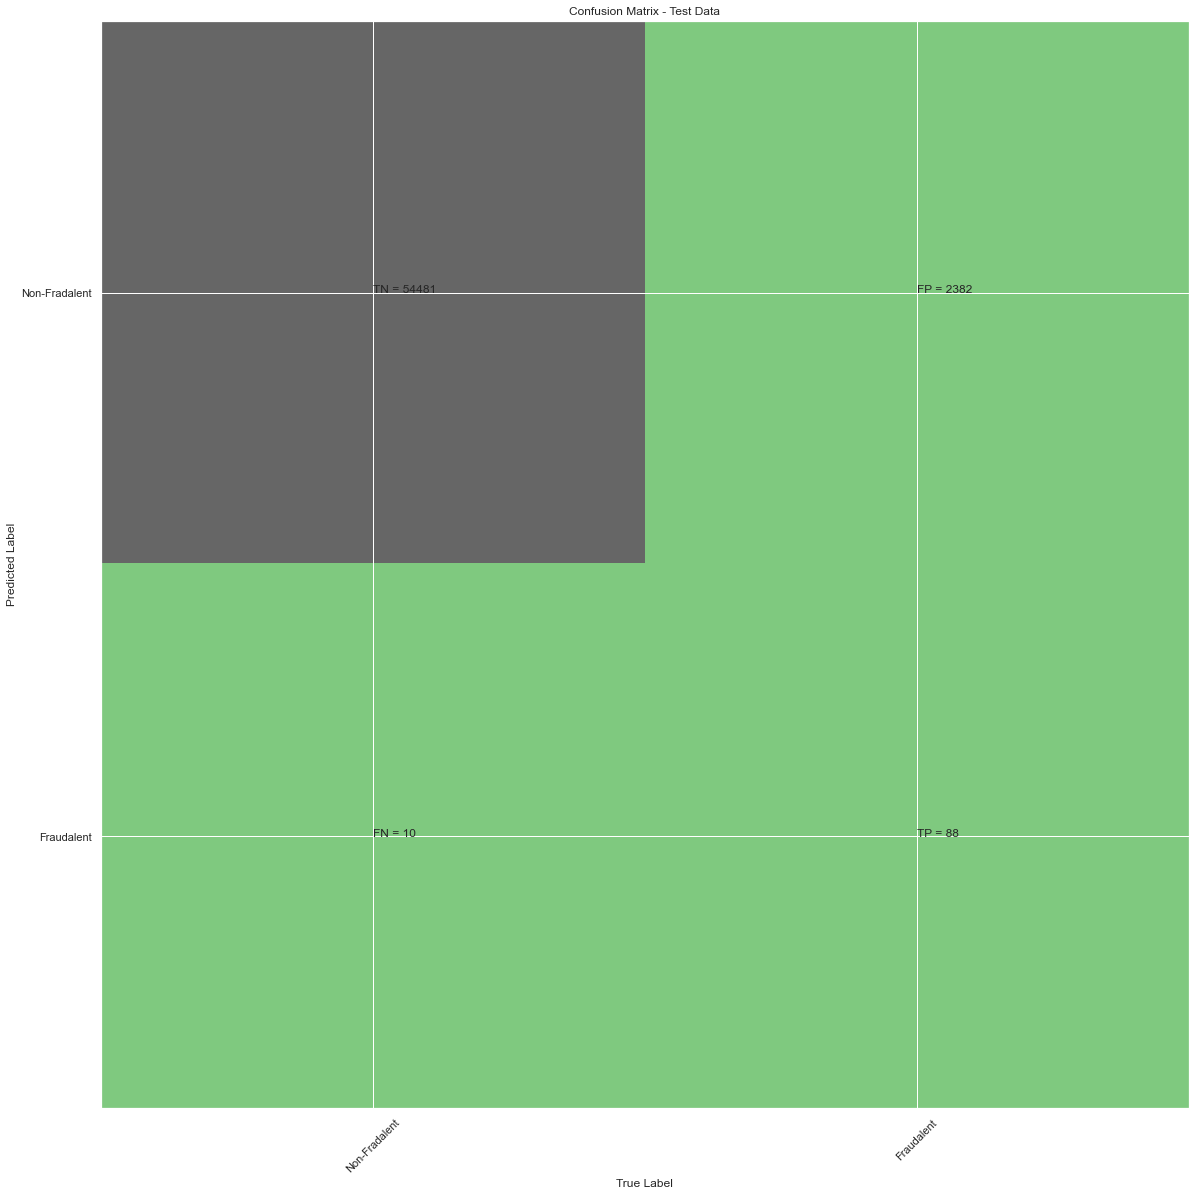

classsification Report
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56863
           1       0.04      0.90      0.07        98

    accuracy                           0.96     56961
   macro avg       0.52      0.93      0.52     56961
weighted avg       1.00      0.96      0.98     56961

Accuarcy of Logistic Model with L1 regularisation : 0.999280209265989
Confustion Matrix


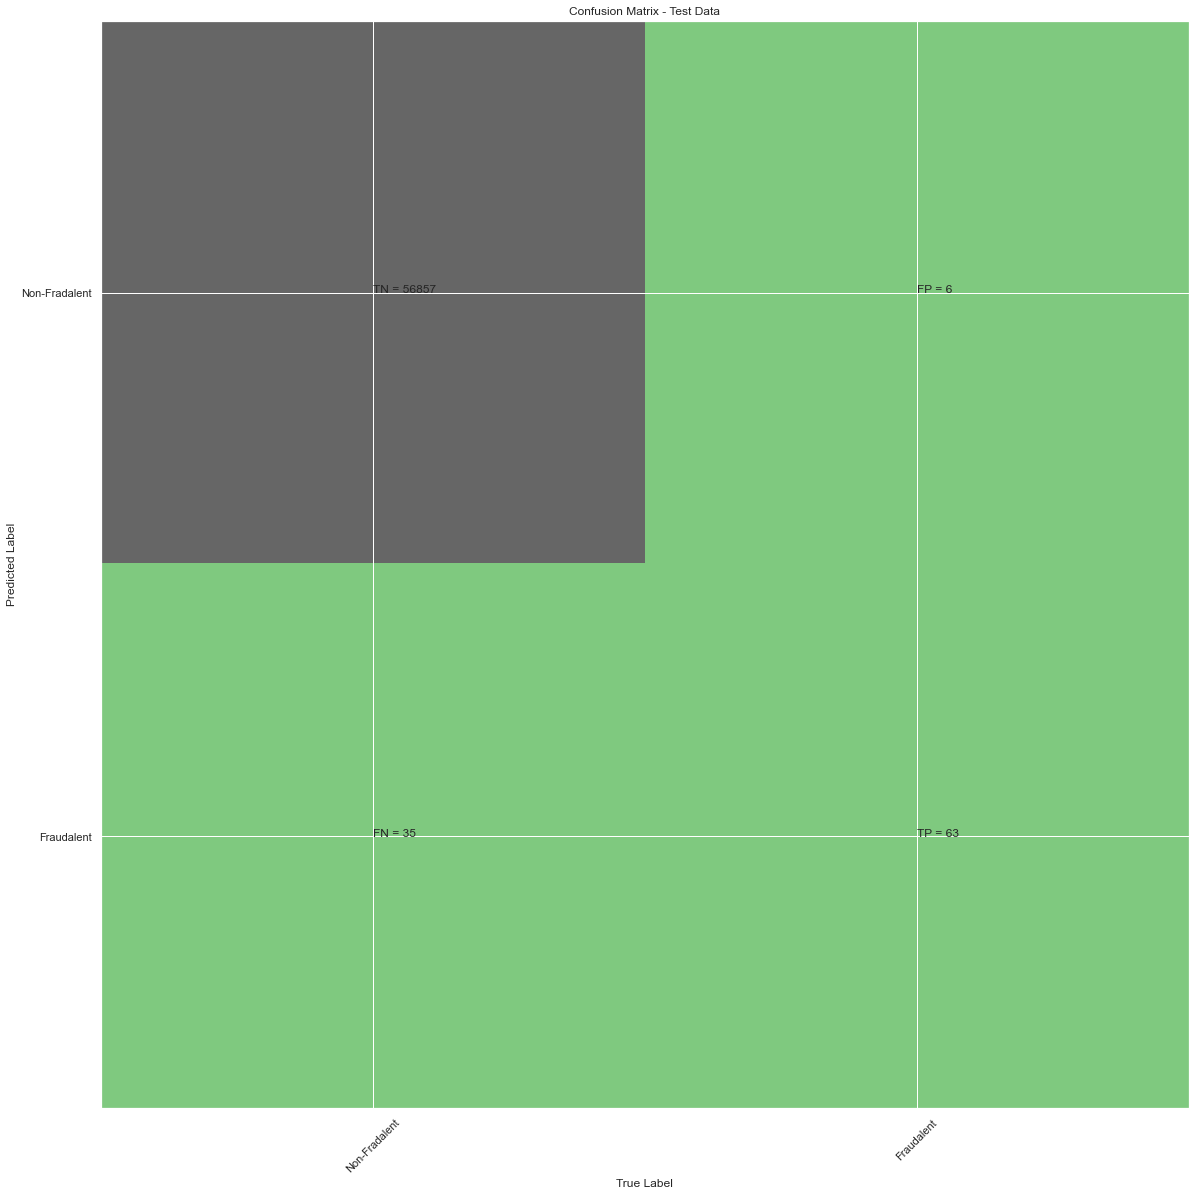

classsification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.91      0.64      0.75        98

    accuracy                           1.00     56961
   macro avg       0.96      0.82      0.88     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9740239429750058
l2 threshold: 0.6114856122094472
ROC for the test dataset 97.4%


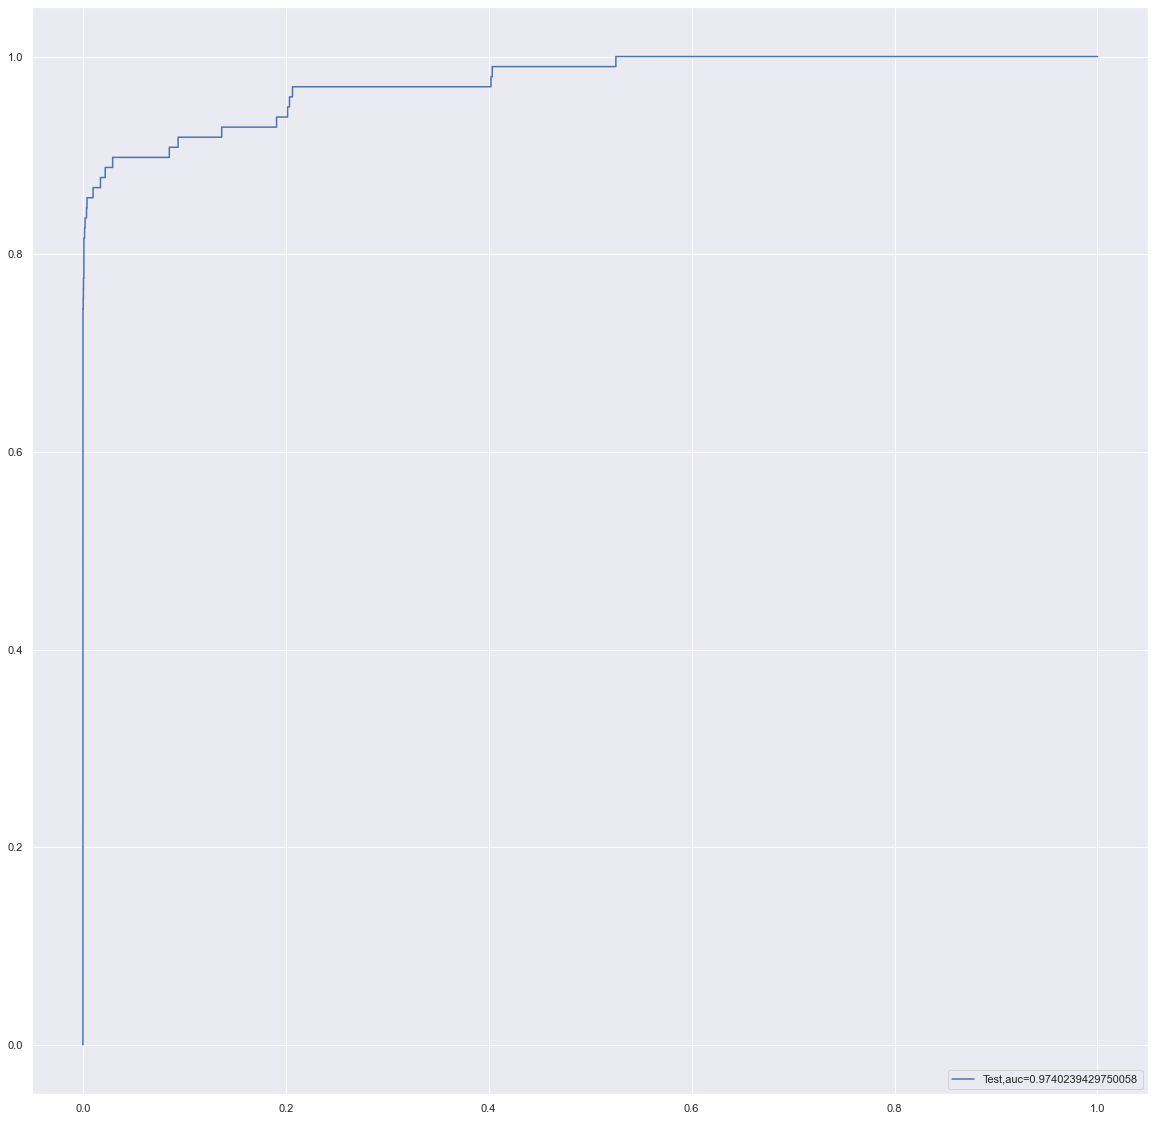

l1 roc_value: 0.9006435805069615
l1 threshold: 0.027904640739128295
ROC for the test dataset 90.1%


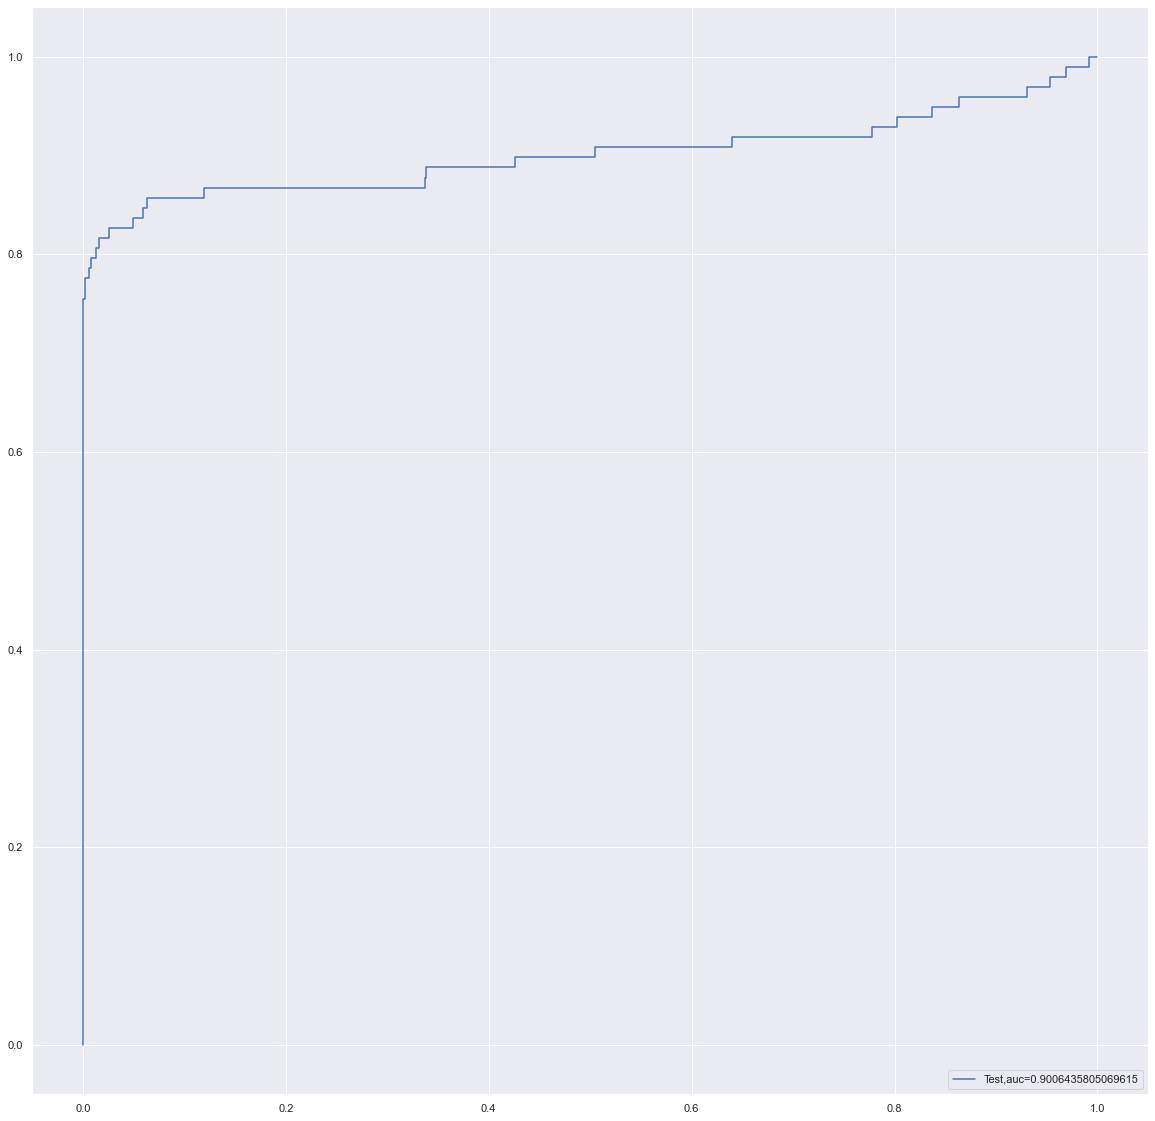

Time Taken by Model: --- 402.4448838233948 second ---
--------------------------------------------------------------------------------
Decision Tree Model with 'gini' & 'entropy' criteria
giniscore: 0.9979459630273345
Confusion Matrix


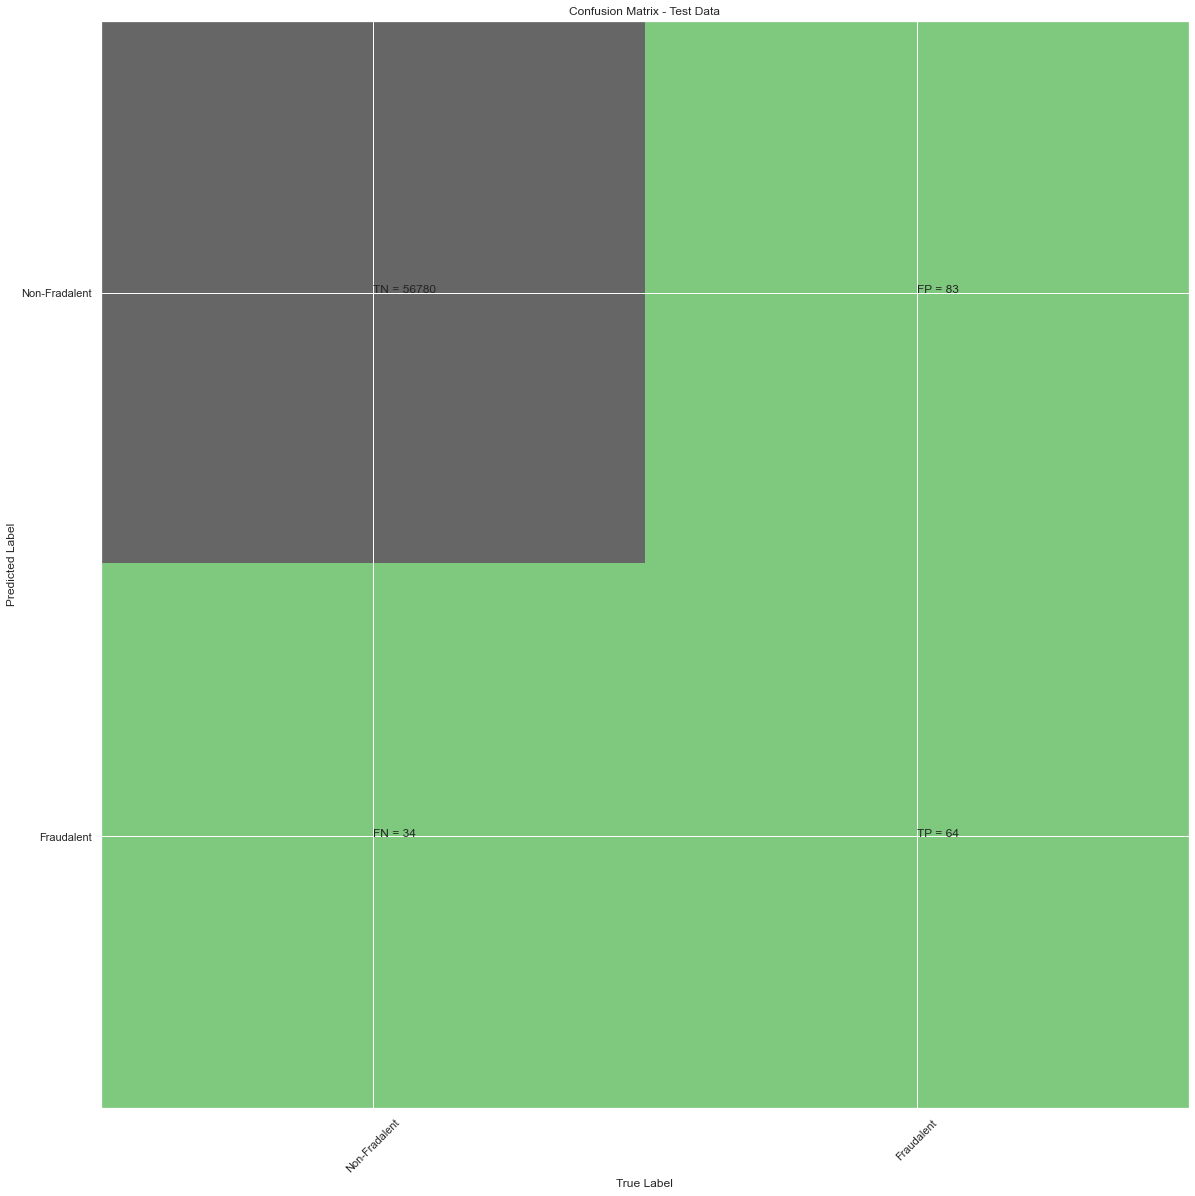

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.44      0.65      0.52        98

    accuracy                           1.00     56961
   macro avg       0.72      0.83      0.76     56961
weighted avg       1.00      1.00      1.00     56961

ginitree_roc_value: 0.8258007879303172
Threshold: 1.0
ROC for the test dataset 82.6%


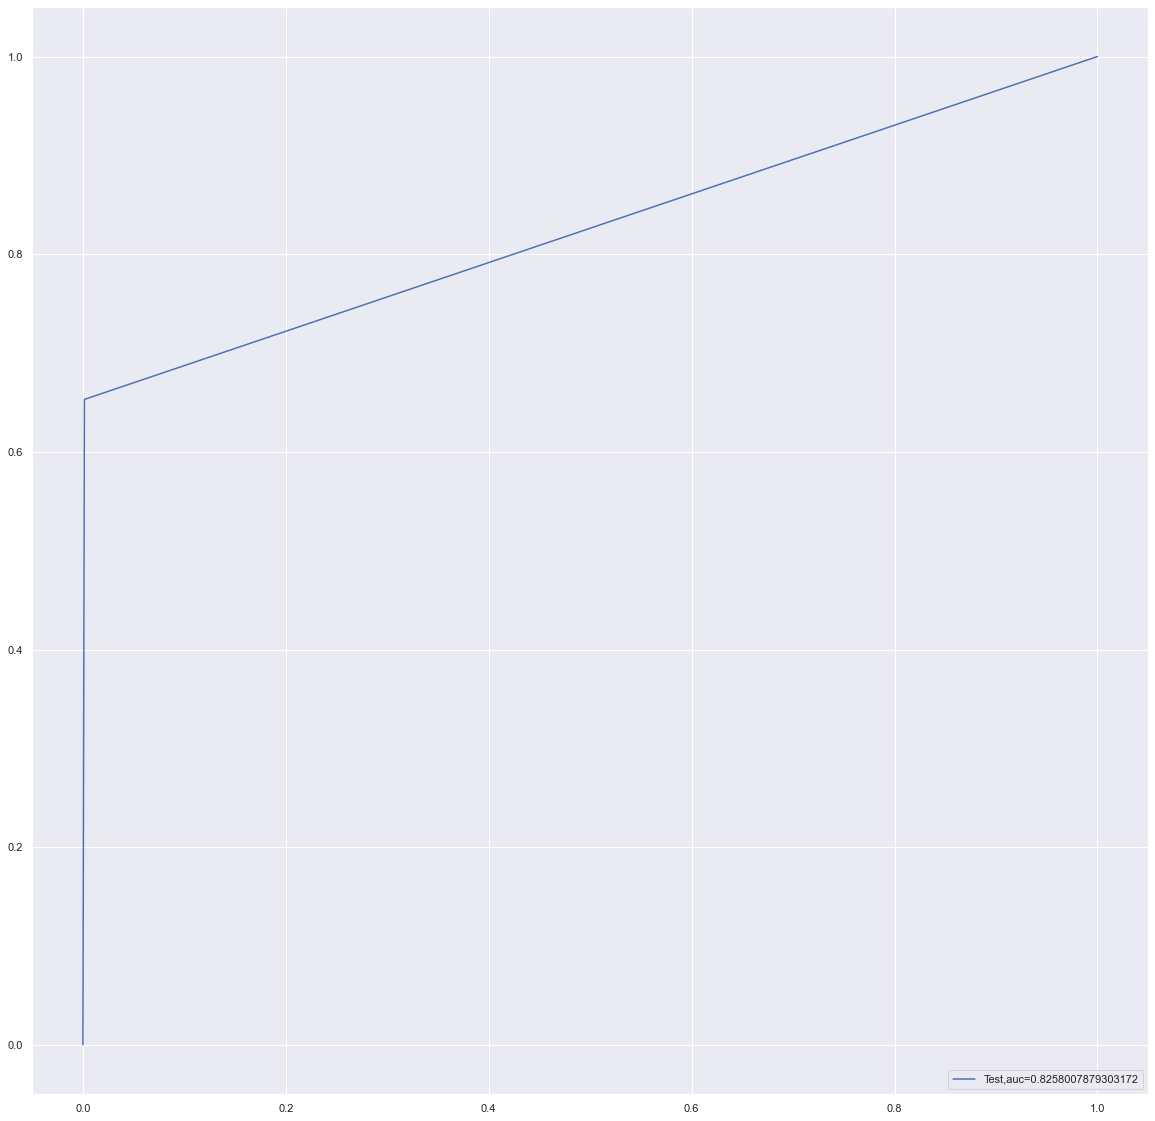

entropyscore: 0.9954179175225154
Confusion Matrix


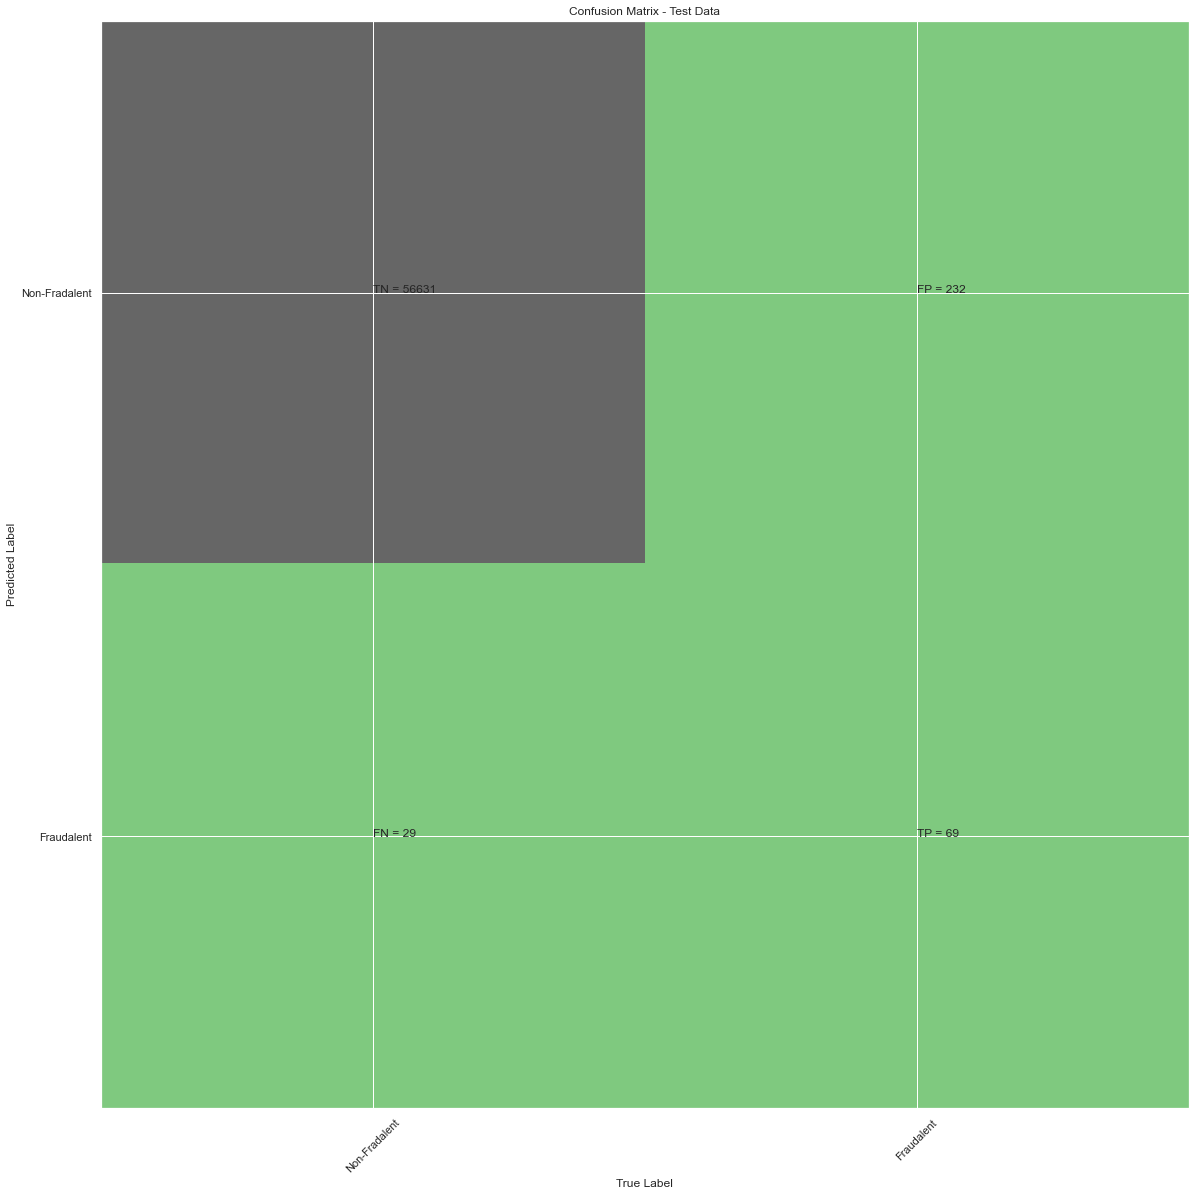

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.23      0.70      0.35        98

    accuracy                           1.00     56961
   macro avg       0.61      0.85      0.67     56961
weighted avg       1.00      1.00      1.00     56961

entropytree_roc_value: 0.8500008254713172
Threshold: 1.0
ROC for the test dataset 85.0%


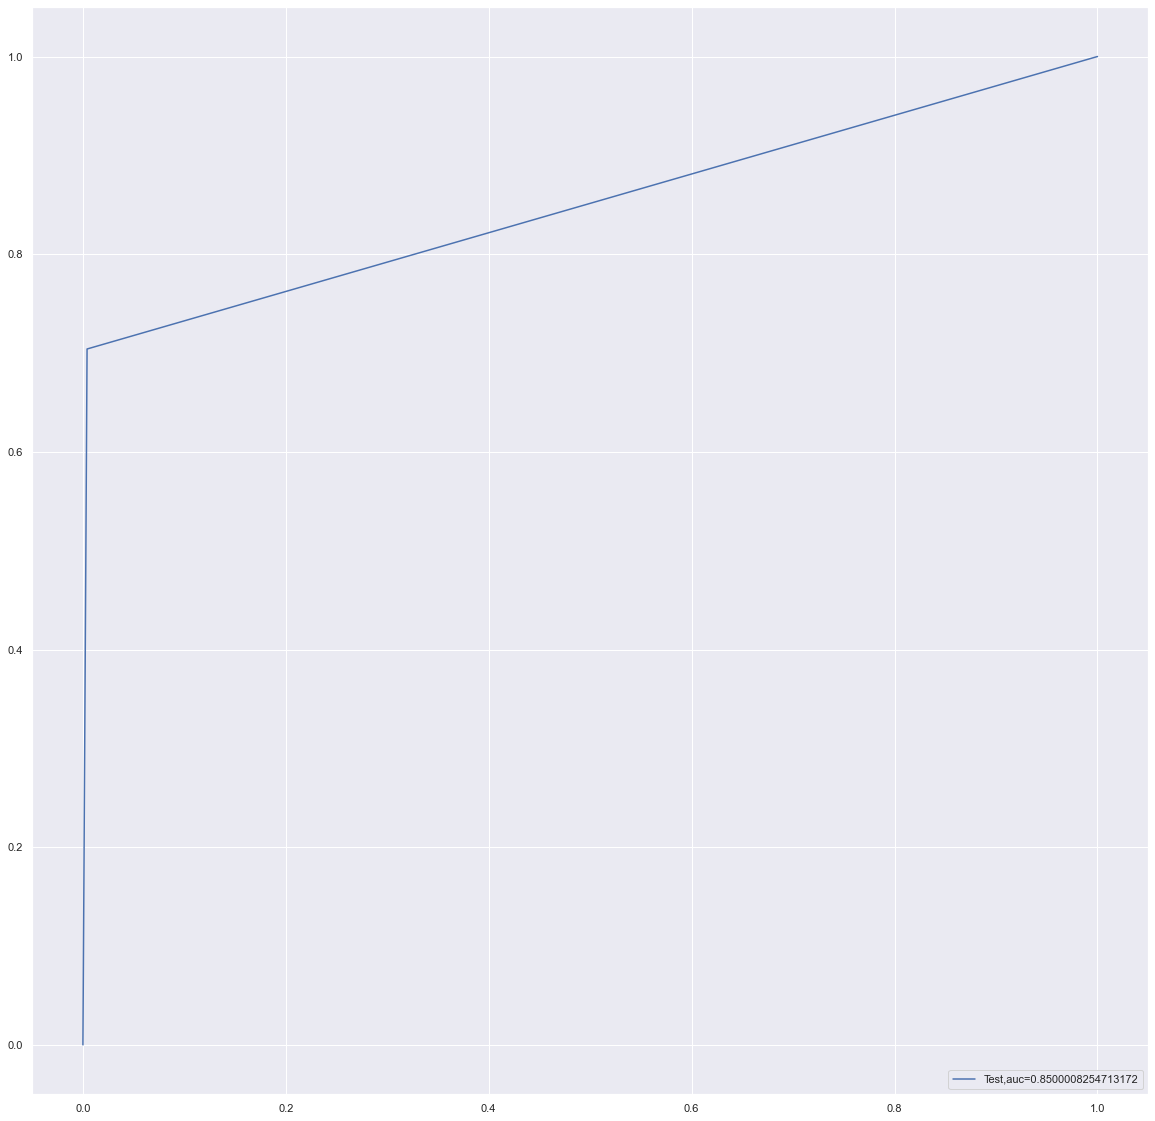

Time Taken by Model: --- 54.91266417503357 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9995259914678464
Confusion Matrix


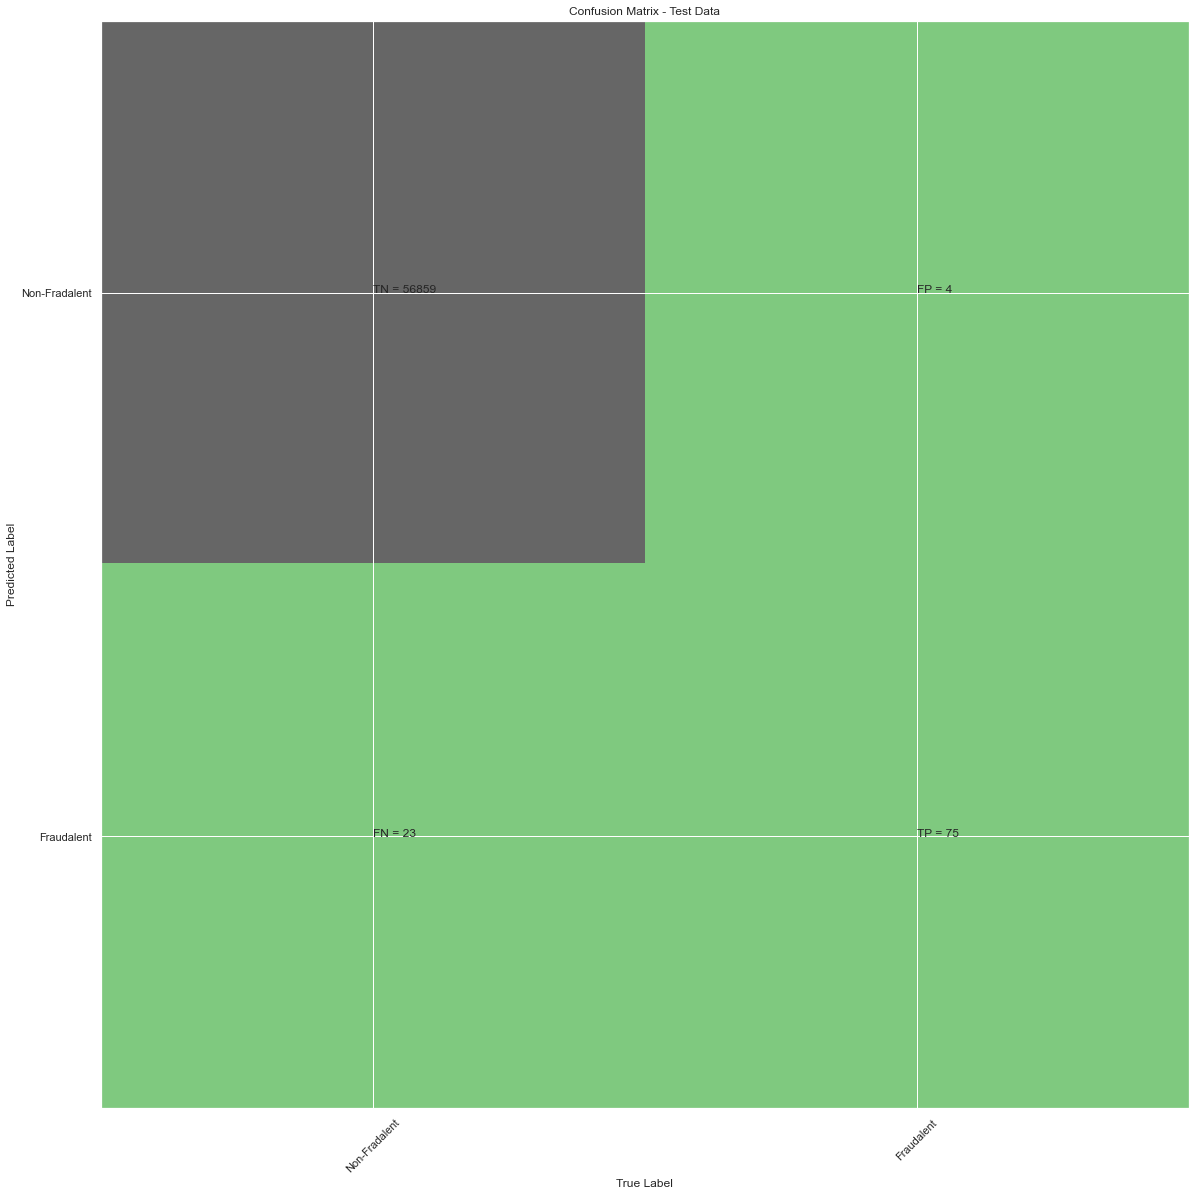

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.95      0.77      0.85        98

    accuracy                           1.00     56961
   macro avg       0.97      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9632269575962563
Random Forest Threshold: 0.03
ROC of the test dataset 96.3%


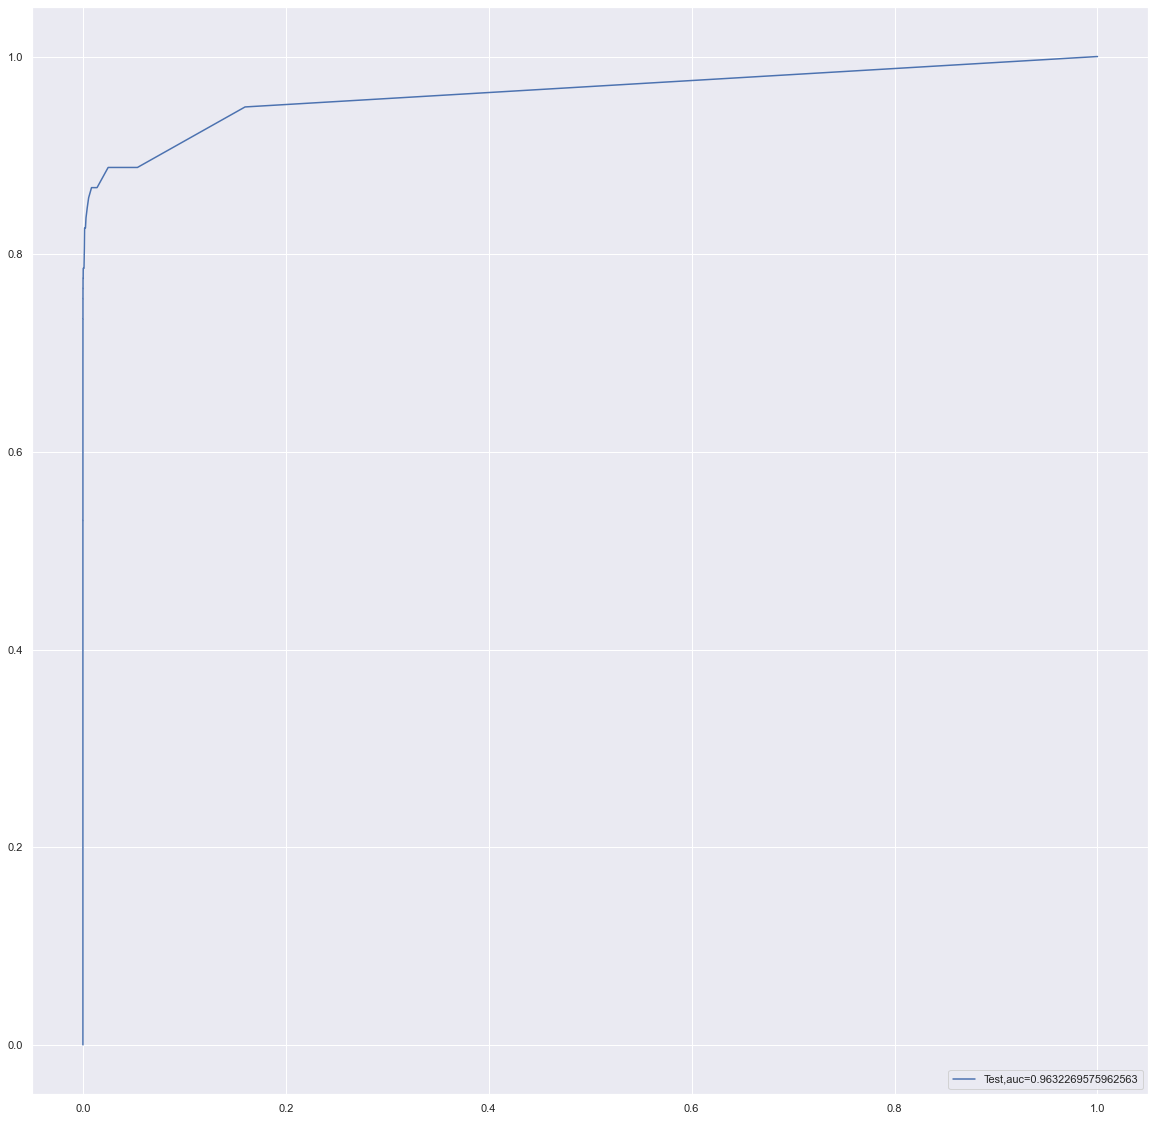

Time Taken by Model: --- 264.38997769355774 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9993855444953564
Confusion Matrix


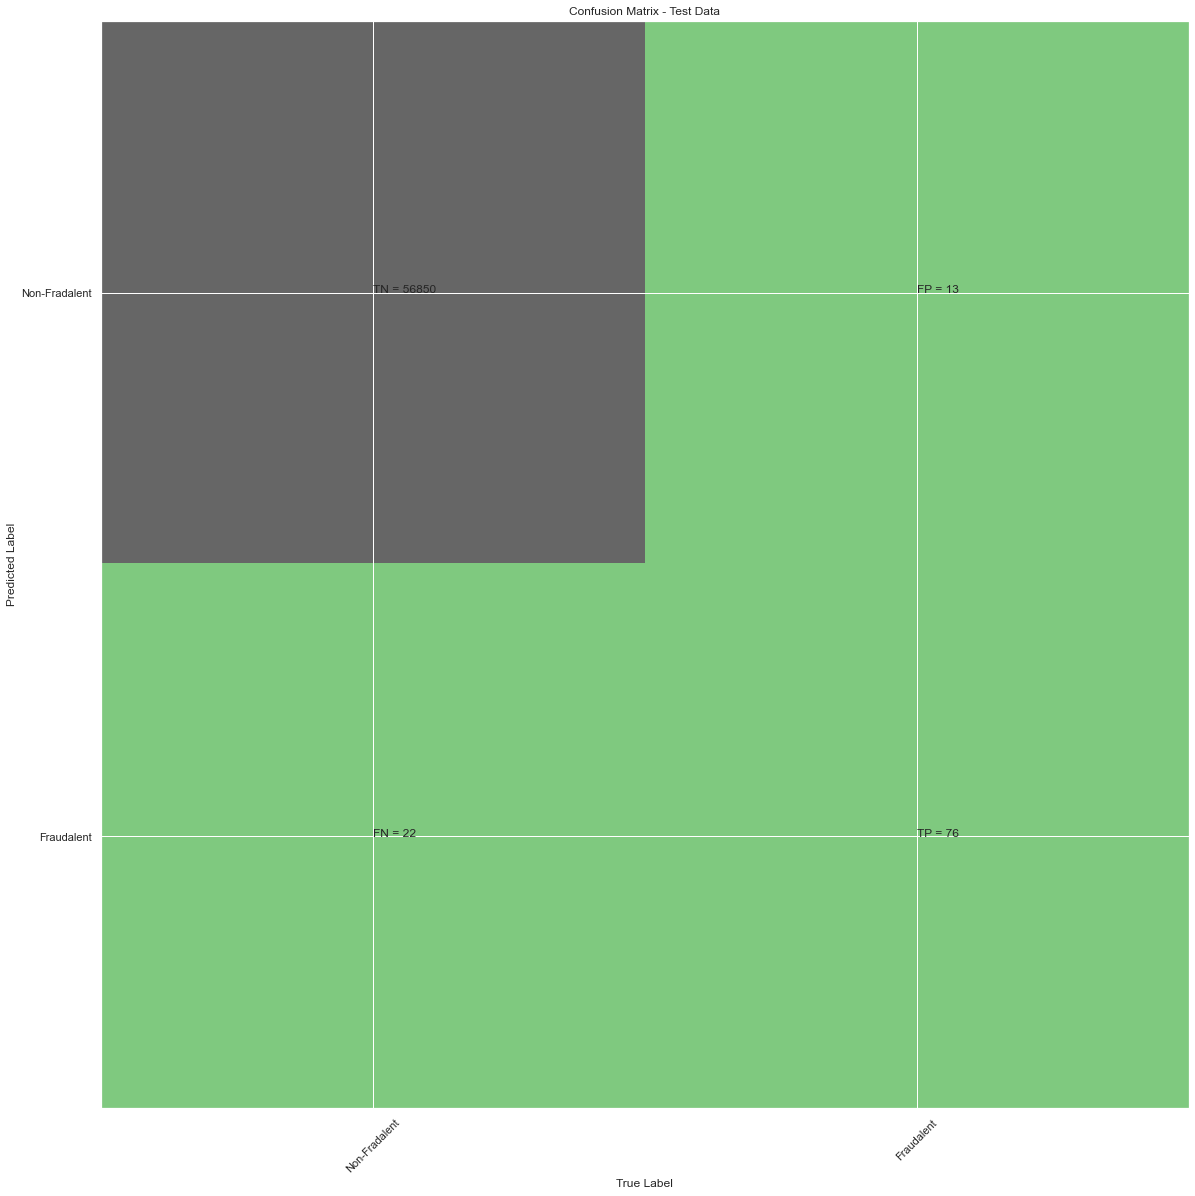

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.85      0.78      0.81        98

    accuracy                           1.00     56961
   macro avg       0.93      0.89      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.970320537690482
XGBoost threshold: 0.0016991241136565804
ROC for the test dataset 97.0%


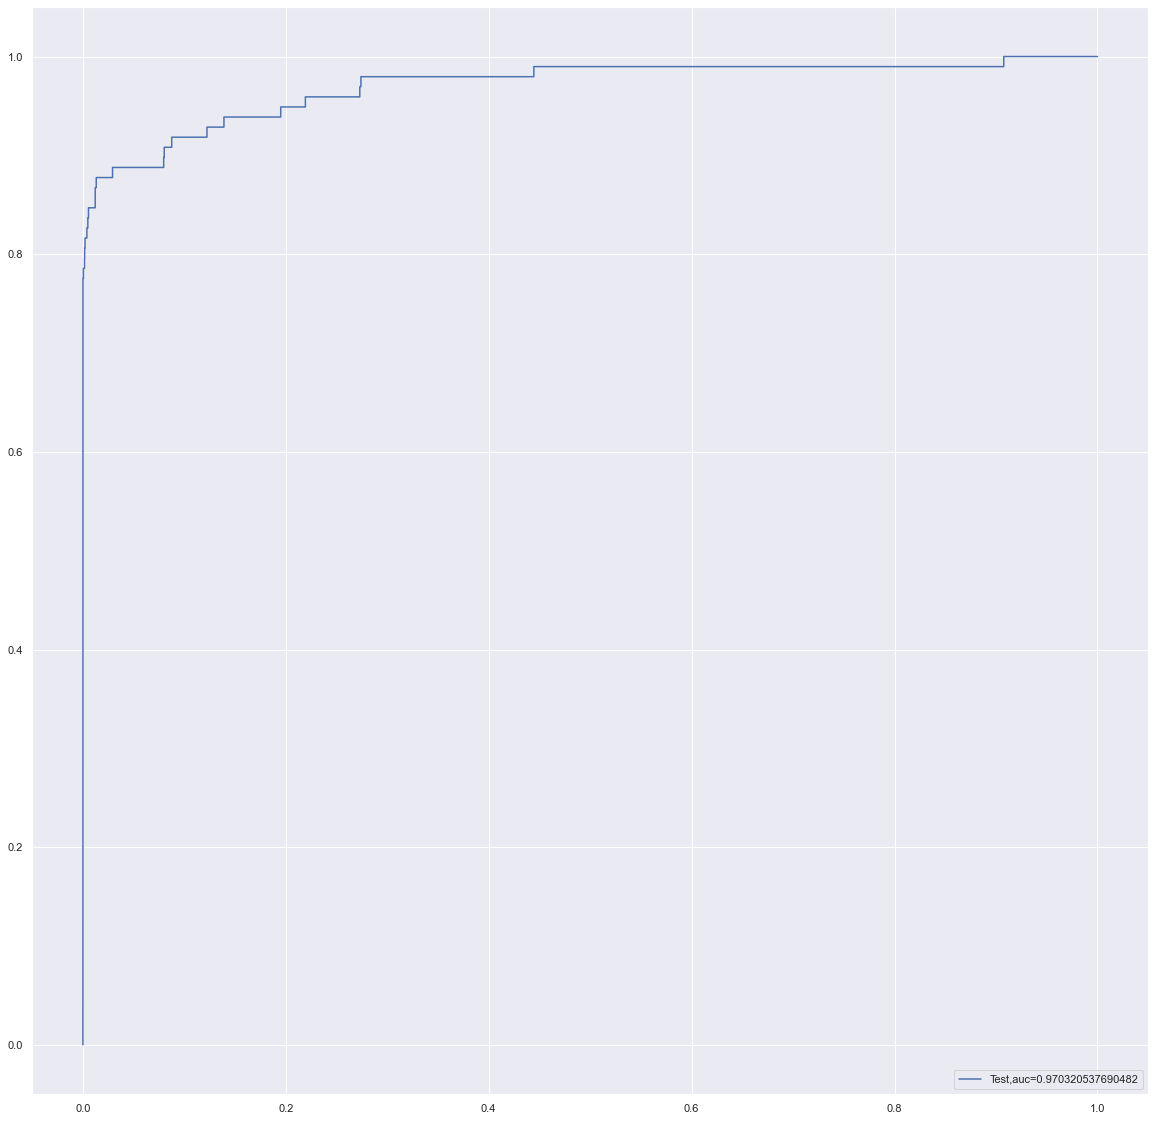

Time Taken by Model: --- 55.90651607513428 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9945050122013307
Confusion Matrix


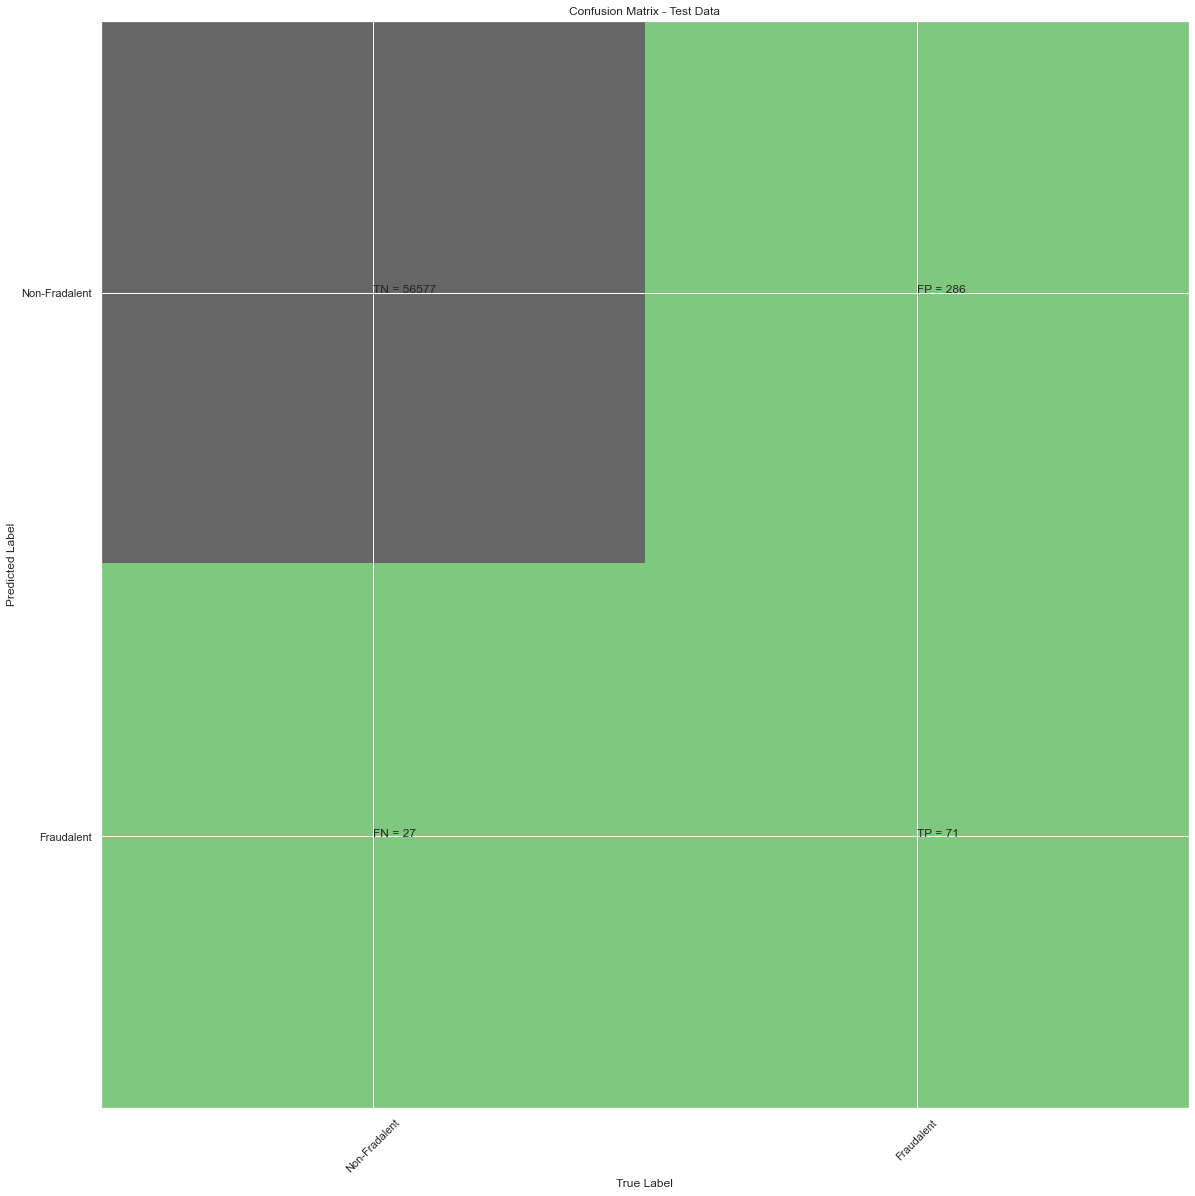

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.20      0.72      0.31        98

    accuracy                           0.99     56961
   macro avg       0.60      0.86      0.65     56961
weighted avg       1.00      0.99      1.00     56961

KNN roc_value: 0.8601937811862167
KNN threshold: 0.6
ROC for the test dataset 86.0%


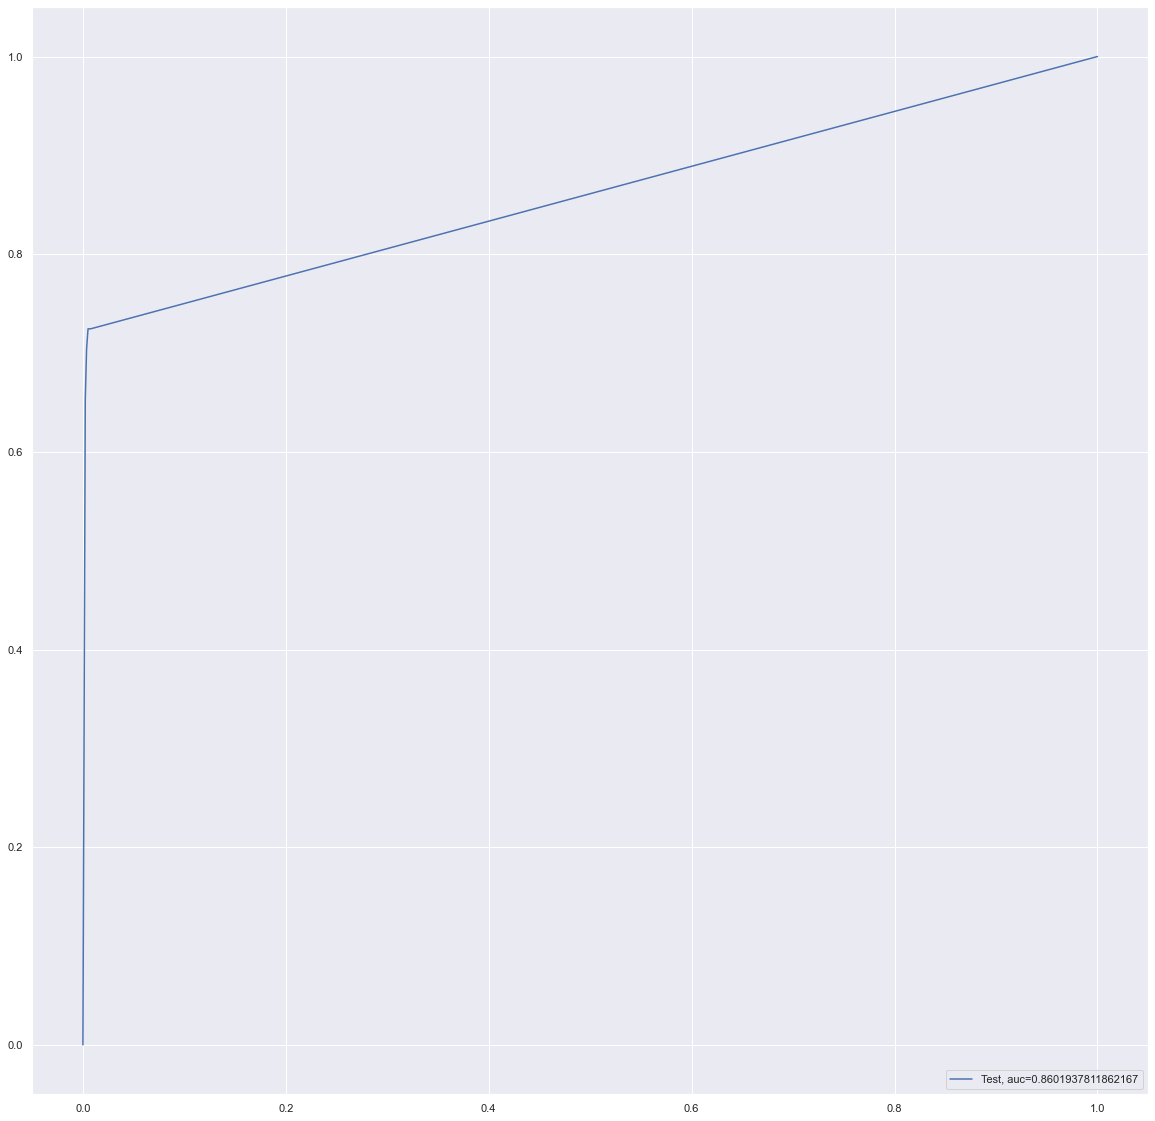

Time Taken by Model: --- 50.66332983970642 seconds ---
--------------------------------------------------------------------------------


In [79]:
Data_Imbalance_Handling = "ADASYN Oversampling with StratifiedKFold CV "
#Run the Logistic Regresstion with L1 & L2 regularization
print('Logistic Regresstion with L1 & L2 Regularisation')
start_time = time.time()
df_result = builtAndRunLogisticRegresstionModels(df_result,Data_Imbalance_Handling,x_train_ADASYN,y_train_ADASYN,x_test,y_test)
print('Time Taken by Model: --- %s second ---'%(time.time()-start_time))
print('-'*80)
#Run Decision Tre Model with 'gini' & 'entropy' criteria
print("Decision Tree Model with 'gini' & 'entropy' criteria")
start_time = time.time()
df_result = BuildAndRunTreeModels(df_result,Data_Imbalance_Handling,x_train_ADASYN,y_train_ADASYN,x_test,y_test)
print('Time Taken by Model: --- %s seconds ---'%(time.time() -start_time))
print('-'*80)
#Run Random Forest Model
print('Random Forest Model')
start_time = time.time()
df_result = BulitAndRunRandomForestModels(df_result,Data_Imbalance_Handling,x_train_ADASYN,y_train_ADASYN,x_test,y_test)
print('Time Taken by Model: --- %s seconds ---'%(time.time() -start_time))
print('-'*80)
#Run XGBoost Model
print('XGBoost Model')
start_time = time.time()
df_result = BuildAndRunXGBoostModel(df_result,Data_Imbalance_Handling,x_train_ADASYN,y_train_ADASYN,x_test,y_test)
print('Time Taken by Model: --- %s seconds ---'%(time.time() -start_time))
print('-'*80)
#Run KNN Model
print('KNN Model')
start_time = time.time()
df_result = BuildAndRunKNNMOdels(df_result,Data_Imbalance_Handling,x_train_ADASYN,y_train_ADASYN,x_test,y_test)
print('Time Taken by Model: --- %s seconds ---'%(time.time() -start_time))
print('-'*80)
#Run SVM Model with Signoid Kernel
#print('SVM Model with Sigmoid Kernel')
#start_time = time.time()
#df_result = BuildAndRunSVMModels(df_result,Data_Imbalance_Handling,x_train_ADASYN,y_train_ADASYN,x_test,y_test)
#print('Time Taken by Model: --- %s seconds ---'%(time.time() -start_time))

In [80]:
df_result

Data_Imbalance_Handling  \
0                              Power Transformer   
1                              Power Transformer   
2                              Power Transformer   
3                              Power Transformer   
4                              Power Transformer   
5                              Power Transformer   
6                              Power Transformer   
7                              Power Transformer   
8                 RepeatedKFold Cross Vadidation   
9                 RepeatedKFold Cross Vadidation   
10                RepeatedKFold Cross Vadidation   
11                RepeatedKFold Cross Vadidation   
12                RepeatedKFold Cross Vadidation   
13                RepeatedKFold Cross Vadidation   
14                RepeatedKFold Cross Vadidation   
15                RepeatedKFold Cross Vadidation   
16              StratifiedKFold Cross Validation   
17              StratifiedKFold Cross Validation   
18              StratifiedKFold Cross Validation   
19              StratifiedKFold Cross Validation   
20              StratifiedKFold Cross Validation   
21              StratifiedKFold Cross Validation   
22              StratifiedKFold Cross Validation   
23              StratifiedKFold Cross Validation   
24                          Random Undersampling   
25                          Random Undersampling   
26                          Random Undersampling   
27                          Random Undersampling   
28                          Random Undersampling   
29                          Random Undersampling   
30                          Random Undersampling   
31                          Random Undersampling   
32   Random Oversampling with StratifiedKFold CV   
33   Random Oversampling with StratifiedKFold CV   
34   Random Oversampling with StratifiedKFold CV   
35   Random Oversampling with StratifiedKFold CV   
36   Random Oversampling with StratifiedKFold CV   
37   Random Oversampling with StratifiedKFold CV   
38   Random Oversampling with StratifiedKFold CV   
39   SMOTE Oversampling with StratifiedKFold CV    
40   SMOTE Oversampling with StratifiedKFold CV    
41   SMOTE Oversampling with StratifiedKFold CV    
42   SMOTE Oversampling with StratifiedKFold CV    
43   SMOTE Oversampling with StratifiedKFold CV    
44   SMOTE Oversampling with StratifiedKFold CV    
45   SMOTE Oversampling with StratifiedKFold CV    
46  ADASYN Oversampling with StratifiedKFold CV    
47  ADASYN Oversampling with StratifiedKFold CV    
48  ADASYN Oversampling with StratifiedKFold CV    
49  ADASYN Oversampling with StratifiedKFold CV    
50  ADASYN Oversampling with StratifiedKFold CV    
51  ADASYN Oversampling with StratifiedKFold CV    
52  ADASYN Oversampling with StratifiedKFold CV    

                                         Model  Accuracy  roc_value  threshold  
0   Logistic Regression With L2 Regularisation  0.998999   0.966806   0.001289  
1   Logistic Regression With L1 Regularisation  0.998876   0.974353   0.005983  
2                Tree Model with gini criteria  0.998806   0.859015   1.000000  
3             Tree Model with entropy criteria  0.999052   0.864337   1.000000  
4                                Random Forest  0.999350   0.940564   0.010000  
5                                      XGBoost  0.999456   0.972998   0.000051  
6                                          KNN  0.999298   0.900851   0.200000  
7                                          SVM  0.998560   0.891340   0.000932  
8   Logistic Regression With L2 Regularisation  0.999122   0.989309   0.002884  
9   Logistic Regression With L1 Regularisation  0.999034   0.903209   0.043890  
10               Tree Model with gini criteria  0.999105   0.880514   1.000000  
11            Tree Model with entropy criteria  0.998999   0.885040   1.000000  
12                               Random Forest  0.999403   0.952776   0.020000  
13                                     XGBoost  0.999438   0.988989   0.000182  
1

### Result for ADASYN

***Looking at Accuracy and ROC value we have XGBoost which has provided best result for ADASYN Oversampling technique.***

## Overall conclusion after running models on Oversampled data:

***1. Looking at above results it seems XGBOOST model with Random Oversampling with StratifiedKFold CV has provided best results. So we can try to tune the hyperparameters of this model to get best results***

***2.But looking at the results Logistic Regression with L2 Regularisation with RepeatedKFold Cross Validation has been provided best results without any oversampling.***

# Parameter Tuning for Final Model by Handling class imbalance

In [81]:
#Evalute XGBoost Model
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score
# fit model no training data
XGBoost = XGBClassifier(random_state=42)
XGBoost.fit(x_over, y_over)

XGB_test_score = XGBoost.score(x_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

#Prob for each class
XGB_probs = XGBoost.predict_proba(x_test)[:,1]

#calculate roc auc
roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9994557679816014
XGboost roc_value: 0.9762147617958954
XGBoost threshold: 9.157351450994611e-05


In [82]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)

In [83]:
#Lets tune XGBoost Model for max_depth and min_child_weight
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=1, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',iid=False,n_jobs=4, cv=5)
gsearch1.fit(x_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([ 84.5634923 ,  95.38398619, 142.57320771, 165.38904471,
         146.40653329, 138.7785305 , 187.24074817, 183.8601871 ,
         182.23094192, 219.38954644, 212.33423662, 197.57930446]),
  'std_fit_time': array([ 0.54978175, 14.72876059, 22.78551355, 30.80491251,  5.09137655,
          0.84302433,  1.44198103,  1.30898829,  1.10208268,  0.74664657,
          1.65733908,  9.32277847]),
  'mean_score_time': array([0.19188423, 0.2010664 , 0.22499881, 0.23477106, 0.23995967,
         0.24175286, 0.30737972, 0.30778079, 0.30957136, 0.34727235,
         0.33889232, 0.31216488]),
  'std_score_time': array([0.01547227, 0.02570349, 0.03701588, 0.00833382, 0.01080909,
         0.01021997, 0.0094703 , 0.01255951, 0.01784899, 0.01717114,
         0.0227375 , 0.03711956]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False]

In [44]:
#Lets tune XGBoost Model for n_estimators
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'n_estimators':range(60,150,20)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=5, missing=1, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(x_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([175.1890861 , 231.00292435, 245.77972097, 318.63705277,
         311.92535768]),
  'std_fit_time': array([ 8.90032521,  4.92007068, 16.09330825, 15.78426559, 36.16753673]),
  'mean_score_time': array([0.474931  , 0.32732387, 0.35745506, 0.49946527, 0.41608849]),
  'std_score_time': array([0.36321652, 0.02545092, 0.046438  , 0.07857112, 0.04605319]),
  'param_n_estimators': masked_array(data=[60, 80, 100, 120, 140],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 60},
   {'n_estimators': 80},
   {'n_estimators': 100},
   {'n_estimators': 120},
   {'n_estimators': 140}],
  'split0_test_score': array([0.99944816, 0.99948715, 0.99951663, 0.99956781, 0.99960072]),
  'split1_test_score': array([1., 1., 1., 1., 1.]),
  'split2_test_score': array([0.9366187 , 0.99385193, 0.99829628, 0.99893985, 0.99954452]),
  'split3_test_score': array([0.99991669, 0.99994169, 0.99993887, 0.9

In [39]:
# We will narror down the tunned parameters of max_depth ,  min_child_weight and n_estimators
#Lets tune XGBoost Model for n_estimators
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'n_estimators':[110,120,130,140],
  'max_depth':[2,3,4],
 'min_child_weight':[4,5,6]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=5, missing=1, n_estimators=120, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',iid=False,n_jobs=4, cv=5)
gsearch1.fit(x_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_


({'mean_fit_time': array([ 69.18441057,  71.7595263 ,  80.23566341,  84.58583288,
          66.33762527,  72.77939978,  79.14197512,  84.55570593,
          67.00923076,  72.83006496,  78.90661812,  85.0264533 ,
         150.69161081, 207.61264453, 223.85907702, 231.88733463,
         188.13594127, 199.94577808, 141.80869603, 126.2619946 ,
          99.1257544 , 107.50734239, 116.41711936, 124.6443203 ,
         141.23873873, 246.86430712, 289.60520916, 197.25733666,
         130.97000804, 145.18859024, 160.72943401, 172.51931376,
         133.32092104, 142.0404079 , 154.89623356, 156.42018681]),
  'std_fit_time': array([ 1.65477489,  0.54375348,  2.23383478,  1.9454852 ,  0.3877734 ,
          0.40572678,  0.36546373,  0.5358364 ,  0.57187647,  0.41511307,
          0.24677822,  0.81421032, 26.19558918,  3.14443034,  5.72374156,
          5.77278923,  6.41206875,  4.18267807, 21.2845624 ,  1.20064934,
          0.2204326 ,  0.45210939,  0.65518127,  0.91903437, 15.0465414 ,
         2

In [ ]:
#With 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 140 parameters tuned above we will now check learning rate

# We will narror down the tunned parameters of max_depth ,  min_child_weight and n_estimators
#Lets tune XGBoost Model for n_estimators
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'learning_rate':[0.05,0.1,0.125,0.15,0.2]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=4, missing=1, n_estimators=140, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',iid=False,n_jobs=4, cv=5)
gsearch1.fit(x_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

In [ ]:
#With 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 140 parameters tuned above we will now check learning rate

# We will narror down the tunned parameters of max_depth ,  min_child_weight and n_estimators
#Lets tune XGBoost Model for n_estimators
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
'gamma':[i/10.0 for i in range(0,5)]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=4, missing=1, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(x_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

In [91]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=1, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)
XGBmodel.fit(x_over, y_over)

XGB_test_score = XGBmodel.score(x_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(x_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9994031003669177
XGboost roc_value: 0.9786911757475092
XGBoost threshold: 0.0020276072900742292


***As the roc value has dropped we will take not consider new values of colsample_bytree': 0.8, 'subsample': 0.8***

In [92]:
# perform the best oversampling method on x_train & y_train

clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=1, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
clf.fit(x_over, y_over ) # fit on the balanced dataset
XGB_test_score = clf.score(x_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = clf.predict_proba(x_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9993328768806727
XGboost roc_value: 0.9834685012706874
XGBoost threshold: 0.0020652785897254944


### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 10
3rd Top var = 4


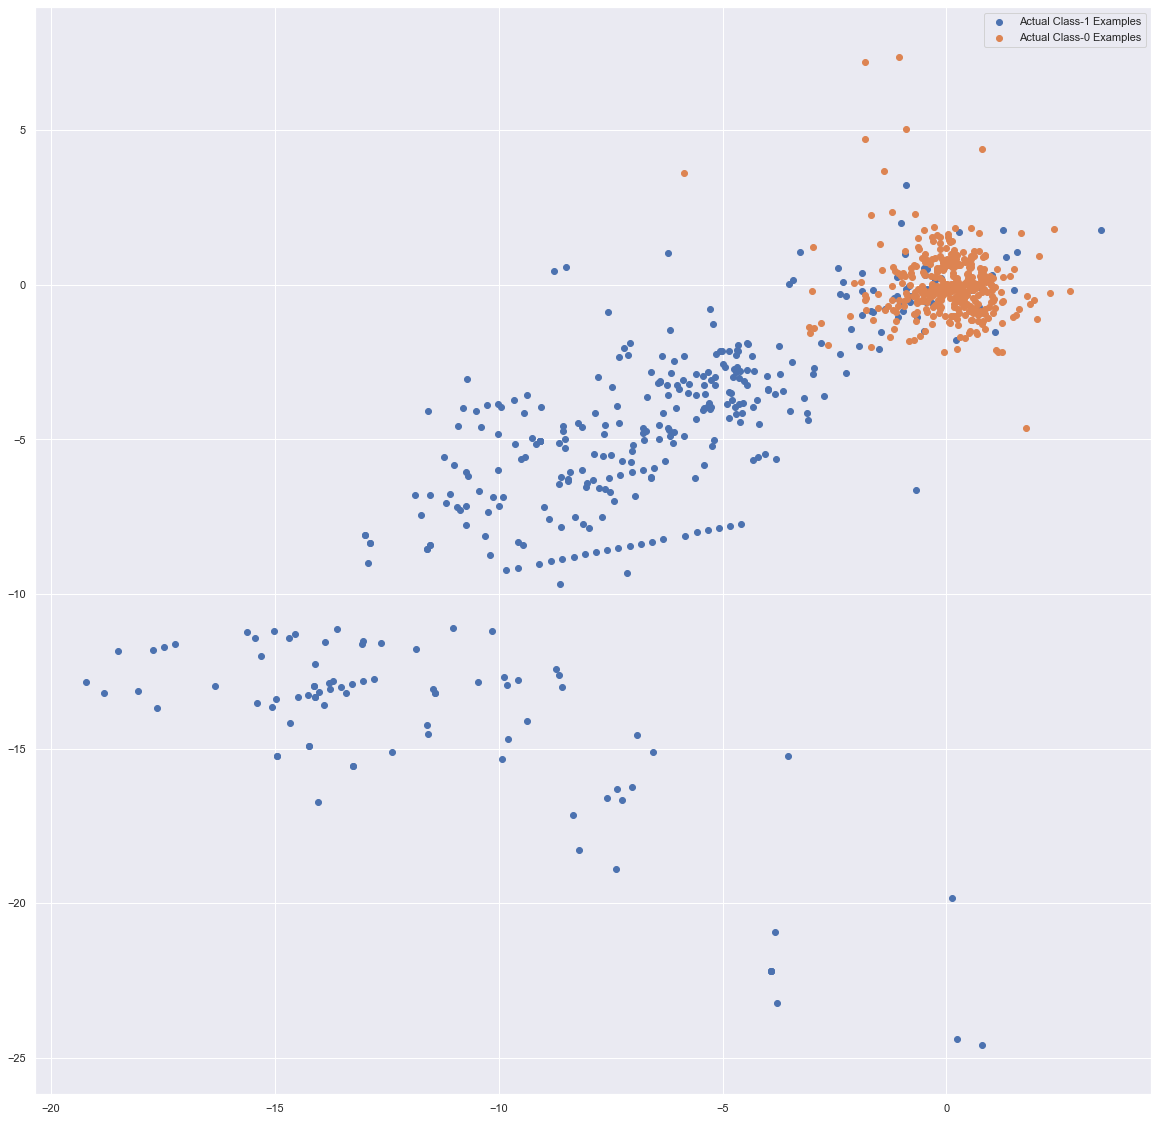

In [93]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [94]:
# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

XGboost roc_value: 0.9834685012706874
XGBoost threshold: 0.0020652785897254944


## Model Selection:

## Overall conclusion after running models on Oversampled data:

Looking at above results it seems XGBOOST model with Random Oversampling with StratifiedKFold CV has provided best results. So we can try to tune the hyperparameters of this model to get best results

We have selected XGBOOST model with Random Oversampling and StratifiedKFold CV

**Model Accuracy: 0.9993328768806727**

**XGboost roc_value: 0.9834685012706874**

**XGBoost threshold: 0.0020652785897254944**

### We also noticed by looking at the results Logistic Regression with L2 Regularisation with RepeatedKFold Cross Validation has been provided best results without any oversampling.